CONFIGURATION ET IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

**Dataset "Terrorism And Jihadism Speech Detection"**


lien: https://www.kaggle.com/datasets/haithemhermessi/terrorism-and-jihadist-speech-detection

Chargement dataset

In [2]:
def load_terrorism_dataset():
    """Charger et inspecter le dataset de détection de terrorisme"""
    
    print("=== DATASET 1: TERRORISM DETECTION ===")
    
    # Chargement des fichiers
    try:
        train_df = pd.read_csv('/kaggle/input/terrorism-and-jihadist-speech-detection/train.csv')
        test_df = pd.read_csv('/kaggle/input/terrorism-and-jihadist-speech-detection/test.csv')
        
        print(f"✅ Train dataset chargé: {train_df.shape}")
        print(f"✅ Test dataset chargé: {test_df.shape}")
        
        # Informations générales
        print("\n📋 INFORMATIONS TRAIN:")
        print(f"Colonnes: {list(train_df.columns)}")
        print(f"Types: \n{train_df.dtypes}")
        
        # Nettoyer les noms de colonnes
        train_df.columns = train_df.columns.str.strip().str.replace('"', '')
        test_df.columns = test_df.columns.str.strip().str.replace('"', '')
        
        print(f"\n📋 COLONNES APRÈS NETTOYAGE:")
        print(f"Train: {list(train_df.columns)}")
        print(f"Test: {list(test_df.columns)}")
        
        # Aperçu des données
        print("\n👀 APERÇU TRAIN (5 premières lignes):")
        print(train_df.head())
        
        print("\n👀 APERÇU TEST (5 premières lignes):")
        print(test_df.head())
        
        return train_df, test_df
        
    except Exception as e:
        print(f"❌ Erreur lors du chargement: {e}")
        return None, None

# Exécution
train_terrorism, test_terrorism = load_terrorism_dataset()

=== DATASET 1: TERRORISM DETECTION ===
✅ Train dataset chargé: (400, 3)
✅ Test dataset chargé: (100, 3)

📋 INFORMATIONS TRAIN:
Colonnes: ['id', ' "tweet"', 'class']
Types: 
id          object
 "tweet"    object
class        int64
dtype: object

📋 COLONNES APRÈS NETTOYAGE:
Train: ['id', 'tweet', 'class']
Test: ['id', 'tweet', 'class']

👀 APERÇU TRAIN (5 premières lignes):
                   id                                              tweet  \
0  746007323479576576  عاجل | مصادر عراقية: 20 قتيلا بينهم قائد للحشد...   
1  569488484957855745  RT @Iraq_now2: نحو٣٠٠عنصر من عصابات"حزب الله"ا...   
2  664157183135870976                     @DroopDelaCreme you knowwwwwww   
3  561386715349536768  @_AbDwd2 bro, I really wish twitter would dele...   
4  553368348361490432  When a coconut gets asked if he supports ISIS ...   

   class  
0      1  
1      1  
2      1  
3      1  
4      1  

👀 APERÇU TEST (5 premières lignes):
                   id                                             

EXPLORATION

In [3]:
def explore_terrorism_dataset(train_df, test_df):
    """Explorer en détail le dataset terrorism"""
    
    if train_df is None or test_df is None:
        print("❌ Datasets non disponibles")
        return
    
    print("=== EXPLORATION TERRORISM DATASET ===")
    
    # Valeurs manquantes
    print("\n🔍 VALEURS MANQUANTES:")
    print("Train:")
    print(train_df.isnull().sum())
    print("Test:")
    print(test_df.isnull().sum())
    
    # Identifier la colonne de texte
    text_col = None
    for col in train_df.columns:
        if 'tweet' in col.lower() or 'text' in col.lower():
            text_col = col
            break
    
    if text_col is None:
        # Prendre la colonne qui n'est pas 'id' ou 'class'
        for col in train_df.columns:
            if col not in ['id', 'class']:
                text_col = col
                break
    
    print(f"\n📝 COLONNE DE TEXTE IDENTIFIÉE: '{text_col}'")
    
    # Distribution des labels
    label_col = 'class' if 'class' in train_df.columns else 'label'
    
    if label_col in train_df.columns:
        print(f"\n📊 DISTRIBUTION DES LABELS (colonne: {label_col}):")
        label_counts = train_df[label_col].value_counts()
        print(label_counts)
        print(f"\nPourcentages:")
        percentages = train_df[label_col].value_counts(normalize=True) * 100
        for label, pct in percentages.items():
            print(f"{label}: {pct:.1f}%")
    
    # Statistiques textuelles
    if text_col:
        print(f"\n📝 STATISTIQUES TEXTUELLES (colonne: {text_col}):")
        train_df['text_length'] = train_df[text_col].astype(str).str.len()
        train_df['word_count'] = train_df[text_col].astype(str).str.split().str.len()
        
        print(f"Longueur moyenne: {train_df['text_length'].mean():.1f} caractères")
        print(f"Nombre de mots moyen: {train_df['word_count'].mean():.1f} mots")
        print(f"Longueur min/max: {train_df['text_length'].min()} / {train_df['text_length'].max()}")
        print(f"Mots min/max: {train_df['word_count'].min()} / {train_df['word_count'].max()}")
        
        # Échantillons de texte par classe
        print("\n📄 ÉCHANTILLONS DE TEXTE PAR CLASSE:")
        if label_col in train_df.columns:
            for label in train_df[label_col].unique():
                print(f"\n--- CLASSE: {label} ---")
                sample_texts = train_df[train_df[label_col] == label][text_col].head(2)
                for i, text in enumerate(sample_texts):
                    text_sample = str(text)[:150] + "..." if len(str(text)) > 150 else str(text)
                    print(f"Exemple {i+1}: {text_sample}")
                print("-" * 60)

# Exécution
if 'train_terrorism' in globals():
    explore_terrorism_dataset(train_terrorism, test_terrorism)

=== EXPLORATION TERRORISM DATASET ===

🔍 VALEURS MANQUANTES:
Train:
id       0
tweet    0
class    0
dtype: int64
Test:
id       0
tweet    0
class    0
dtype: int64

📝 COLONNE DE TEXTE IDENTIFIÉE: 'tweet'

📊 DISTRIBUTION DES LABELS (colonne: class):
class
1    200
0    200
Name: count, dtype: int64

Pourcentages:
1: 50.0%
0: 50.0%

📝 STATISTIQUES TEXTUELLES (colonne: tweet):
Longueur moyenne: 105.3 caractères
Nombre de mots moyen: 15.0 mots
Longueur min/max: 13 / 161
Mots min/max: 1 / 29

📄 ÉCHANTILLONS DE TEXTE PAR CLASSE:

--- CLASSE: 1 ---
Exemple 1: عاجل | مصادر عراقية: 20 قتيلا بينهم قائد للحشد العشائري في هجوم لتنظيم الدولة بالأنبار
Exemple 2: RT @Iraq_now2: نحو٣٠٠عنصر من عصابات"حزب الله"اللبناني يتواجدون في #العراق لدعم العصابات الشيعية.
https://t.co/m6olU9lswP http://t.co/eqXa7UQzV1
------------------------------------------------------------

--- CLASSE: 0 ---
Exemple 1: The regime air force strikes west of Rif Dimashq and the Eastern Ghouta, while 10 fighters killed i... htt

Visualisation

🎨 VISUALISATIONS DATASET TERRORISM - PARTIE 1:


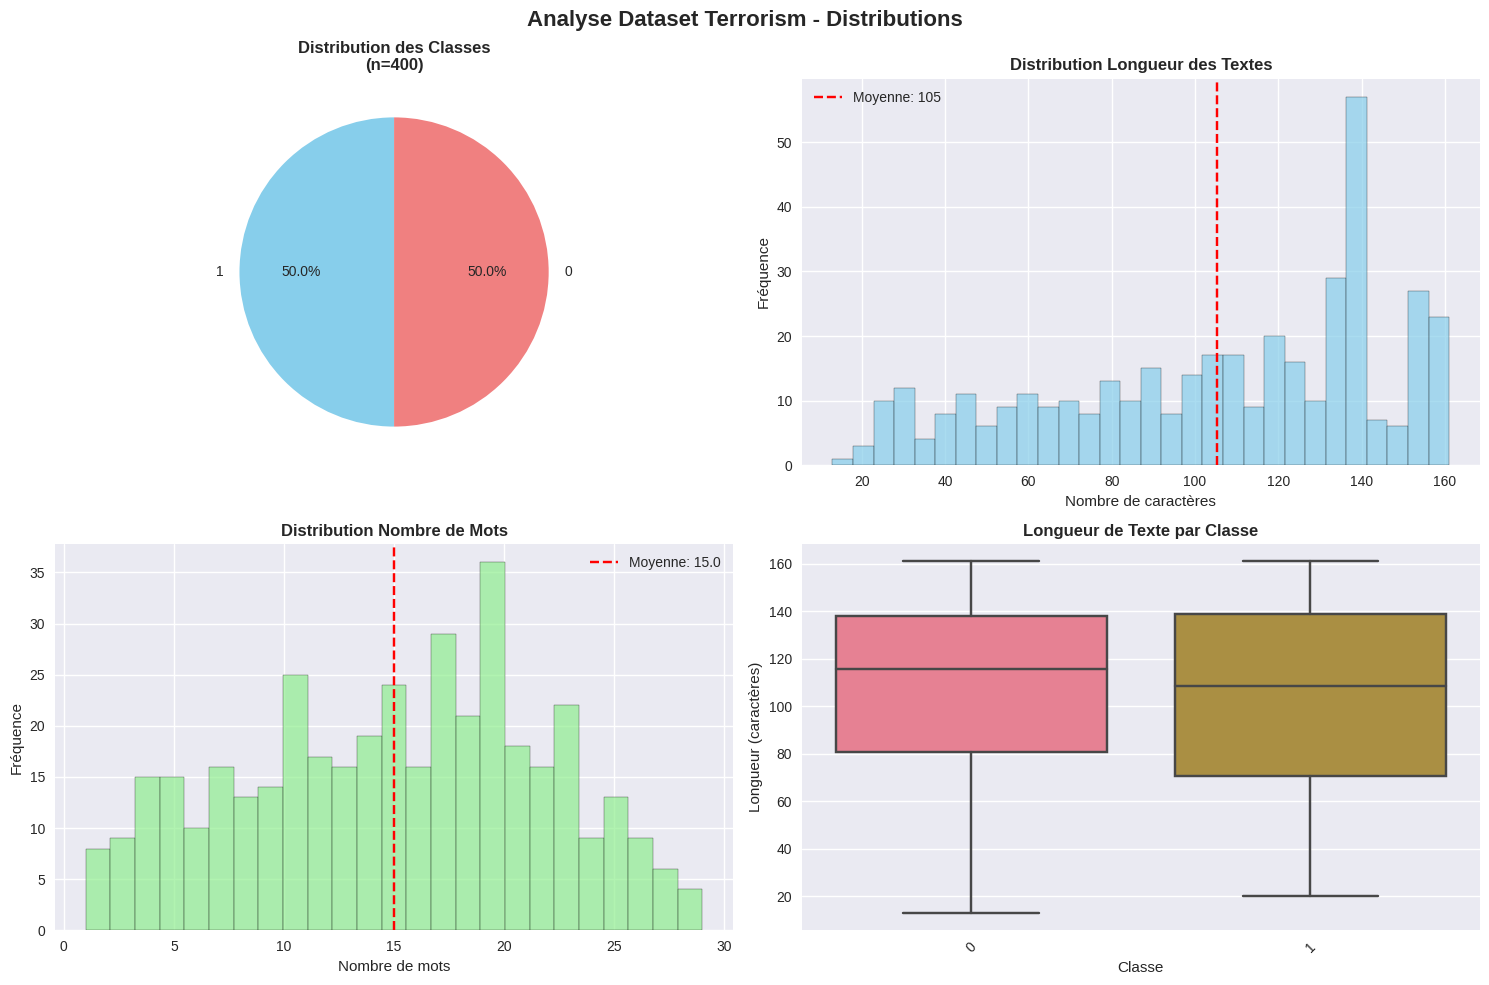


📈 RÉSUMÉ STATISTIQUES:
Nombre total de textes: 400
Longueur moyenne: 105.3 caractères
Nombre de mots moyen: 15.0
Nombre de classes: 2
Distribution par classe:
  1: 200 (50.0%)
  0: 200 (50.0%)


In [4]:
def visualize_terrorism_basic(train_df):
    """Visualisations de base pour le dataset terrorism"""
    
    if train_df is None:
        return
    
    # Identifier les colonnes
    text_col = None
    for col in train_df.columns:
        if 'tweet' in col.lower() or 'text' in col.lower():
            text_col = col
            break
    
    if text_col is None:
        for col in train_df.columns:
            if col not in ['id', 'class']:
                text_col = col
                break
    
    label_col = 'class' if 'class' in train_df.columns else 'label'
    
    # Calculer statistiques
    if 'text_length' not in train_df.columns:
        train_df['text_length'] = train_df[text_col].astype(str).str.len()
        train_df['word_count'] = train_df[text_col].astype(str).str.split().str.len()
    
    # Créer visualisations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Analyse Dataset Terrorism - Distributions', fontsize=16, fontweight='bold')
    
    # 1. Distribution des labels
    if label_col in train_df.columns:
        label_counts = train_df[label_col].value_counts()
        colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink']
        
        axes[0,0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', 
                      colors=colors[:len(label_counts)], startangle=90)
        axes[0,0].set_title(f'Distribution des Classes\n(n={len(train_df):,})', fontweight='bold')
    
    # 2. Distribution longueur des textes
    axes[0,1].hist(train_df['text_length'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0,1].set_title('Distribution Longueur des Textes', fontweight='bold')
    axes[0,1].set_xlabel('Nombre de caractères')
    axes[0,1].set_ylabel('Fréquence')
    axes[0,1].axvline(train_df['text_length'].mean(), color='red', linestyle='--', 
                      label=f'Moyenne: {train_df["text_length"].mean():.0f}')
    axes[0,1].legend()
    
    # 3. Distribution nombre de mots
    axes[1,0].hist(train_df['word_count'], bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
    axes[1,0].set_title('Distribution Nombre de Mots', fontweight='bold')
    axes[1,0].set_xlabel('Nombre de mots')
    axes[1,0].set_ylabel('Fréquence')
    axes[1,0].axvline(train_df['word_count'].mean(), color='red', linestyle='--',
                      label=f'Moyenne: {train_df["word_count"].mean():.1f}')
    axes[1,0].legend()
    
    # 4. Boxplot longueur par classe
    if label_col in train_df.columns:
        sns.boxplot(data=train_df, x=label_col, y='text_length', ax=axes[1,1])
        axes[1,1].set_title('Longueur de Texte par Classe', fontweight='bold')
        axes[1,1].tick_params(axis='x', rotation=45)
        axes[1,1].set_xlabel('Classe')
        axes[1,1].set_ylabel('Longueur (caractères)')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques résumé
    print("\n📈 RÉSUMÉ STATISTIQUES:")
    print(f"Nombre total de textes: {len(train_df):,}")
    print(f"Longueur moyenne: {train_df['text_length'].mean():.1f} caractères")
    print(f"Nombre de mots moyen: {train_df['word_count'].mean():.1f}")
    
    if label_col in train_df.columns:
        print(f"Nombre de classes: {train_df[label_col].nunique()}")
        print("Distribution par classe:")
        for label, count in train_df[label_col].value_counts().items():
            pct = count / len(train_df) * 100
            print(f"  {label}: {count:,} ({pct:.1f}%)")

# Exécution
if 'train_terrorism' in globals():
    print("🎨 VISUALISATIONS DATASET TERRORISM - PARTIE 1:")
    visualize_terrorism_basic(train_terrorism)

🎨 VISUALISATIONS DATASET TERRORISM - PARTIE 2:


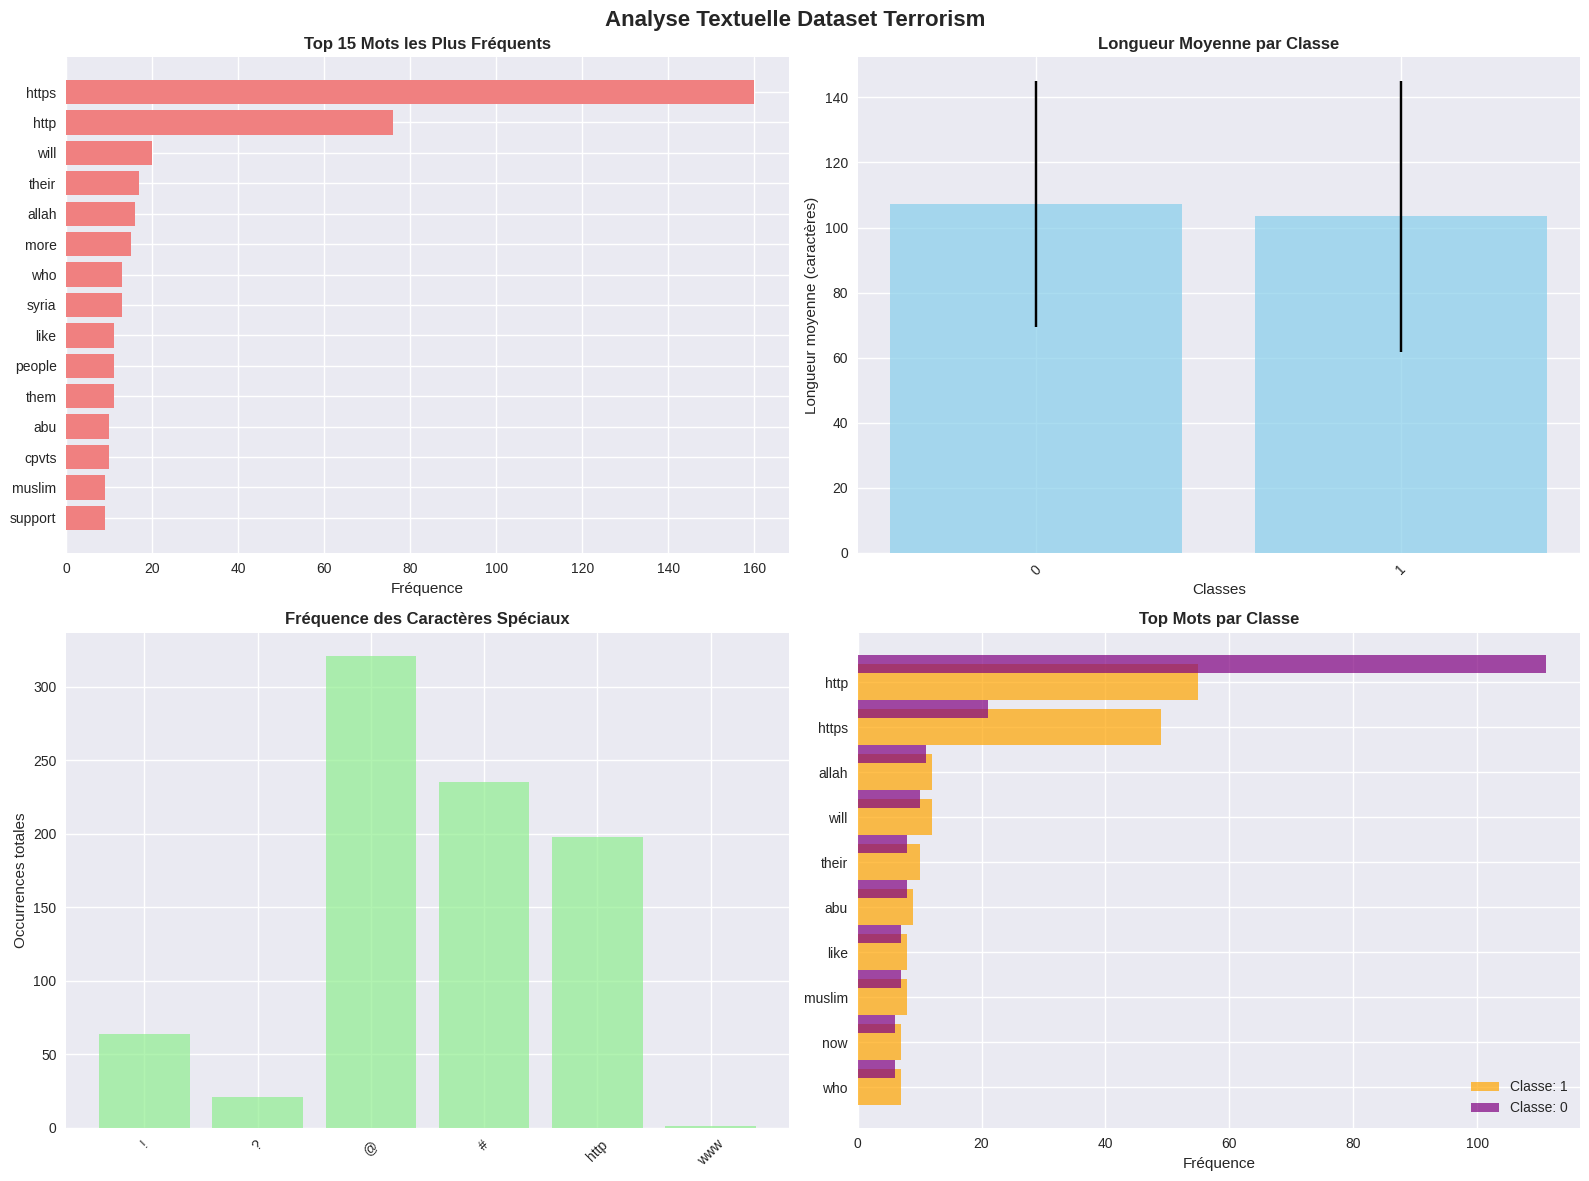


📊 STATISTIQUES TEXTUELLES AVANCÉES:
Nombre total de mots uniques: 2,362
Mots les plus fréquents: {'https': 160, 'http': 76, 'will': 20, 'their': 17, 'allah': 16}

🔍 CARACTÈRES SPÉCIAUX:
  !: 64 occurrences (16.0% des textes)
  ?: 21 occurrences (5.2% des textes)
  @: 321 occurrences (80.2% des textes)
  #: 235 occurrences (58.8% des textes)
  http: 198 occurrences (49.5% des textes)
  www: 1 occurrences (0.2% des textes)


In [5]:
def visualize_terrorism_words(train_df):
    """Analyse des mots et patterns textuels"""
    
    if train_df is None:
        return
    
    # Identifier colonne de texte
    text_col = None
    for col in train_df.columns:
        if 'tweet' in col.lower() or 'text' in col.lower():
            text_col = col
            break
    
    if text_col is None:
        for col in train_df.columns:
            if col not in ['id', 'class']:
                text_col = col
                break
    
    label_col = 'class' if 'class' in train_df.columns else 'label'
    
    # Créer visualisations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Analyse Textuelle Dataset Terrorism', fontsize=16, fontweight='bold')
    
    # 1. Top 15 mots les plus fréquents (global)
    all_text = ' '.join(train_df[text_col].astype(str).str.lower())
    # Nettoyage basique
    all_text = re.sub(r'[^a-zA-Z\s]', ' ', all_text)
    
    # Mots à exclure (stop words basiques)
    stop_words = {'the', 'and', 'to', 'of', 'a', 'in', 'is', 'it', 'you', 'that', 
                  'he', 'was', 'for', 'on', 'are', 'as', 'with', 'his', 'they', 
                  'i', 'at', 'be', 'this', 'have', 'from', 'or', 'one', 'had', 
                  'by', 'but', 'not', 'what', 'all', 'were', 'we', 'when', 'your'}
    
    words = [word for word in all_text.split() if len(word) > 2 and word not in stop_words]
    word_freq = Counter(words).most_common(15)
    
    if word_freq:
        words_list, freq_list = zip(*word_freq)
        axes[0,0].barh(range(len(words_list)), freq_list, color='lightcoral')
        axes[0,0].set_yticks(range(len(words_list)))
        axes[0,0].set_yticklabels(words_list)
        axes[0,0].set_title('Top 15 Mots les Plus Fréquents', fontweight='bold')
        axes[0,0].set_xlabel('Fréquence')
        axes[0,0].invert_yaxis()
    
    # 2. Longueur moyenne par classe
    if label_col in train_df.columns:
        stats_by_class = train_df.groupby(label_col).agg({
            'text_length': ['mean', 'std'],
            'word_count': 'mean'
        }).round(1)
        
        # Aplatir les colonnes multi-niveaux
        stats_by_class.columns = ['_'.join(col).strip() for col in stats_by_class.columns]
        
        x_pos = np.arange(len(stats_by_class))
        axes[0,1].bar(x_pos, stats_by_class['text_length_mean'], 
                      yerr=stats_by_class['text_length_std'], 
                      alpha=0.7, color='skyblue', capsize=5)
        axes[0,1].set_xlabel('Classes')
        axes[0,1].set_ylabel('Longueur moyenne (caractères)')
        axes[0,1].set_title('Longueur Moyenne par Classe', fontweight='bold')
        axes[0,1].set_xticks(x_pos)
        axes[0,1].set_xticklabels(stats_by_class.index, rotation=45)
    
    # 3. Distribution des caractères spéciaux
    special_chars = ['!', '?', '@', '#', 'http', 'www']
    char_counts = {}
    
    for char in special_chars:
        if char in ['http', 'www']:
            char_counts[char] = train_df[text_col].astype(str).str.contains(char).sum()
        else:
            char_counts[char] = train_df[text_col].astype(str).str.count(re.escape(char)).sum()
    
    chars, counts = zip(*char_counts.items()) if char_counts else ([], [])
    axes[1,0].bar(chars, counts, alpha=0.7, color='lightgreen')
    axes[1,0].set_title('Fréquence des Caractères Spéciaux', fontweight='bold')
    axes[1,0].set_ylabel('Occurrences totales')
    axes[1,0].tick_params(axis='x', rotation=45)
    
    # 4. Analyse par classe (si disponible)
    if label_col in train_df.columns and len(train_df[label_col].unique()) > 1:
        # Prendre les deux classes les plus fréquentes
        top_classes = train_df[label_col].value_counts().head(2).index
        
        for i, class_name in enumerate(top_classes):
            class_text = ' '.join(train_df[train_df[label_col] == class_name][text_col].astype(str).str.lower())
            class_text = re.sub(r'[^a-zA-Z\s]', ' ', class_text)
            class_words = [word for word in class_text.split() 
                          if len(word) > 2 and word not in stop_words]
            class_freq = Counter(class_words).most_common(10)
            
            if class_freq:
                words_class, freq_class = zip(*class_freq)
                y_pos = np.arange(len(words_class))
                
                if i == 0:
                    axes[1,1].barh(y_pos, freq_class, alpha=0.7, 
                                   label=f'Classe: {class_name}', color='orange')
                else:
                    # Afficher à côté
                    axes[1,1].barh(y_pos - 0.4, freq_class, alpha=0.7, 
                                   label=f'Classe: {class_name}', color='purple', height=0.4)
        
        axes[1,1].set_title('Top Mots par Classe', fontweight='bold')
        axes[1,1].set_xlabel('Fréquence')
        axes[1,1].legend()
        
        if len(top_classes) > 0:
            # Utiliser les mots de la première classe pour les labels
            first_class_text = ' '.join(train_df[train_df[label_col] == top_classes[0]][text_col].astype(str).str.lower())
            first_class_text = re.sub(r'[^a-zA-Z\s]', ' ', first_class_text)
            first_words = [word for word in first_class_text.split() 
                          if len(word) > 2 and word not in stop_words]
            first_freq = Counter(first_words).most_common(10)
            
            if first_freq:
                words_first, _ = zip(*first_freq)
                axes[1,1].set_yticks(range(len(words_first)))
                axes[1,1].set_yticklabels(words_first)
                axes[1,1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques textuelles avancées
    print("\n📊 STATISTIQUES TEXTUELLES AVANCÉES:")
    print(f"Nombre total de mots uniques: {len(set(words)):,}")
    print(f"Mots les plus fréquents: {dict(word_freq[:5])}")
    
    # Statistiques par caractères spéciaux
    print("\n🔍 CARACTÈRES SPÉCIAUX:")
    for char, count in char_counts.items():
        pct = (count / len(train_df)) * 100
        print(f"  {char}: {count:,} occurrences ({pct:.1f}% des textes)")

# Exécution
if 'train_terrorism' in globals():
    print("🎨 VISUALISATIONS DATASET TERRORISM - PARTIE 2:")
    visualize_terrorism_words(train_terrorism)

PRÉTRAITEMENT

In [6]:
def preprocess_terrorism_dataset(train_df, test_df):
    """Prétraiter le dataset terrorism"""
    
    if train_df is None:
        return None, None
    
    print("=== PRÉTRAITEMENT DATASET TERRORISM ===")
    
    # Identifier colonnes
    text_col = None
    for col in train_df.columns:
        if 'tweet' in col.lower() or 'text' in col.lower():
            text_col = col
            break
    
    if text_col is None:
        for col in train_df.columns:
            if col not in ['id', 'class']:
                text_col = col
                break
    
    label_col = 'class' if 'class' in train_df.columns else 'label'
    
    def clean_text_english(text):
        """Nettoyer le texte anglais"""
        if pd.isna(text):
            return ""
        
        text = str(text)
        # Supprimer URLs
        text = re.sub(r'http\S+|www\S+|https\S+', ' [URL] ', text)
        # Supprimer mentions (remplacer par token)
        text = re.sub(r'@\w+', ' [USER] ', text)
        # Nettoyer hashtags (garder le texte)
        text = re.sub(r'#(\w+)', r'\1', text)
        # Supprimer RT (retweet)
        text = re.sub(r'\bRT\b', '', text)
        # Normaliser caractères répétés
        text = re.sub(r'(.)\1{3,}', r'\1\1', text)  # max 2 répétitions
        # Supprimer caractères non-ASCII
        text = re.sub(r'[^\x00-\x7F]+', ' ', text)
        # Normaliser espaces
        text = ' '.join(text.split())
        
        return text.strip()
    
    # Traitement train
    print(f"\n🔧 TRAITEMENT DATASET TRAIN:")
    train_clean = train_df.copy()
    
    print(f"Dataset original: {len(train_clean)} textes")
    
    # Nettoyage texte
    original_texts = train_clean[text_col].copy()
    train_clean[text_col] = train_clean[text_col].apply(clean_text_english)
    
    # Supprimer textes vides ou trop courts
    initial_len = len(train_clean)
    train_clean = train_clean[train_clean[text_col].str.len() > 10]
    removed_short = initial_len - len(train_clean)
    print(f"Textes supprimés (trop courts): {removed_short}")
    
    # Supprimer doublons
    initial_len = len(train_clean)
    train_clean = train_clean.drop_duplicates(subset=[text_col])
    removed_duplicates = initial_len - len(train_clean)
    print(f"Doublons supprimés: {removed_duplicates}")
    
    # Ajouter métadonnées
    train_clean['text_length_clean'] = train_clean[text_col].str.len()
    train_clean['word_count_clean'] = train_clean[text_col].str.split().str.len()
    train_clean['has_url'] = original_texts.str.contains(r'http|www', case=False, na=False)
    train_clean['has_mention'] = original_texts.str.contains(r'@\w+', na=False)
    train_clean['has_hashtag'] = original_texts.str.contains(r'#\w+', na=False)
    train_clean['language'] = 'english'
    train_clean['dataset_source'] = 'kaggle_terrorism'
    
    # Renommer colonnes pour standardisation
    train_clean = train_clean.rename(columns={
        text_col: 'text',
        label_col: 'label'
    })
    
    print(f"Dataset train final: {len(train_clean)} textes")
    
    # Traitement test (si disponible)
    test_clean = None
    if test_df is not None:
        print(f"\n🔧 TRAITEMENT DATASET TEST:")
        test_clean = test_df.copy()
        print(f"Dataset test original: {len(test_clean)} textes")
        
        # Même nettoyage
        test_text_col = text_col if text_col in test_df.columns else test_df.columns[0]
        original_test_texts = test_clean[test_text_col].copy()
        test_clean[test_text_col] = test_clean[test_text_col].apply(clean_text_english)
        test_clean = test_clean[test_clean[test_text_col].str.len() > 10]
        
        # Métadonnées
        test_clean['text_length_clean'] = test_clean[test_text_col].str.len()
        test_clean['word_count_clean'] = test_clean[test_text_col].str.split().str.len()
        test_clean['has_url'] = original_test_texts.str.contains(r'http|www', case=False, na=False)
        test_clean['has_mention'] = original_test_texts.str.contains(r'@\w+', na=False)
        test_clean['has_hashtag'] = original_test_texts.str.contains(r'#\w+', na=False)
        test_clean['language'] = 'english'
        test_clean['dataset_source'] = 'kaggle_terrorism'
        
        # Renommer colonnes
        test_clean = test_clean.rename(columns={test_text_col: 'text'})
        if 'class' in test_clean.columns:
            test_clean = test_clean.rename(columns={'class': 'label'})
        
        print(f"Dataset test final: {len(test_clean)} textes")
    
    # Afficher exemples de nettoyage
    print("\n📄 EXEMPLES DE NETTOYAGE:")
    for i in range(min(3, len(train_clean))):
        if i < len(original_texts):
            original = str(original_texts.iloc[i])[:100] + "..." if len(str(original_texts.iloc[i])) > 100 else str(original_texts.iloc[i])
            cleaned = str(train_clean['text'].iloc[i])[:100] + "..." if len(str(train_clean['text'].iloc[i])) > 100 else str(train_clean['text'].iloc[i])
            label = train_clean['label'].iloc[i] if 'label' in train_clean.columns else 'N/A'
            
            print(f"\nExemple {i+1} [Label: {label}]:")
            print(f"Original: {original}")
            print(f"Nettoyé:  {cleaned}")
            print("-" * 60)
    
    # Statistiques finales
    print(f"\n📈 STATISTIQUES FINALES:")
    print(f"Train - Longueur moyenne: {train_clean['text_length_clean'].mean():.1f} caractères")
    print(f"Train - Nombre de mots moyen: {train_clean['word_count_clean'].mean():.1f}")
    
    if 'label' in train_clean.columns:
        print(f"\nDistribution des labels (train):")
        for label, count in train_clean['label'].value_counts().items():
            pct = count / len(train_clean) * 100
            print(f"  {label}: {count:,} ({pct:.1f}%)")
    
    # Statistiques métadonnées
    print(f"\n🔍 MÉTADONNÉES:")
    print(f"Textes avec URLs: {train_clean['has_url'].sum()} ({train_clean['has_url'].mean()*100:.1f}%)")
    print(f"Textes avec mentions: {train_clean['has_mention'].sum()} ({train_clean['has_mention'].mean()*100:.1f}%)")
    print(f"Textes avec hashtags: {train_clean['has_hashtag'].sum()} ({train_clean['has_hashtag'].mean()*100:.1f}%)")
    
    return train_clean, test_clean

# Exécution
if 'train_terrorism' in globals():
    train_terrorism_clean, test_terrorism_clean = preprocess_terrorism_dataset(
        train_terrorism, test_terrorism)
    print("\n✅ PRÉTRAITEMENT TERMINÉ")

=== PRÉTRAITEMENT DATASET TERRORISM ===

🔧 TRAITEMENT DATASET TRAIN:
Dataset original: 400 textes
Textes supprimés (trop courts): 52
Doublons supprimés: 13
Dataset train final: 335 textes

🔧 TRAITEMENT DATASET TEST:
Dataset test original: 100 textes
Dataset test final: 93 textes

📄 EXEMPLES DE NETTOYAGE:

Exemple 1 [Label: 1]:
Original: عاجل | مصادر عراقية: 20 قتيلا بينهم قائد للحشد العشائري في هجوم لتنظيم الدولة بالأنبار
Nettoyé:  [USER] : " " . [URL] [URL]
------------------------------------------------------------

Exemple 2 [Label: 1]:
Original: RT @Iraq_now2: نحو٣٠٠عنصر من عصابات"حزب الله"اللبناني يتواجدون في #العراق لدعم العصابات الشيعية.
htt...
Nettoyé:  [USER] you kno [URL]
------------------------------------------------------------

Exemple 3 [Label: 1]:
Original: @DroopDelaCreme you knowwwwwww
Nettoyé:  [USER] bro, I really wish twitter would delete retards like this rather than Dawlah supporters...Guy...
------------------------------------------------------------

📈 STATI

**Dataset ARABIC "OSACT"**


lien : https://huggingface.co/datasets/manueltonneau/arabic-hate-speech-superset

Chargement

In [7]:
def load_osact_dataset():
    """Charger et inspecter le dataset OSACT Arabic"""
    
    print("=== DATASET 2: OSACT ARABIC OFFENSIVE LANGUAGE ===")
    
    try:
        # Charger avec différents encodages possibles
        encodings = ['utf-8', 'cp1256', 'utf-8-sig', 'latin-1']
        df_osact = None
        
        for encoding in encodings:
            try:
                # CORRECTION: Utiliser la variable encoding au lieu de 'utf-8' fixe
                df_osact = pd.read_csv('/kaggle/input/osact2022-sharedtask-train/OSACT2022-sharedTask-train.txt',
                                     sep='\t',
                                     encoding=encoding,  # Utiliser la variable !
                                     header=None,
                                     names=['id', 'text', 'OFF', 'HS', 'VLG', 'VIO'])
                
                # Test immédiat : vérifier si le texte contient de l'arabe
                sample_text = str(df_osact['text'].iloc[0])
                has_arabic = any('\u0600' <= char <= '\u06FF' for char in sample_text)
                
                print(f"✅ Dataset OSACT chargé avec encodage: {encoding}")
                print(f"Forme du dataset: {df_osact.shape}")
                print(f"Test arabe: {'OUI' if has_arabic else 'NON'}")
                print(f"Exemple de texte: {sample_text[:50]}...")
                
                if has_arabic:
                    print("🎉 TEXTE ARABE DÉTECTÉ - Encodage correct!")
                    break
                else:
                    print("⚠️ Pas de caractères arabes - Test encodage suivant...")
                    
            except UnicodeDecodeError as e:
                print(f"❌ UnicodeDecodeError avec {encoding}: {e}")
                continue
            except Exception as e:
                print(f"❌ Erreur avec encodage {encoding}: {e}")
                continue
        
        if df_osact is None:
            print("❌ Impossible de charger le dataset avec tous les encodages testés")
            return None
        
        # Informations générales
        print(f"\n📋 INFORMATIONS DATASET OSACT:")
        print(f"Colonnes: {list(df_osact.columns)}")
        print(f"Types: \n{df_osact.dtypes}")
        print(f"Nombre de lignes: {len(df_osact):,}")
        
        # Vérifier les valeurs manquantes
        print(f"\n🔍 VALEURS MANQUANTES:")
        print(df_osact.isnull().sum())
        
        # Aperçu des premières lignes AVEC TENTATIVE DE CORRECTION
        print(f"\n👀 APERÇU DES DONNÉES (5 premières lignes):")
        for i in range(min(5, len(df_osact))):
            row = df_osact.iloc[i]
            
            # Texte original
            original_text = str(row['text'])
            
            # Tentative de correction si nécessaire
            try:
                # Si le texte ne contient pas d'arabe, essayer de le corriger
                if not any('\u0600' <= char <= '\u06FF' for char in original_text):
                    corrected_text = original_text.encode('latin1').decode('utf-8')
                else:
                    corrected_text = original_text
            except:
                corrected_text = original_text
            
            # Limiter la longueur pour l'affichage
            text_preview = corrected_text[:100] + "..." if len(corrected_text) > 100 else corrected_text
            
            print(f"ID: {row['id']}")
            print(f"Texte: {text_preview}")
            print(f"Labels: OFF={row['OFF']}, HS={row['HS']}, VLG={row['VLG']}, VIO={row['VIO']}")
            print("-" * 80)
        
        return df_osact
        
    except Exception as e:
        print(f"❌ Erreur générale lors du chargement: {e}")
        return None
def test_current_arabic(osact_data):
    """Tester les corrections sur les données actuelles"""
    if osact_data is None:
        print("Pas de données à tester")
        return
    
    print("=== TEST DE CORRECTION SUR DONNÉES ACTUELLES ===")
    
    for i in range(3):
        original = str(osact_data['text'].iloc[i])
        print(f"\n--- EXEMPLE {i+1} ---")
        print(f"Original: {original[:50]}...")
        
        # Tentatives de correction
        corrections = []
        
        # Méthode 1: latin1 -> utf8
        try:
            corr1 = original.encode('latin1').decode('utf-8')
            corrections.append(("latin1->utf8", corr1))
        except:
            corrections.append(("latin1->utf8", "ECHEC"))
        
        # Méthode 2: cp1256
        try:
            corr2 = original.encode('latin1').decode('cp1256')
            corrections.append(("latin1->cp1256", corr2))
        except:
            corrections.append(("latin1->cp1256", "ECHEC"))
        
        # Afficher les résultats
        for method, result in corrections:
            if result != "ECHEC":
                preview = result[:50] + "..." if len(result) > 50 else result
                has_arabic = any('\u0600' <= char <= '\u06FF' for char in result)
                print(f"{method}: {preview} {'✅' if has_arabic else '❌'}")
            else:
                print(f"{method}: ECHEC")

# Exécution
print("🔄 RECHARGEMENT DU DATASET OSACT...")
osact_data = load_osact_dataset()

# Test sur les données actuelles si le rechargement échoue
if osact_data is not None:
    print("\n✅ Dataset rechargé avec succès!")
else:
    print("\n⚠️ Rechargement échoué, test sur données actuelles...")
    if 'osact_data' in globals():
        test_current_arabic(osact_data)

🔄 RECHARGEMENT DU DATASET OSACT...
=== DATASET 2: OSACT ARABIC OFFENSIVE LANGUAGE ===
✅ Dataset OSACT chargé avec encodage: utf-8
Forme du dataset: (8557, 6)
Test arabe: NON
Exemple de texte: @USER Ø±Ø¯ÙŠÙ†Ø§ Ø¹ Ø§Ù„ØªØ·Ù†Ø² ðŸ˜ðŸ‘ŠðŸ»...
⚠️ Pas de caractères arabes - Test encodage suivant...
✅ Dataset OSACT chargé avec encodage: cp1256
Forme du dataset: (8557, 6)
Test arabe: OUI
Exemple de texte: @USER أکآ±أکآ¯أ™إ أ™â€ أکآ§ أکآ¹ أکآ§أ™â€‍أکآھأکآ·...
🎉 TEXTE ARABE DÉTECTÉ - Encodage correct!

📋 INFORMATIONS DATASET OSACT:
Colonnes: ['id', 'text', 'OFF', 'HS', 'VLG', 'VIO']
Types: 
id       int64
text    object
OFF     object
HS      object
VLG     object
VIO     object
dtype: object
Nombre de lignes: 8,557

🔍 VALEURS MANQUANTES:
id      0
text    0
OFF     0
HS      0
VLG     0
VIO     0
dtype: int64

👀 APERÇU DES DONNÉES (5 premières lignes):
ID: 1
Texte: @USER أکآ±أکآ¯أ™إ أ™â€ أکآ§ أکآ¹ أکآ§أ™â€‍أکآھأکآ·أ™â€ أکآ² أ°إ¸ثœآڈأ°إ¸â€کإ أ°إ¸آڈآ»
Labels: OFF=OFF, HS=NOT_HS, VLG=NOT_VLG, VI

Exploration

In [8]:
def explore_osact_dataset(df_osact):
    """Explorer en détail le dataset OSACT"""
    
    if df_osact is None:
        print("❌ Dataset OSACT non disponible")
        return
    
    print("=== EXPLORATION DATASET OSACT ===")
    
    # Distribution des labels pour chaque catégorie
    label_columns = ['OFF', 'HS', 'VLG', 'VIO']
    
    print("\n📊 DISTRIBUTION DES LABELS:")
    for col in label_columns:
        print(f"\n{col} (Offensive/Hate Speech/Vulgar/Violence):")
        counts = df_osact[col].value_counts()
        print(counts)
        
        # Pourcentages
        percentages = df_osact[col].value_counts(normalize=True) * 100
        for label, pct in percentages.items():
            print(f"  {label}: {pct:.1f}%")
    
    # Combinaisons de labels intéressantes
    print(f"\n🔍 COMBINAISONS DE LABELS IMPORTANTES:")
    
    # Contenus violents
    violent_content = df_osact[df_osact['VIO'] == 'VIO']
    print(f"Contenus violents (VIO): {len(violent_content):,} ({len(violent_content)/len(df_osact)*100:.1f}%)")
    
    # Hate speech
    hate_speech = df_osact[df_osact['HS'] == 'HS']
    print(f"Hate Speech (HS): {len(hate_speech):,} ({len(hate_speech)/len(df_osact)*100:.1f}%)")
    
    # Contenus extrémistes (VIO + HS)
    extremist_content = df_osact[
        (df_osact['VIO'] == 'VIO') | (df_osact['HS'] == 'HS')
    ]
    print(f"Contenus extrémistes (VIO ou HS): {len(extremist_content):,} ({len(extremist_content)/len(df_osact)*100:.1f}%)")
    
    # Contenus normaux (tout NOT_)
    normal_content = df_osact[
        (df_osact['OFF'] == 'NOT_OFF') & 
        (df_osact['HS'] == 'NOT_HS') & 
        (df_osact['VLG'] == 'NOT_VLG') & 
        (df_osact['VIO'] == 'NOT_VIO')
    ]
    print(f"Contenus normaux (tous NOT_): {len(normal_content):,} ({len(normal_content)/len(df_osact)*100:.1f}%)")
    
    # Statistiques textuelles
    print(f"\n📝 STATISTIQUES TEXTUELLES:")
    df_osact['text_length'] = df_osact['text'].astype(str).str.len()
    df_osact['word_count'] = df_osact['text'].astype(str).str.split().str.len()
    
    print(f"Longueur moyenne: {df_osact['text_length'].mean():.1f} caractères")
    print(f"Nombre de mots moyen: {df_osact['word_count'].mean():.1f} mots")
    print(f"Longueur min/max: {df_osact['text_length'].min()} / {df_osact['text_length'].max()}")
    
    # Échantillons par catégorie
    print(f"\n📄 ÉCHANTILLONS DE TEXTE PAR CATÉGORIE:")
    
    categories = [
        ('VIOLENT', df_osact[df_osact['VIO'] == 'VIO']),
        ('HATE_SPEECH', df_osact[df_osact['HS'] == 'HS']),
        ('NORMAL', normal_content.head(20))  # Limiter les normaux pour l'exemple
    ]
    
    for cat_name, cat_df in categories:
        if len(cat_df) > 0:
            print(f"\n--- CATÉGORIE: {cat_name} ({len(cat_df)} textes) ---")
            sample_texts = cat_df['text'].head(2)
            for i, text in enumerate(sample_texts):
                # Nettoyer l'affichage du texte arabe
                text_clean = str(text).replace('<LF>', ' [LINE_BREAK] ')
                text_preview = text_clean[:200] + "..." if len(text_clean) > 200 else text_clean
                print(f"Exemple {i+1}: {text_preview}")
            print("-" * 70)
    
    # Matrice de corrélation des labels
    print(f"\n📈 CORRÉLATIONS ENTRE LABELS:")
    # Convertir les labels en numériques pour la corrélation
    label_numeric = df_osact[label_columns].copy()
    for col in label_columns:
        # VIO/HS/etc. = 1, NOT_* = 0
        label_numeric[col] = label_numeric[col].apply(
            lambda x: 1 if not str(x).startswith('NOT_') else 0
        )
    
    correlations = label_numeric.corr()
    print(correlations.round(3))

# Exécution
if 'osact_data' in globals():
    explore_osact_dataset(osact_data)

=== EXPLORATION DATASET OSACT ===

📊 DISTRIBUTION DES LABELS:

OFF (Offensive/Hate Speech/Vulgar/Violence):
OFF
NOT_OFF    5491
OFF        3066
Name: count, dtype: int64
  NOT_OFF: 64.2%
  OFF: 35.8%

HS (Offensive/Hate Speech/Vulgar/Violence):
HS
NOT_HS    7634
HS6        437
HS1        251
HS3        139
HS5         69
HS2         27
Name: count, dtype: int64
  NOT_HS: 89.2%
  HS6: 5.1%
  HS1: 2.9%
  HS3: 1.6%
  HS5: 0.8%
  HS2: 0.3%

VLG (Offensive/Hate Speech/Vulgar/Violence):
VLG
NOT_VLG    8425
VLG         132
Name: count, dtype: int64
  NOT_VLG: 98.5%
  VLG: 1.5%

VIO (Offensive/Hate Speech/Vulgar/Violence):
VIO
NOT_VIO    8497
VIO          60
Name: count, dtype: int64
  NOT_VIO: 99.3%
  VIO: 0.7%

🔍 COMBINAISONS DE LABELS IMPORTANTES:
Contenus violents (VIO): 60 (0.7%)
Hate Speech (HS): 0 (0.0%)
Contenus extrémistes (VIO ou HS): 60 (0.7%)
Contenus normaux (tous NOT_): 5,491 (64.2%)

📝 STATISTIQUES TEXTUELLES:
Longueur moyenne: 276.4 caractères
Nombre de mots moyen: 18.8 mots
Lo

Visualisation

🎨 VISUALISATIONS OSACT - PARTIE 1:


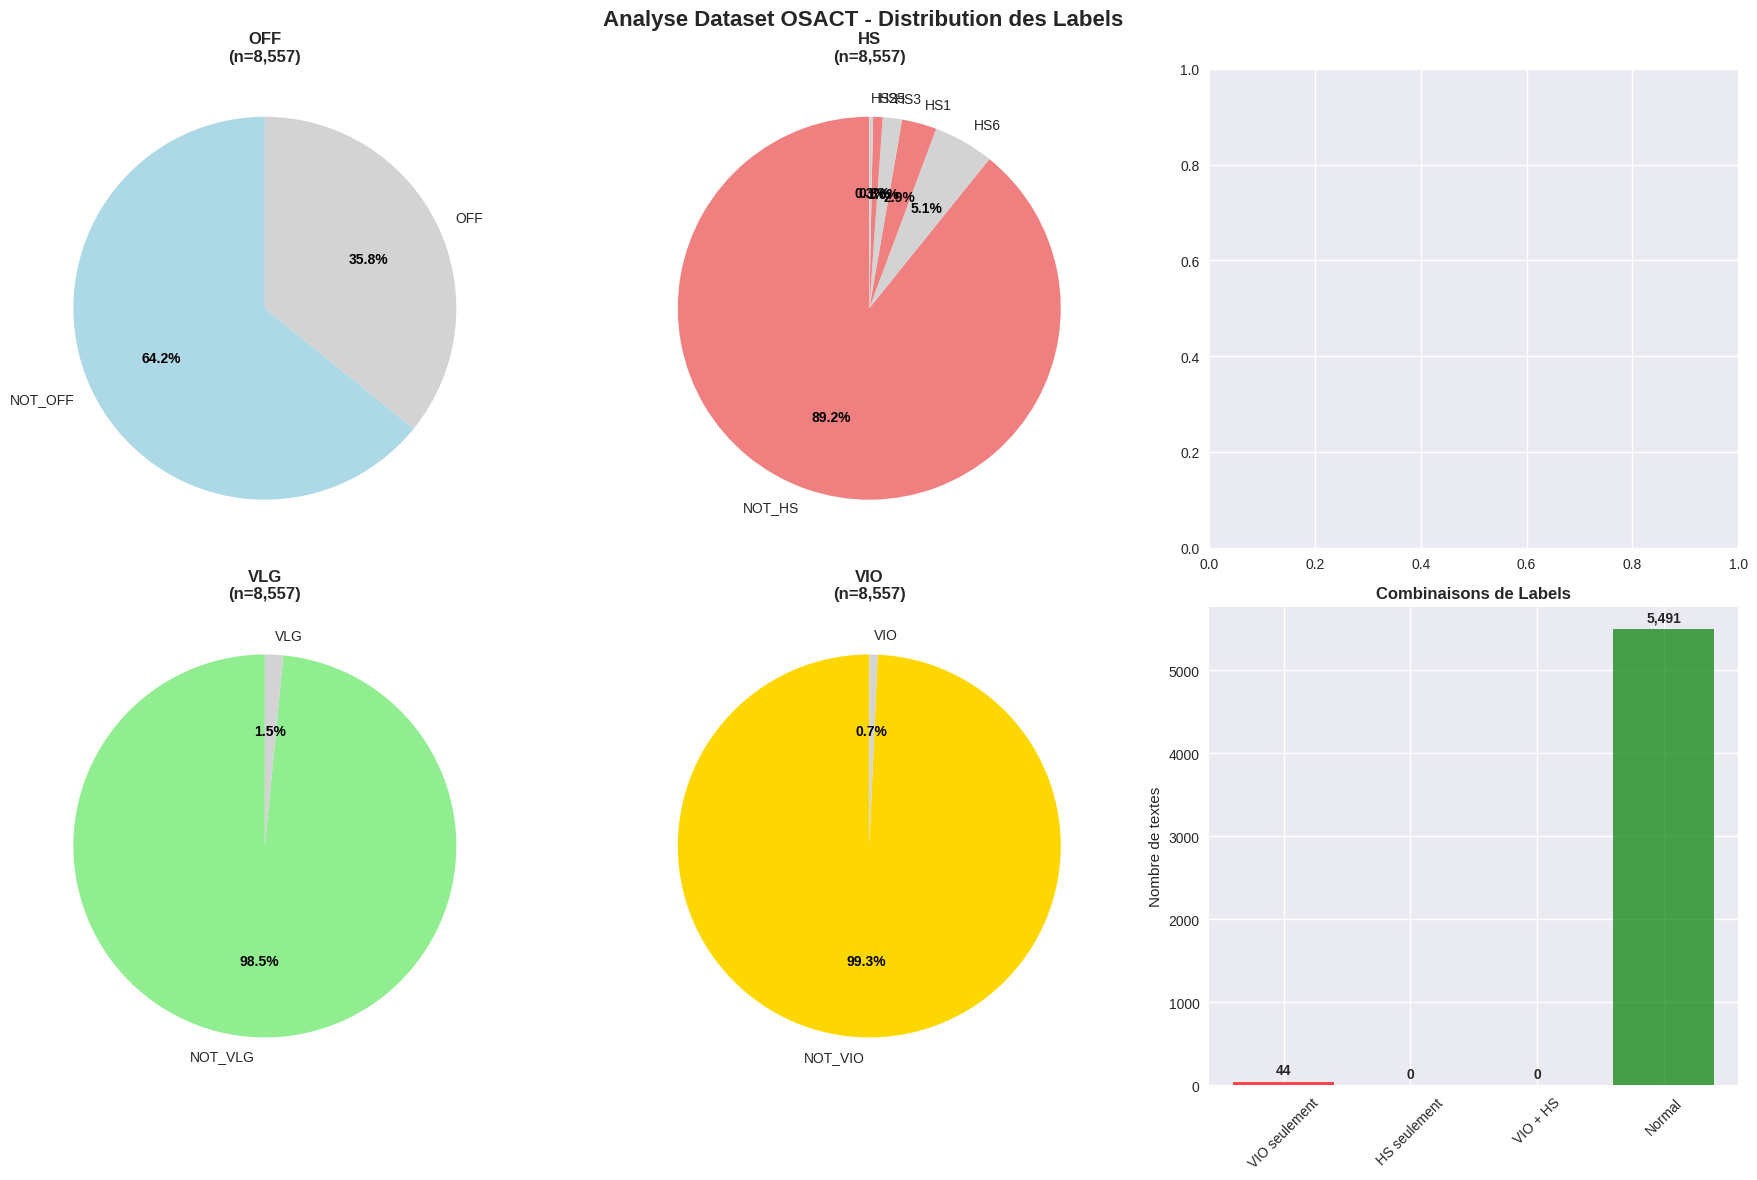


📈 RÉSUMÉ STATISTIQUES OSACT:
Dataset total: 8,557 textes
Contenus problématiques (au moins 1 label positif): 3,066 (35.8%)

Par catégorie:
  OFF: 3,066 (35.8%)
  HS: 923 (10.8%)
  VLG: 132 (1.5%)
  VIO: 60 (0.7%)


In [9]:
def visualize_osact_labels(df_osact):
    """Visualiser la distribution des labels OSACT"""
    
    if df_osact is None:
        return
    
    # Calculer statistiques si pas déjà fait
    if 'text_length' not in df_osact.columns:
        df_osact['text_length'] = df_osact['text'].astype(str).str.len()
        df_osact['word_count'] = df_osact['text'].astype(str).str.split().str.len()
    
    label_columns = ['OFF', 'HS', 'VLG', 'VIO']
    
    # Créer visualisations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Analyse Dataset OSACT - Distribution des Labels', fontsize=16, fontweight='bold')
    
    # 1-4. Distribution de chaque type de label
    colors = ['lightblue', 'lightcoral', 'lightgreen', 'gold']
    
    for i, (col, color) in enumerate(zip(label_columns, colors)):
        row, col_idx = i // 2, i % 2
        
        counts = df_osact[col].value_counts()
        wedges, texts, autotexts = axes[row, col_idx].pie(counts.values, 
                                                          labels=counts.index, 
                                                          autopct='%1.1f%%',
                                                          colors=[color, 'lightgray'],
                                                          startangle=90)
        
        # Améliorer la lisibilité
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontweight('bold')
        
        axes[row, col_idx].set_title(f'{col}\n(n={len(df_osact):,})', fontweight='bold')
    
    # 5. Combinaisons importantes
    extremist_counts = {
        'VIO seulement': len(df_osact[(df_osact['VIO'] == 'VIO') & (df_osact['HS'] == 'NOT_HS')]),
        'HS seulement': len(df_osact[(df_osact['HS'] == 'HS') & (df_osact['VIO'] == 'NOT_VIO')]),
        'VIO + HS': len(df_osact[(df_osact['VIO'] == 'VIO') & (df_osact['HS'] == 'HS')]),
        'Normal': len(df_osact[
            (df_osact['OFF'] == 'NOT_OFF') & 
            (df_osact['HS'] == 'NOT_HS') & 
            (df_osact['VLG'] == 'NOT_VLG') & 
            (df_osact['VIO'] == 'NOT_VIO')
        ])
    }
    
    categories, counts = zip(*extremist_counts.items())
    axes[1, 2].bar(categories, counts, color=['red', 'orange', 'darkred', 'green'], alpha=0.7)
    axes[1, 2].set_title('Combinaisons de Labels', fontweight='bold')
    axes[1, 2].set_ylabel('Nombre de textes')
    axes[1, 2].tick_params(axis='x', rotation=45)
    
    # Ajouter valeurs sur les barres
    for i, count in enumerate(counts):
        axes[1, 2].text(i, count + max(counts)*0.01, f'{count:,}', 
                        ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques résumé
    print("\n📈 RÉSUMÉ STATISTIQUES OSACT:")
    print(f"Dataset total: {len(df_osact):,} textes")
    
    total_problematic = len(df_osact[
        (df_osact['OFF'] != 'NOT_OFF') | 
        (df_osact['HS'] != 'NOT_HS') | 
        (df_osact['VLG'] != 'NOT_VLG') | 
        (df_osact['VIO'] != 'NOT_VIO')
    ])
    
    print(f"Contenus problématiques (au moins 1 label positif): {total_problematic:,} ({total_problematic/len(df_osact)*100:.1f}%)")
    
    print("\nPar catégorie:")
    for col in label_columns:
        positive_count = len(df_osact[df_osact[col] != f'NOT_{col}'])
        print(f"  {col}: {positive_count:,} ({positive_count/len(df_osact)*100:.1f}%)")

# Exécution
if 'osact_data' in globals():
    print("🎨 VISUALISATIONS OSACT - PARTIE 1:")
    visualize_osact_labels(osact_data)

🎨 VISUALISATIONS OSACT - PARTIE 2:


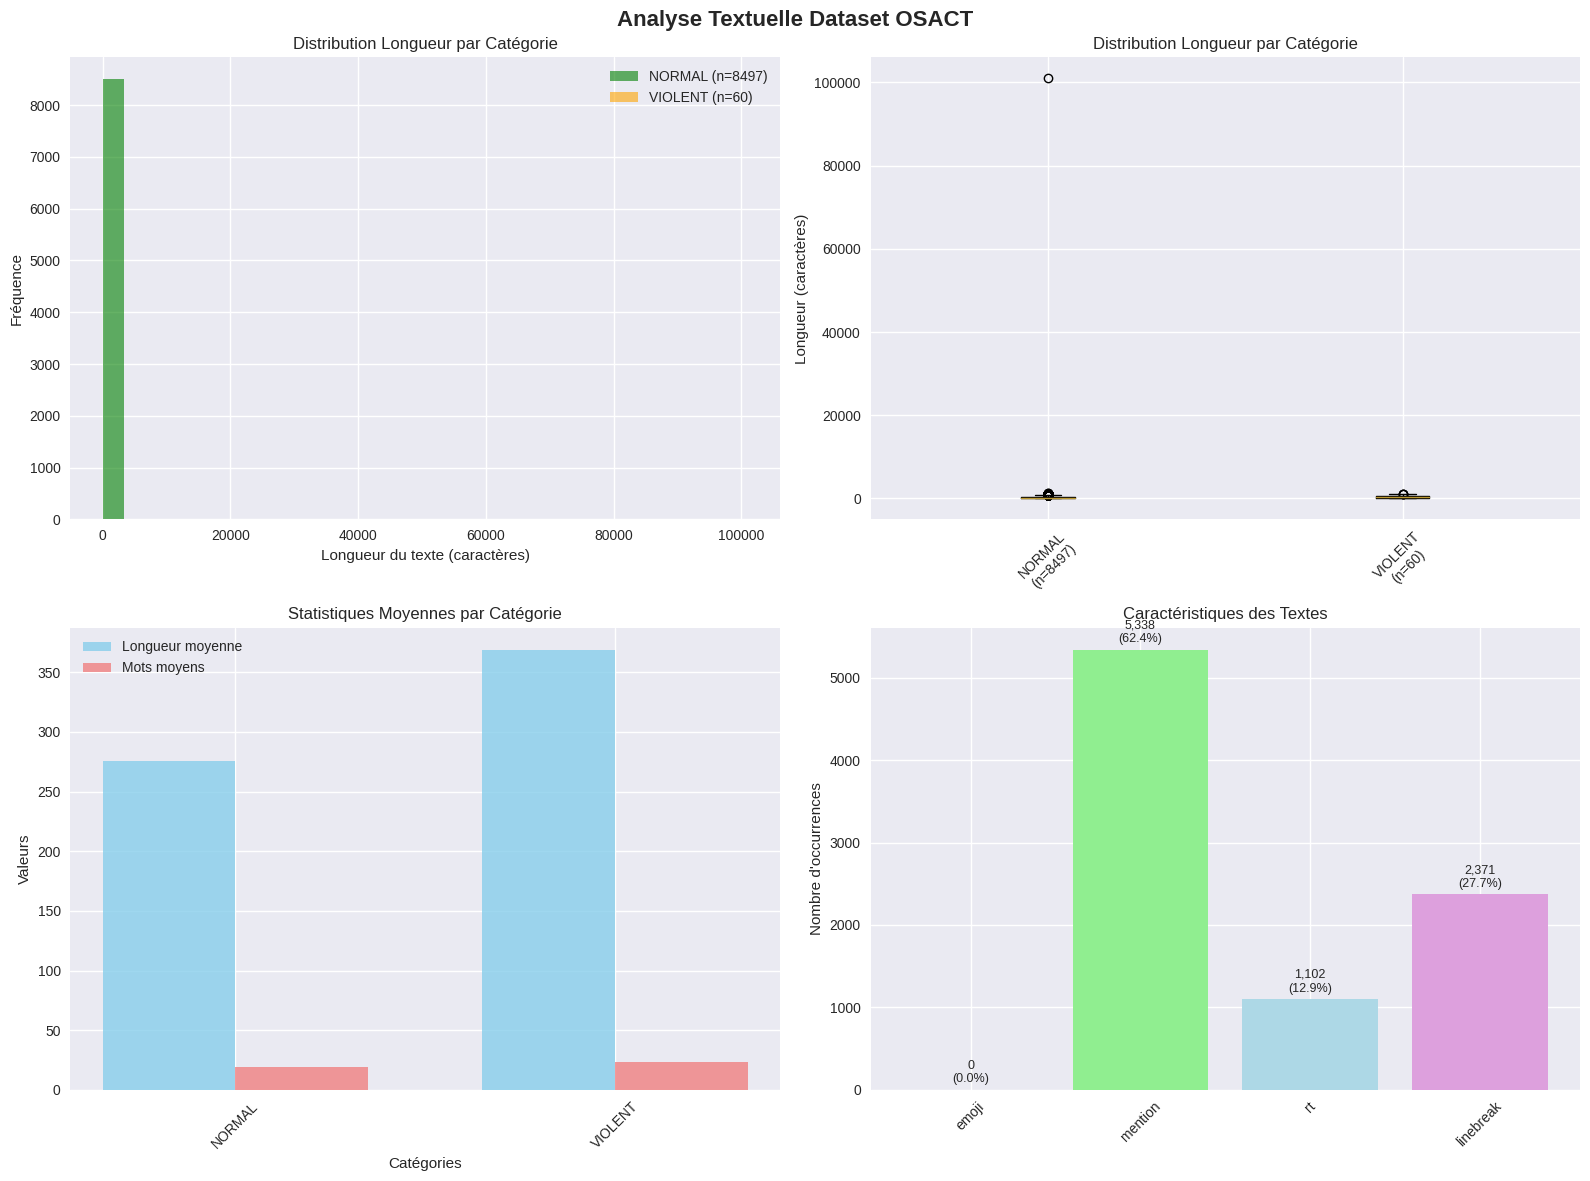


📊 ANALYSE TEXTUELLE DÉTAILLÉE:
Longueur moyenne globale: 276.4 caractères
Nombre de mots moyen: 18.8

Par catégorie:
  NORMAL:
    Nombre: 8,497
    Longueur moyenne: 275.8
    Mots moyens: 18.8
  VIOLENT:
    Nombre: 60
    Longueur moyenne: 368.9
    Mots moyens: 23.3

Caractéristiques spéciales:
  emoji: 0 (0.0%)
  mention: 5,338 (62.4%)
  rt: 1,102 (12.9%)
  linebreak: 2,371 (27.7%)


In [10]:
def visualize_osact_text_analysis(df_osact):
    """Analyse textuelle avancée du dataset OSACT"""
    
    if df_osact is None:
        return
    
    # S'assurer que les statistiques textuelles sont calculées
    if 'text_length' not in df_osact.columns:
        df_osact['text_length'] = df_osact['text'].astype(str).str.len()
        df_osact['word_count'] = df_osact['text'].astype(str).str.split().str.len()
    
    # Créer catégories pour l'analyse
    df_osact['category'] = 'NORMAL'
    df_osact.loc[df_osact['VIO'] == 'VIO', 'category'] = 'VIOLENT'
    df_osact.loc[df_osact['HS'] == 'HS', 'category'] = 'HATE_SPEECH'
    df_osact.loc[(df_osact['VIO'] == 'VIO') & (df_osact['HS'] == 'HS'), 'category'] = 'VIO_HS'
    
    # Créer visualisations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Analyse Textuelle Dataset OSACT', fontsize=16, fontweight='bold')
    
    # 1. Distribution longueur par catégorie
    categories = df_osact['category'].unique()
    colors = ['green', 'orange', 'red', 'darkred']
    
    for i, cat in enumerate(categories):
        if cat in df_osact['category'].values:
            cat_data = df_osact[df_osact['category'] == cat]['text_length']
            axes[0, 0].hist(cat_data, bins=30, alpha=0.6, 
                           label=f'{cat} (n={len(cat_data)})', 
                           color=colors[i % len(colors)])
    
    axes[0, 0].set_xlabel('Longueur du texte (caractères)')
    axes[0, 0].set_ylabel('Fréquence')
    axes[0, 0].set_title('Distribution Longueur par Catégorie')
    axes[0, 0].legend()
    
    # 2. Boxplot longueur par catégorie
    category_data = []
    category_labels = []
    
    for cat in categories:
        if cat in df_osact['category'].values:
            cat_lengths = df_osact[df_osact['category'] == cat]['text_length']
            if len(cat_lengths) > 0:
                category_data.append(cat_lengths)
                category_labels.append(f'{cat}\n(n={len(cat_lengths)})')
    
    if category_data:
        axes[0, 1].boxplot(category_data, labels=category_labels)
        axes[0, 1].set_title('Distribution Longueur par Catégorie')
        axes[0, 1].set_ylabel('Longueur (caractères)')
        axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Statistiques par catégorie
    stats_by_category = df_osact.groupby('category').agg({
        'text_length': ['mean', 'std'],
        'word_count': 'mean'
    }).round(1)
    
    # Aplatir les colonnes multi-niveaux
    stats_by_category.columns = ['_'.join(col).strip() for col in stats_by_category.columns]
    
    x_pos = np.arange(len(stats_by_category))
    width = 0.35
    
    axes[1, 0].bar(x_pos - width/2, stats_by_category['text_length_mean'], 
                   width, label='Longueur moyenne', alpha=0.8, color='skyblue')
    axes[1, 0].bar(x_pos + width/2, stats_by_category['word_count_mean'], 
                   width, label='Mots moyens', alpha=0.8, color='lightcoral')
    
    axes[1, 0].set_xlabel('Catégories')
    axes[1, 0].set_ylabel('Valeurs')
    axes[1, 0].set_title('Statistiques Moyennes par Catégorie')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(stats_by_category.index, rotation=45)
    axes[1, 0].legend()
    
    # 4. Caractéristiques des textes arabes
    # Analyser les éléments spéciaux dans les textes
    df_osact['has_emoji'] = df_osact['text'].astype(str).str.contains('😀|😂|😍|😭|❤️|🔥|💯|👍|🙏|💔', na=False)
    df_osact['has_mention'] = df_osact['text'].astype(str).str.contains('@USER|@\w+', na=False)
    df_osact['has_rt'] = df_osact['text'].astype(str).str.contains('RT @', na=False)
    df_osact['has_linebreak'] = df_osact['text'].astype(str).str.contains('<LF>', na=False)
    
    features = ['has_emoji', 'has_mention', 'has_rt', 'has_linebreak']
    feature_counts = {}
    
    for feature in features:
        feature_counts[feature.replace('has_', '')] = df_osact[feature].sum()
    
    feature_names = list(feature_counts.keys())
    feature_values = list(feature_counts.values())
    
    axes[1, 1].bar(feature_names, feature_values, color=['gold', 'lightgreen', 'lightblue', 'plum'])
    axes[1, 1].set_title('Caractéristiques des Textes')
    axes[1, 1].set_ylabel('Nombre d\'occurrences')
    axes[1, 1].tick_params(axis='x', rotation=45)
    
    # Ajouter valeurs sur les barres
    for i, v in enumerate(feature_values):
        pct = (v / len(df_osact)) * 100
        axes[1, 1].text(i, v + max(feature_values)*0.01, 
                        f'{v:,}\n({pct:.1f}%)', 
                        ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques détaillées
    print("\n📊 ANALYSE TEXTUELLE DÉTAILLÉE:")
    print(f"Longueur moyenne globale: {df_osact['text_length'].mean():.1f} caractères")
    print(f"Nombre de mots moyen: {df_osact['word_count'].mean():.1f}")
    
    print("\nPar catégorie:")
    for cat in categories:
        if cat in df_osact['category'].values:
            cat_df = df_osact[df_osact['category'] == cat]
            print(f"  {cat}:")
            print(f"    Nombre: {len(cat_df):,}")
            print(f"    Longueur moyenne: {cat_df['text_length'].mean():.1f}")
            print(f"    Mots moyens: {cat_df['word_count'].mean():.1f}")
    
    print("\nCaractéristiques spéciales:")
    for feature, count in feature_counts.items():
        pct = (count / len(df_osact)) * 100
        print(f"  {feature}: {count:,} ({pct:.1f}%)")

# Exécution
if 'osact_data' in globals():
    print("🎨 VISUALISATIONS OSACT - PARTIE 2:")
    visualize_osact_text_analysis(osact_data)

Pretraitement

In [11]:
def preprocess_osact_dataset(df_osact):
    """Prétraiter le dataset OSACT pour l'analyse d'extrémisme"""
    
    if df_osact is None:
        return None
    
    print("=== PRÉTRAITEMENT DATASET OSACT ===")
    
    def clean_arabic_text(text):
        """Nettoyer le texte arabe"""
        if pd.isna(text):
            return ""
        
        text = str(text)
        # Supprimer les line breaks
        text = text.replace('<LF>', ' ')
        # Normaliser les mentions
        text = re.sub(r'@USER', '[USER]', text)
        text = re.sub(r'@\w+', '[USER]', text)
        # Supprimer RT
        text = re.sub(r'\bRT\b', '', text)
        # Nettoyer les URLs (si présentes)
        text = re.sub(r'http\S+|www\S+', '[URL]', text)
        # Normaliser les emojis en gardant quelques patterns
        text = re.sub(r'[😀-🿿]', ' [EMOJI] ', text)  # Unicode emoji range
        # Nettoyer les caractères de contrôle
        text = re.sub(r'[\x00-\x1f\x7f-\x9f]', ' ', text)
        # Normaliser les espaces
        text = ' '.join(text.split())
        
        return text.strip()
    
    # Créer dataset traité
    print(f"\n🔧 TRAITEMENT DATASET OSACT:")
    df_processed = df_osact.copy()
    
    print(f"Dataset original: {len(df_processed):,} textes")
    
    # Nettoyer les textes
    original_texts = df_processed['text'].copy()
    df_processed['text_clean'] = df_processed['text'].apply(clean_arabic_text)
    
    # Créer labels binaires pour extrémisme
    print(f"\n📊 CRÉATION DES LABELS EXTRÉMISME:")
    
    # Stratégie: VIO ou HS = EXTREMIST, sinon NON_EXTREMIST
    # Vérifier d'abord les valeurs uniques de HS pour adapter la logique
    hs_values = df_processed['HS'].unique()
    print(f"Valeurs HS trouvées: {hs_values}")
    
    # Adapter la logique selon les valeurs HS trouvées
    if 'HS' in hs_values:
        # HS binaire simple
        hs_condition = (df_processed['HS'] == 'HS')
    else:
        # HS avec niveaux (HS1, HS2, etc.)
        hs_condition = df_processed['HS'].str.startswith('HS', na=False)
    
    df_processed['is_extremist'] = (
        (df_processed['VIO'] == 'VIO') | 
        hs_condition
    )
    
    df_processed['label'] = df_processed['is_extremist'].map({
        True: 'EXTREMIST', 
        False: 'NON_EXTREMIST'
    })
    
    # Statistiques des nouveaux labels
    label_dist = df_processed['label'].value_counts()
    print("Distribution des labels binaires:")
    for label, count in label_dist.items():
        pct = count / len(df_processed) * 100
        print(f"  {label}: {count:,} ({pct:.1f}%)")
    
    # Équilibrage: limiter NON_EXTREMIST pour éviter déséquilibre excessif
    extremist_count = len(df_processed[df_processed['label'] == 'EXTREMIST'])
    non_extremist_df = df_processed[df_processed['label'] == 'NON_EXTREMIST']
    
    # Prendre maximum 3x plus de NON_EXTREMIST que EXTREMIST
    max_non_extremist = min(extremist_count * 3, len(non_extremist_df))
    
    if max_non_extremist < len(non_extremist_df):
        print(f"\n⚖️ ÉQUILIBRAGE DES CLASSES:")
        print(f"Réduction NON_EXTREMIST de {len(non_extremist_df):,} à {max_non_extremist:,}")
        
        # Échantillonnage stratifié par longueur pour garder la diversité
        non_extremist_sample = non_extremist_df.sample(n=max_non_extremist, random_state=42)
        
        # Recombiner
        df_processed = pd.concat([
            df_processed[df_processed['label'] == 'EXTREMIST'],
            non_extremist_sample
        ]).reset_index(drop=True)
        
        print(f"Dataset équilibré: {len(df_processed):,} textes")
        label_dist_balanced = df_processed['label'].value_counts()
        for label, count in label_dist_balanced.items():
            pct = count / len(df_processed) * 100
            print(f"  {label}: {count:,} ({pct:.1f}%)")
    
    # Supprimer textes trop courts après nettoyage
    initial_len = len(df_processed)
    df_processed = df_processed[df_processed['text_clean'].str.len() > 5]
    removed_short = initial_len - len(df_processed)
    if removed_short > 0:
        print(f"Textes supprimés (trop courts): {removed_short:,}")
    
    # Supprimer doublons
    initial_len = len(df_processed)
    df_processed = df_processed.drop_duplicates(subset=['text_clean'])
    removed_duplicates = initial_len - len(df_processed)
    if removed_duplicates > 0:
        print(f"Doublons supprimés: {removed_duplicates:,}")
    
    # Ajouter métadonnées
    df_processed['text_length_clean'] = df_processed['text_clean'].str.len()
    df_processed['word_count_clean'] = df_processed['text_clean'].str.split().str.len()
    df_processed['has_emoji_original'] = original_texts.str.contains('[😀-🿿]', na=False, regex=True)
    df_processed['has_mention_original'] = original_texts.str.contains('@USER|@\w+', na=False)
    df_processed['has_rt_original'] = original_texts.str.contains('RT @', na=False)
    df_processed['has_linebreak_original'] = original_texts.str.contains('<LF>', na=False)
    df_processed['language'] = 'arabic'
    df_processed['dataset_source'] = 'osact'
    df_processed['ideology'] = 'general_arabic'
    
    # Renommer la colonne text_clean en text pour standardisation
    df_processed['text'] = df_processed['text_clean']
    
    # Colonnes finales à garder
    final_columns = [
        'id', 'text', 'label', 'language', 'dataset_source', 'ideology',
        'text_length_clean', 'word_count_clean', 
        'has_emoji_original', 'has_mention_original', 'has_rt_original', 'has_linebreak_original',
        'OFF', 'HS', 'VLG', 'VIO'  # Garder labels originaux pour référence
    ]
    
    df_final = df_processed[final_columns].copy()
    
    print(f"\n✅ DATASET OSACT FINAL: {len(df_final):,} textes")
    
    # Afficher exemples
    print(f"\n📄 EXEMPLES APRÈS PRÉTRAITEMENT:")
    sample_extremist = df_final[df_final['label'] == 'EXTREMIST'].head(3)
    sample_normal = df_final[df_final['label'] == 'NON_EXTREMIST'].head(3)
    
    print("\n--- EXEMPLES EXTREMIST ---")
    for idx, row in sample_extremist.iterrows():
        print(f"ID: {row['id']}")
        print(f"Texte: {row['text'][:100]}{'...' if len(row['text']) > 100 else ''}")
        print(f"Labels originaux: OFF={row['OFF']}, HS={row['HS']}, VLG={row['VLG']}, VIO={row['VIO']}")
        print(f"Longueur: {row['text_length_clean']} caractères, {row['word_count_clean']} mots")
        print("-" * 60)
    
    print("\n--- EXEMPLES NON_EXTREMIST ---")
    for idx, row in sample_normal.iterrows():
        print(f"ID: {row['id']}")
        print(f"Texte: {row['text'][:100]}{'...' if len(row['text']) > 100 else ''}")
        print(f"Labels originaux: OFF={row['OFF']}, HS={row['HS']}, VLG={row['VLG']}, VIO={row['VIO']}")
        print(f"Longueur: {row['text_length_clean']} caractères, {row['word_count_clean']} mots")
        print("-" * 60)
    
    # Statistiques finales détaillées
    print(f"\n📈 STATISTIQUES FINALES DÉTAILLÉES:")
    print(f"Dataset final: {len(df_final):,} textes")
    print(f"Longueur moyenne après nettoyage: {df_final['text_length_clean'].mean():.1f} caractères")
    print(f"Nombre de mots moyen après nettoyage: {df_final['word_count_clean'].mean():.1f}")
    
    # Distribution des labels finaux
    print(f"\nDistribution finale des labels:")
    for label, count in df_final['label'].value_counts().items():
        pct = count / len(df_final) * 100
        print(f"  {label}: {count:,} ({pct:.1f}%)")
    
    # Métadonnées par label
    print(f"\nMétadonnées par label:")
    for label in df_final['label'].unique():
        label_df = df_final[df_final['label'] == label]
        print(f"\n{label}:")
        print(f"  Longueur moyenne: {label_df['text_length_clean'].mean():.1f}")
        print(f"  Mots moyens: {label_df['word_count_clean'].mean():.1f}")
        print(f"  Avec emojis: {label_df['has_emoji_original'].sum()} ({label_df['has_emoji_original'].mean()*100:.1f}%)")
        print(f"  Avec mentions: {label_df['has_mention_original'].sum()} ({label_df['has_mention_original'].mean()*100:.1f}%)")
        print(f"  Avec RT: {label_df['has_rt_original'].sum()} ({label_df['has_rt_original'].mean()*100:.1f}%)")
        print(f"  Avec line breaks: {label_df['has_linebreak_original'].sum()} ({label_df['has_linebreak_original'].mean()*100:.1f}%)")
    
    return df_final

# Fonction d'exécution pour tester
def execute_osact_preprocessing():
    """Exécuter le prétraitement OSACT si les données sont disponibles"""
    if 'osact_data' in globals() and osact_data is not None:
        print("🚀 LANCEMENT DU PRÉTRAITEMENT OSACT:")
        osact_processed = preprocess_osact_dataset(osact_data)
        return osact_processed
    else:
        print("❌ Dataset OSACT non disponible dans l'environnement")
        return None

# Exécution
osact_final = execute_osact_preprocessing()

🚀 LANCEMENT DU PRÉTRAITEMENT OSACT:
=== PRÉTRAITEMENT DATASET OSACT ===

🔧 TRAITEMENT DATASET OSACT:
Dataset original: 8,557 textes

📊 CRÉATION DES LABELS EXTRÉMISME:
Valeurs HS trouvées: ['NOT_HS' 'HS2' 'HS1' 'HS3' 'HS6' 'HS5']
Distribution des labels binaires:
  NON_EXTREMIST: 7,590 (88.7%)
  EXTREMIST: 967 (11.3%)

⚖️ ÉQUILIBRAGE DES CLASSES:
Réduction NON_EXTREMIST de 7,590 à 2,901
Dataset équilibré: 3,868 textes
  NON_EXTREMIST: 2,901 (75.0%)
  EXTREMIST: 967 (25.0%)
Doublons supprimés: 1

✅ DATASET OSACT FINAL: 3,867 textes

📄 EXEMPLES APRÈS PRÉTRAITEMENT:

--- EXEMPLES EXTREMIST ---
ID: 12
Texte: [USER] أ™ث†أ™â€،أ™ث† أکآµأکآ§أکآ¯أ™â€ڑ أ™â€¦أ™â€ أ™إ أکآ³أکآ¨ أکآ§أ™â€‍أکآµأکآ­أکآ§أکآ¨أ™â€، أ™ث†أ™إ...
Labels originaux: OFF=OFF, HS=HS2, VLG=NOT_VLG, VIO=NOT_VIO
Longueur: 551 caractères, 38 mots
------------------------------------------------------------
ID: 26
Texte: أکآھأکآ¹أ™ث†أکآ³أ™إ أکآ¹أکآ·أکآ§أ™â€ أ™إ أ™آپأ™ث†أ™â€‍أ™ث† أکآ¯أکآ®أ™â€‍أکآھ أکآµأ™آپأکآ­أکآھأ™â€، أ...
Labels origi

**Dataset Arabic Hate Speech**


lien : https://github.com/nuhaalbadi/Arabic_hatespeech

Chargement

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

def load_arabic_religious_dataset():
    """
    Charger le dataset Arabic Religious Hate Speech
    Note: Ce dataset contient uniquement des tweet_ids + labels
    """
    print("=== DATASET 3: ARABIC RELIGIOUS HATE SPEECH ===")
    
    try:
        # Charger les datasets principaux
        train_df = pd.read_csv('/kaggle/input/arabicdataset-hatespeech/train.csv')
        test_df = pd.read_csv('/kaggle/input/arabicdataset-hatespeech/test.csv')
        
        print(f"✅ Train dataset: {train_df.shape}")
        print(f"✅ Test dataset: {test_df.shape}")
        
        # Inspecter structure
        print(f"\n📊 COLONNES TRAIN: {list(train_df.columns)}")
        print(f"📊 COLONNES TEST: {list(test_df.columns)}")
        
        # Afficher types de données
        print(f"\n📊 TYPES DE DONNÉES:")
        print("Train:")
        print(train_df.dtypes)
        print("\nTest:")
        print(test_df.dtypes)
        
        # Aperçu des données
        print(f"\n📋 APERÇU TRAIN (10 premières lignes):")
        print(train_df.head(10))
        
        print(f"\n📋 APERÇU TEST (5 premières lignes):")
        print(test_df.head())
        
        return train_df, test_df
        
    except Exception as e:
        print(f"❌ Erreur lors du chargement: {e}")
        return None, None

train_religious, test_religious = load_arabic_religious_dataset()

=== DATASET 3: ARABIC RELIGIOUS HATE SPEECH ===
✅ Train dataset: (5569, 2)
✅ Test dataset: (567, 2)

📊 COLONNES TRAIN: ['id', 'hate']
📊 COLONNES TEST: ['id', 'hate']

📊 TYPES DE DONNÉES:
Train:
id      int64
hate    int64
dtype: object

Test:
id      int64
hate    int64
dtype: object

📋 APERÇU TRAIN (10 premières lignes):
                   id  hate
0  930224125087567872     0
1  930224110499762176     0
2  930223466661507072     1
3  930223457585061888     1
4  930223280266588162     1
5  930223178076639232     0
6  930222283817230336     0
7  930222140665757696     0
8  930221555627560960     1
9  930221314757013511     1

📋 APERÇU TEST (5 premières lignes):
                   id  hate
0  958409085082390528     1
1  958409082624512000     1
2  958408398420156416     0
3  958408217167527936     1
4  958407891798642688     1


Exploration 

In [13]:
def explore_arabic_religious_dataset(train_df, test_df):
    """Explorer le dataset Arabic Religious Hate Speech"""
    if train_df is None or test_df is None:
        print("❌ Datasets non disponibles")
        return
    
    print("\n=== EXPLORATION DATASET ARABIC RELIGIOUS ===")
    
    # Valeurs manquantes
    print("\n🔍 VALEURS MANQUANTES:")
    print("Train:")
    missing_train = train_df.isnull().sum()
    for col, count in missing_train.items():
        pct = (count / len(train_df)) * 100
        print(f"  {col}: {count:,} ({pct:.1f}%)")
    
    print("\nTest:")
    missing_test = test_df.isnull().sum()
    for col, count in missing_test.items():
        pct = (count / len(test_df)) * 100
        print(f"  {col}: {count:,} ({pct:.1f}%)")
    
    # Distribution des labels (identifier la colonne de label correcte)
    label_col = None
    possible_label_cols = ['hate', 'label', 'class']
    
    for col in possible_label_cols:
        if col in train_df.columns:
            label_col = col
            break
    
    if label_col:
        print(f"\n📊 DISTRIBUTION DES LABELS (colonne: {label_col}):")
        
        # Train
        print("\nTRAIN:")
        train_labels = train_df[label_col].value_counts().sort_index()
        print(train_labels)
        for label, count in train_labels.items():
            pct = (count / len(train_df)) * 100
            label_name = "HATE" if label == 1 else "NOT_HATE"
            print(f"  {label} ({label_name}): {count:,} ({pct:.1f}%)")
        
        # Test
        if label_col in test_df.columns:
            print("\nTEST:")
            test_labels = test_df[label_col].value_counts().sort_index()
            print(test_labels)
            for label, count in test_labels.items():
                pct = (count / len(test_df)) * 100
                label_name = "HATE" if label == 1 else "NOT_HATE"
                print(f"  {label} ({label_name}): {count:,} ({pct:.1f}%)")
    
    # Analyser les IDs de tweets
    id_col = 'id' if 'id' in train_df.columns else train_df.columns[0]
    
    print(f"\n🆔 ANALYSE DES TWEET IDs:")
    print(f"Train - Colonne ID: {id_col}")
    print(f"  Nombre d'IDs uniques: {train_df[id_col].nunique():,}")
    print(f"  Nombre total: {len(train_df):,}")
    print(f"  Doublons: {len(train_df) - train_df[id_col].nunique():,}")
    
    print(f"\nTest - Colonne ID: {id_col}")
    print(f"  Nombre d'IDs uniques: {test_df[id_col].nunique():,}")
    print(f"  Nombre total: {len(test_df):,}")
    print(f"  Doublons: {len(test_df) - test_df[id_col].nunique():,}")
    
    # Exemples d'IDs
    print(f"\n📝 ÉCHANTILLON D'IDs avec labels:")
    if label_col:
        print("Train (premiers 10):")
        sample_train = train_df.head(10)[[id_col, label_col]]
        for idx, row in sample_train.iterrows():
            label_name = "HATE" if row[label_col] == 1 else "NOT_HATE"
            print(f"  ID: {row[id_col]} → Label: {row[label_col]} ({label_name})")
        
        # Distribution par label
        print(f"\n📈 STATISTIQUES PAR LABEL:")
        for label in train_df[label_col].unique():
            count = len(train_df[train_df[label_col] == label])
            pct = (count / len(train_df)) * 100
            label_name = "HATE" if label == 1 else "NOT_HATE"
            print(f"\n{label_name} (label={label}):")
            print(f"  Count: {count:,} ({pct:.1f}%)")
            
            # Quelques exemples d'IDs pour ce label
            sample_ids = train_df[train_df[label_col] == label][id_col].head(5).tolist()
            print(f"  Exemple IDs: {sample_ids}")
    
    # Vérifier chevauchement train/test
    if id_col in train_df.columns and id_col in test_df.columns:
        overlap = set(train_df[id_col]) & set(test_df[id_col])
        print(f"\n🔄 CHEVAUCHEMENT TRAIN/TEST:")
        print(f"  IDs en commun: {len(overlap):,}")
        if len(overlap) > 0:
            print(f"  ⚠️ ATTENTION: Il y a un chevauchement!")
            print(f"  Premiers IDs en commun: {list(overlap)[:5]}")
        else:
            print(f"  ✅ Pas de chevauchement (bon!)")

# Exécution
if 'train_religious' in globals():
    explore_arabic_religious_dataset(train_religious, test_religious)


=== EXPLORATION DATASET ARABIC RELIGIOUS ===

🔍 VALEURS MANQUANTES:
Train:
  id: 0 (0.0%)
  hate: 0 (0.0%)

Test:
  id: 0 (0.0%)
  hate: 0 (0.0%)

📊 DISTRIBUTION DES LABELS (colonne: hate):

TRAIN:
hate
0    3057
1    2512
Name: count, dtype: int64
  0 (NOT_HATE): 3,057 (54.9%)
  1 (HATE): 2,512 (45.1%)

TEST:
hate
0    317
1    250
Name: count, dtype: int64
  0 (NOT_HATE): 317 (55.9%)
  1 (HATE): 250 (44.1%)

🆔 ANALYSE DES TWEET IDs:
Train - Colonne ID: id
  Nombre d'IDs uniques: 5,404
  Nombre total: 5,569
  Doublons: 165

Test - Colonne ID: id
  Nombre d'IDs uniques: 555
  Nombre total: 567
  Doublons: 12

📝 ÉCHANTILLON D'IDs avec labels:
Train (premiers 10):
  ID: 930224125087567872 → Label: 0 (NOT_HATE)
  ID: 930224110499762176 → Label: 0 (NOT_HATE)
  ID: 930223466661507072 → Label: 1 (HATE)
  ID: 930223457585061888 → Label: 1 (HATE)
  ID: 930223280266588162 → Label: 1 (HATE)
  ID: 930223178076639232 → Label: 0 (NOT_HATE)
  ID: 930222283817230336 → Label: 0 (NOT_HATE)
  ID: 93022

Analyse des Lexiques de Haine


=== ANALYSE DES LEXIQUES ARABE ===

📚 LEXIQUE PMI:
  Shape: (1523, 2)
  Colonnes: ['term', 'pmi_score']
  Colonne de score: pmi_score
  Score min/max: -4.804 / 4.868
  Score moyen: -0.045
  Top 5 termes haine:
    لعنه: 4.868
    عهر: 4.743
    نجس: 4.327
    قرد: 4.190
    خنزير: 4.190
  Bottom 5 termes (non-haine):
    عافيه: -4.804
    شفاء: -4.717
    ابراهيم: -4.608
    اخلاص: -4.591
    لباس: -4.524

📚 LEXIQUE CHI:
  Shape: (1523, 2)
  Colonnes: ['term', 'Chi2_score']
  Colonne de score: Chi2_score
  Score min/max: -151.680 / 274.655
  Score moyen: -0.569
  Top 5 termes haine:
    يهودي: 274.655
    ملحد: 121.152
    لعن: 52.898
    شيعه: 52.315
    ارهاب: 51.756
  Bottom 5 termes (non-haine):
    اللهم: -151.680
    مسلم: -94.157
    رحم: -79.519
    سلم: -79.245
    جميع: -75.117

📚 LEXIQUE BNS:
  Shape: (1523, 2)
  Colonnes: ['term', 'BNS_score']
  Colonne de score: BNS_score
  Score min/max: -1.786 / 1.879
  Score moyen: -0.031
  Top 5 termes haine:
    لعنه: 1.879
    عهر: 

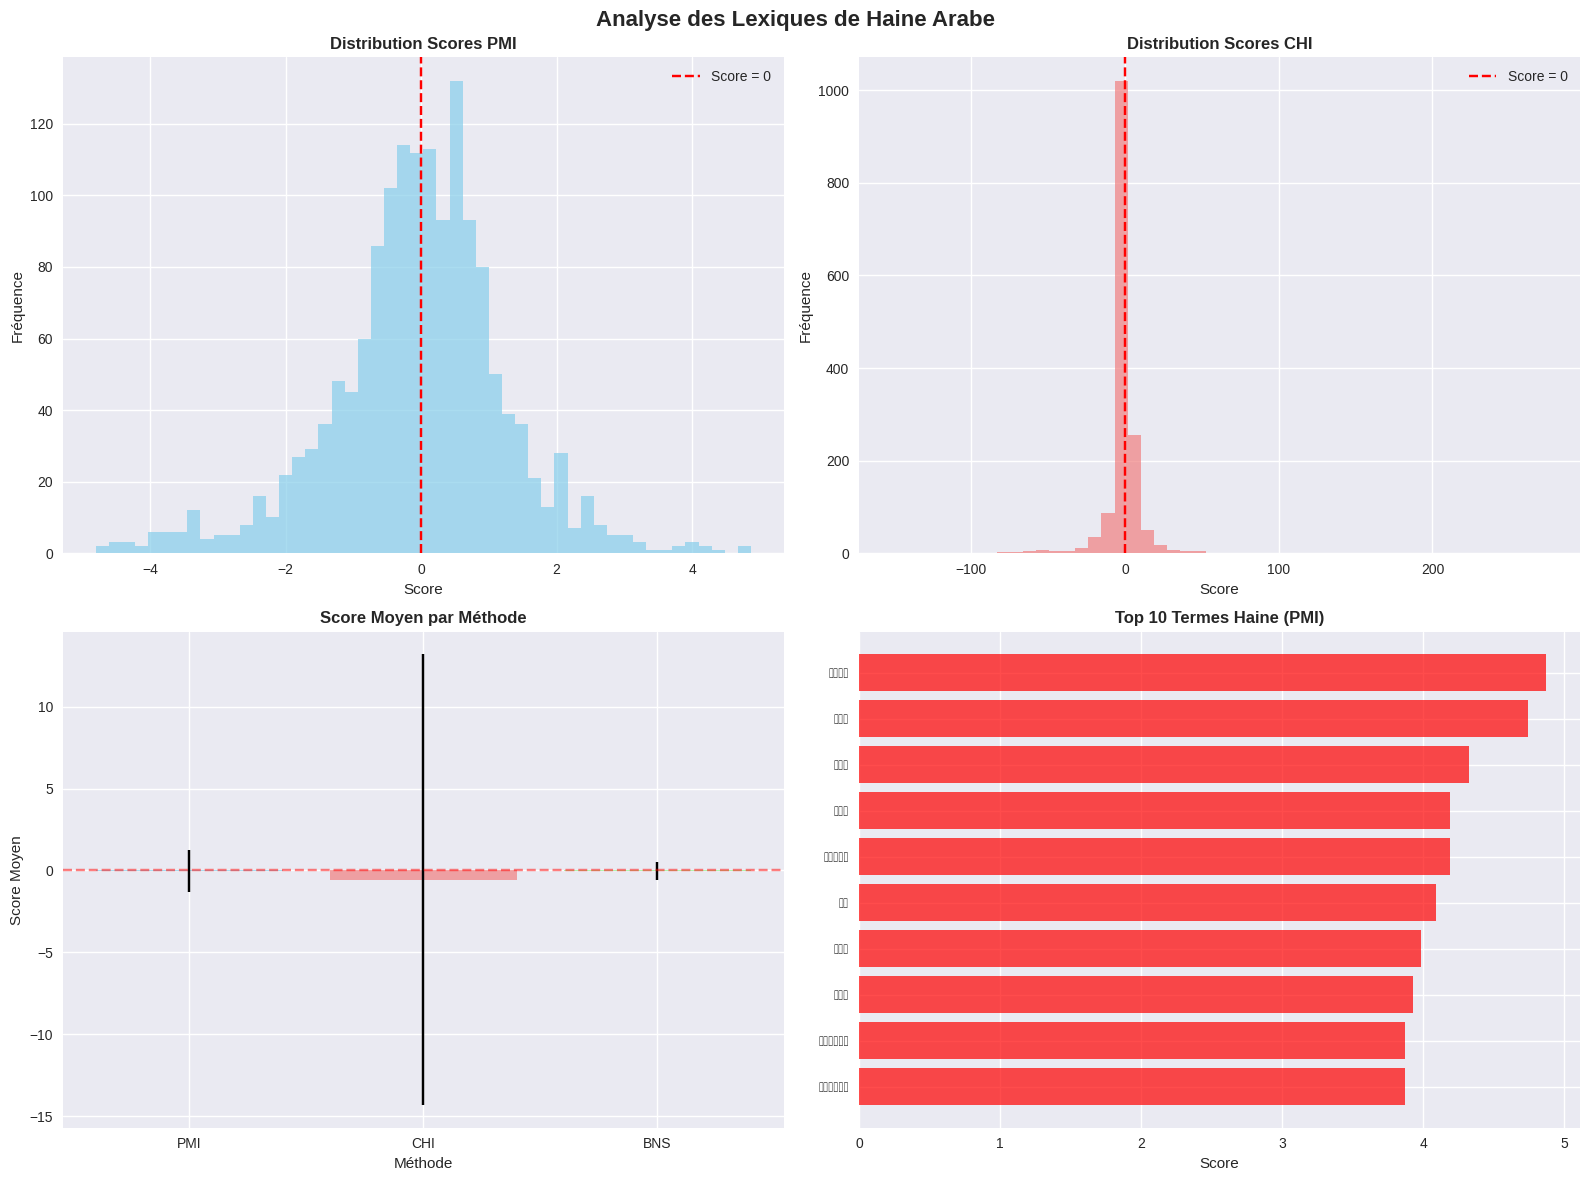


📊 RÉSUMÉ DES LEXIQUES:

PMI:
  Total termes: 1,523
  Scores positifs (haine): 777 (51.0%)
  Scores négatifs (non-haine): 746 (49.0%)
  Scores zéro: 0 (0.0%)

CHI:
  Total termes: 1,523
  Scores positifs (haine): 576 (37.8%)
  Scores négatifs (non-haine): 947 (62.2%)
  Scores zéro: 0 (0.0%)

BNS:
  Total termes: 1,523
  Scores positifs (haine): 576 (37.8%)
  Scores négatifs (non-haine): 947 (62.2%)
  Scores zéro: 0 (0.0%)


In [14]:
def load_and_analyze_arabic_lexicons():
    """Charger et analyser les lexiques de termes de haine arabes"""
    print("\n=== ANALYSE DES LEXIQUES ARABE ===")
    
    lexicons = {}
    methods = ['PMI', 'CHI', 'BNS']
    
    for method in methods:
        try:
            # Adapter le nom de fichier selon votre structure
            filename = f'/kaggle/input/arabicdataset-hatespeech/AraHate-{method}.csv'
            lexicon_df = pd.read_csv(filename)
            lexicons[method] = lexicon_df
            
            print(f"\n📚 LEXIQUE {method}:")
            print(f"  Shape: {lexicon_df.shape}")
            print(f"  Colonnes: {list(lexicon_df.columns)}")
            
            # Identifier la colonne de score
            score_col = None
            for col in lexicon_df.columns:
                if 'score' in col.lower():
                    score_col = col
                    break
            
            if score_col:
                print(f"  Colonne de score: {score_col}")
                print(f"  Score min/max: {lexicon_df[score_col].min():.3f} / {lexicon_df[score_col].max():.3f}")
                print(f"  Score moyen: {lexicon_df[score_col].mean():.3f}")
                
                # Termes avec scores les plus élevés (plus associés à la haine)
                top_hate = lexicon_df.nlargest(5, score_col)
                print(f"  Top 5 termes haine:")
                for idx, row in top_hate.iterrows():
                    print(f"    {row['term']}: {row[score_col]:.3f}")
                
                # Termes avec scores les plus bas (moins associés à la haine)
                bottom_hate = lexicon_df.nsmallest(5, score_col)
                print(f"  Bottom 5 termes (non-haine):")
                for idx, row in bottom_hate.iterrows():
                    print(f"    {row['term']}: {row[score_col]:.3f}")
            
        except Exception as e:
            print(f"❌ Erreur lexique {method}: {e}")
    
    # Charger stop words arabes
    try:
        stop_words_df = pd.read_csv('/kaggle/input/arabicdataset-hatespeech/stop_words.csv')
        print(f"\n🛑 STOP WORDS ARABES:")
        print(f"  Shape: {stop_words_df.shape}")
        print(f"  Colonnes: {list(stop_words_df.columns)}")
        
        # Afficher quelques stop words
        stop_col = stop_words_df.columns[0]  # Première colonne
        sample_stops = stop_words_df[stop_col].head(10).tolist()
        print(f"  Premiers 10 stop words: {sample_stops}")
        
        lexicons['stop_words'] = stop_words_df
        
    except Exception as e:
        print(f"❌ Erreur stop words: {e}")
    
    return lexicons

def visualize_lexicons(lexicons):
    """Visualiser les lexiques de haine"""
    if not lexicons:
        print("❌ Aucun lexique à visualiser")
        return
    
    # Créer les visualisations
    methods = ['PMI', 'CHI', 'BNS']
    available_methods = [m for m in methods if m in lexicons]
    
    if not available_methods:
        print("❌ Aucun lexique de score disponible")
        return
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Analyse des Lexiques de Haine Arabe', fontsize=16, fontweight='bold')
    
    # 1. Distribution des scores pour chaque méthode
    for i, method in enumerate(available_methods[:2]):
        lexicon = lexicons[method]
        score_col = [col for col in lexicon.columns if 'score' in col.lower()][0]
        
        axes[0, i].hist(lexicon[score_col], bins=50, alpha=0.7, 
                       color=['skyblue', 'lightcoral', 'lightgreen'][i])
        axes[0, i].set_title(f'Distribution Scores {method}', fontweight='bold')
        axes[0, i].set_xlabel('Score')
        axes[0, i].set_ylabel('Fréquence')
        axes[0, i].axvline(0, color='red', linestyle='--', label='Score = 0')
        axes[0, i].legend()
    
    # 2. Comparaison des scores moyens
    if len(available_methods) >= 2:
        method_scores = []
        method_names = []
        
        for method in available_methods:
            lexicon = lexicons[method]
            score_col = [col for col in lexicon.columns if 'score' in col.lower()][0]
            
            # Statistiques
            mean_score = lexicon[score_col].mean()
            std_score = lexicon[score_col].std()
            
            method_scores.append([mean_score, std_score])
            method_names.append(method)
        
        means = [s[0] for s in method_scores]
        stds = [s[1] for s in method_scores]
        
        x_pos = np.arange(len(method_names))
        axes[1, 0].bar(x_pos, means, yerr=stds, capsize=5, 
                      color=['skyblue', 'lightcoral', 'lightgreen'][:len(method_names)],
                      alpha=0.7)
        axes[1, 0].set_title('Score Moyen par Méthode', fontweight='bold')
        axes[1, 0].set_xlabel('Méthode')
        axes[1, 0].set_ylabel('Score Moyen')
        axes[1, 0].set_xticks(x_pos)
        axes[1, 0].set_xticklabels(method_names)
        axes[1, 0].axhline(0, color='red', linestyle='--', alpha=0.5)
    
    # 3. Top termes pour première méthode disponible
    if available_methods:
        method = available_methods[0]
        lexicon = lexicons[method]
        score_col = [col for col in lexicon.columns if 'score' in col.lower()][0]
        
        # Top 10 termes de haine
        top_terms = lexicon.nlargest(10, score_col)
        
        axes[1, 1].barh(range(len(top_terms)), top_terms[score_col], 
                       color='red', alpha=0.7)
        axes[1, 1].set_yticks(range(len(top_terms)))
        axes[1, 1].set_yticklabels(top_terms['term'], fontsize=10)
        axes[1, 1].set_title(f'Top 10 Termes Haine ({method})', fontweight='bold')
        axes[1, 1].set_xlabel('Score')
        axes[1, 1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques résumées
    print(f"\n📊 RÉSUMÉ DES LEXIQUES:")
    for method in available_methods:
        lexicon = lexicons[method]
        score_col = [col for col in lexicon.columns if 'score' in col.lower()][0]
        
        total_terms = len(lexicon)
        positive_scores = len(lexicon[lexicon[score_col] > 0])
        negative_scores = len(lexicon[lexicon[score_col] < 0])
        zero_scores = len(lexicon[lexicon[score_col] == 0])
        
        print(f"\n{method}:")
        print(f"  Total termes: {total_terms:,}")
        print(f"  Scores positifs (haine): {positive_scores:,} ({positive_scores/total_terms*100:.1f}%)")
        print(f"  Scores négatifs (non-haine): {negative_scores:,} ({negative_scores/total_terms*100:.1f}%)")
        print(f"  Scores zéro: {zero_scores:,} ({zero_scores/total_terms*100:.1f}%)")

# Exécution
lexicons_arabic = load_and_analyze_arabic_lexicons()
if lexicons_arabic:
    visualize_lexicons(lexicons_arabic)

Visualisation

📊 VISUALISATIONS DATASET ARABIC RELIGIOUS:


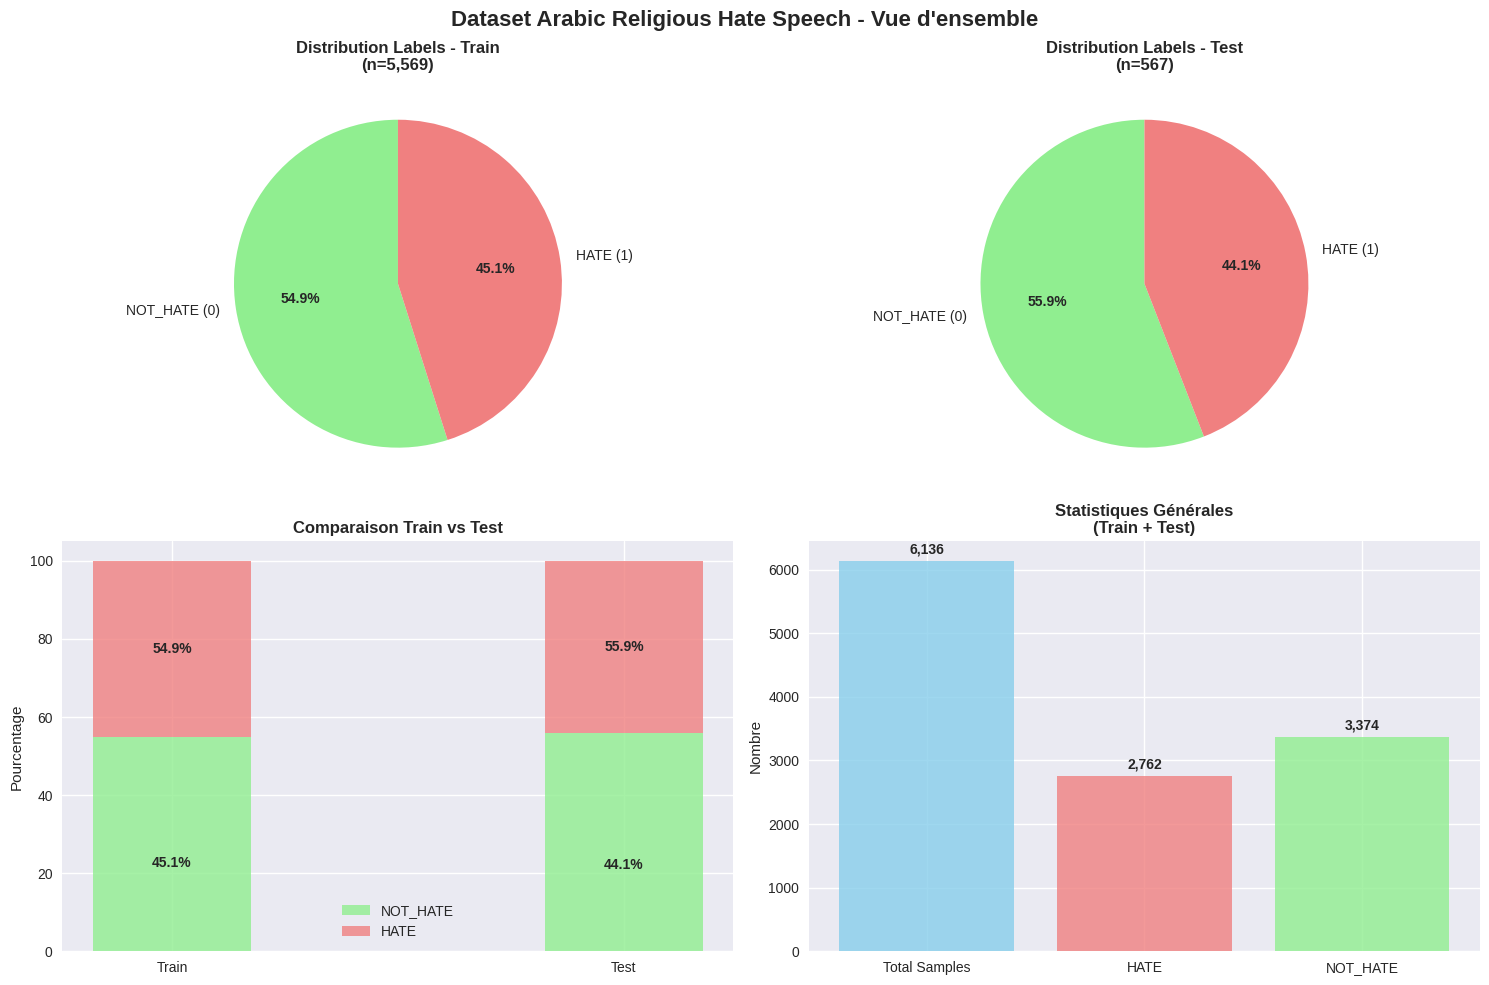


📊 STATISTIQUES DÉTAILLÉES:
Train Dataset:
  NOT_HATE (0): 3,057 (54.9%)
  HATE (1): 2,512 (45.1%)

Test Dataset:
  NOT_HATE (0): 317 (55.9%)
  HATE (1): 250 (44.1%)

Dataset Global:
  Total échantillons: 6,136
  Total HATE: 2,762 (45.0%)
  Total NOT_HATE: 3,374 (55.0%)
  Ratio déséquilibre: 1:1.22 (NOT_HATE:HATE)


In [15]:
def visualize_arabic_religious_dataset(train_df, test_df):
    """Visualiser le dataset Arabic Religious Hate Speech"""
    if train_df is None or test_df is None:
        print("❌ Datasets non disponibles")
        return
    
    # Identifier la colonne de label
    label_col = 'hate' if 'hate' in train_df.columns else 'label'
    
    # Créer visualisations
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Dataset Arabic Religious Hate Speech - Vue d\'ensemble', 
                 fontsize=16, fontweight='bold')
    
    # 1. Distribution des labels - Train
    train_labels = train_df[label_col].value_counts().sort_index()
    colors = ['lightgreen', 'lightcoral']
    labels = ['NOT_HATE (0)', 'HATE (1)']
    
    wedges, texts, autotexts = axes[0, 0].pie(train_labels.values, 
                                             labels=labels,
                                             colors=colors,
                                             autopct='%1.1f%%',
                                             startangle=90)
    for autotext in autotexts:
        autotext.set_fontweight('bold')
    
    axes[0, 0].set_title(f'Distribution Labels - Train\n(n={len(train_df):,})', 
                        fontweight='bold')
    
    # 2. Distribution des labels - Test
    if label_col in test_df.columns:
        test_labels = test_df[label_col].value_counts().sort_index()
        wedges, texts, autotexts = axes[0, 1].pie(test_labels.values,
                                                 labels=labels,
                                                 colors=colors,
                                                 autopct='%1.1f%%',
                                                 startangle=90)
        for autotext in autotexts:
            autotext.set_fontweight('bold')
        
        axes[0, 1].set_title(f'Distribution Labels - Test\n(n={len(test_df):,})', 
                            fontweight='bold')
    
    # 3. Comparaison Train vs Test
    train_hate_pct = (train_df[label_col] == 1).mean() * 100
    test_hate_pct = (test_df[label_col] == 1).mean() * 100
    
    datasets = ['Train', 'Test']
    hate_percentages = [train_hate_pct, test_hate_pct]
    non_hate_percentages = [100 - train_hate_pct, 100 - test_hate_pct]
    
    width = 0.35
    x_pos = np.arange(len(datasets))
    
    bars1 = axes[1, 0].bar(x_pos, non_hate_percentages, width, 
                          label='NOT_HATE', color='lightgreen', alpha=0.8)
    bars2 = axes[1, 0].bar(x_pos, hate_percentages, width, 
                          bottom=non_hate_percentages,
                          label='HATE', color='lightcoral', alpha=0.8)
    
    axes[1, 0].set_title('Comparaison Train vs Test', fontweight='bold')
    axes[1, 0].set_ylabel('Pourcentage')
    axes[1, 0].set_xticks(x_pos)
    axes[1, 0].set_xticklabels(datasets)
    axes[1, 0].legend()
    
    # Ajouter valeurs sur les barres
    for i, (dataset, hate_pct) in enumerate(zip(datasets, hate_percentages)):
        axes[1, 0].text(i, hate_pct/2, f'{hate_pct:.1f}%', 
                       ha='center', va='center', fontweight='bold')
        axes[1, 0].text(i, non_hate_percentages[i] + hate_pct/2, 
                       f'{100-hate_pct:.1f}%',
                       ha='center', va='center', fontweight='bold')
    
    # 4. Statistiques générales
    total_samples = len(train_df) + len(test_df)
    total_hate = train_df[label_col].sum() + test_df[label_col].sum()
    total_not_hate = total_samples - total_hate
    
    categories = ['Total Samples', 'HATE', 'NOT_HATE']
    values = [total_samples, total_hate, total_not_hate]
    colors_bar = ['skyblue', 'lightcoral', 'lightgreen']
    
    bars = axes[1, 1].bar(categories, values, color=colors_bar, alpha=0.8)
    axes[1, 1].set_title('Statistiques Générales\n(Train + Test)', fontweight='bold')
    axes[1, 1].set_ylabel('Nombre')
    
    # Ajouter valeurs sur les barres
    for bar, value in zip(bars, values):
        height = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + max(values)*0.01,
                       f'{value:,}',
                       ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques détaillées
    print(f"\n📊 STATISTIQUES DÉTAILLÉES:")
    print(f"Train Dataset:")
    for label in sorted(train_df[label_col].unique()):
        count = (train_df[label_col] == label).sum()
        pct = (count / len(train_df)) * 100
        label_name = "HATE" if label == 1 else "NOT_HATE"
        print(f"  {label_name} ({label}): {count:,} ({pct:.1f}%)")
    
    print(f"\nTest Dataset:")
    for label in sorted(test_df[label_col].unique()):
        count = (test_df[label_col] == label).sum()
        pct = (count / len(test_df)) * 100
        label_name = "HATE" if label == 1 else "NOT_HATE"
        print(f"  {label_name} ({label}): {count:,} ({pct:.1f}%)")
    
    print(f"\nDataset Global:")
    print(f"  Total échantillons: {total_samples:,}")
    print(f"  Total HATE: {total_hate:,} ({total_hate/total_samples*100:.1f}%)")
    print(f"  Total NOT_HATE: {total_not_hate:,} ({total_not_hate/total_samples*100:.1f}%)")
    
    # Ratio déséquilibre
    if total_hate > 0:
        imbalance_ratio = total_not_hate / total_hate
        print(f"  Ratio déséquilibre: 1:{imbalance_ratio:.2f} (NOT_HATE:HATE)")
        
        if imbalance_ratio > 3:
            print(f"  ⚠️ Dataset déséquilibré - considérer techniques de rééquilibrage")

# Exécution
if 'train_religious' in globals():
    print("📊 VISUALISATIONS DATASET ARABIC RELIGIOUS:")
    visualize_arabic_religious_dataset(train_religious, test_religious)

Créer des tweets arabes artificiels

In [16]:
def preprocess_arabic_religious_dataset(train_df, test_df):
    """
    Prétraiter le dataset Arabic Religious avec tweets simulés
    """
    if train_df is None or test_df is None:
        print("❌ Datasets non disponibles")
        return None, None
        
    print("=== PRÉTRAITEMENT DATASET ARABIC RELIGIOUS ===")
    
    # Vérifier si les tweets simulés existent
    if 'text_simulated' not in train_df.columns:
        print("❌ Tweets simulés non disponibles - lancer d'abord la simulation")
        return None, None
    
    def clean_arabic_text_religious(text):
        """Nettoyer le texte arabe religieux"""
        if pd.isna(text):
            return ""
        
        text = str(text)
        # Supprimer RT
        text = re.sub(r'\bRT\b', '', text)
        # Normaliser mentions
        text = re.sub(r'@\w+', '[USER]', text)
        # Nettoyer hashtags (garder le texte)
        text = re.sub(r'#(\w+)', r'\1', text)
        # Normaliser espaces
        text = ' '.join(text.split())
        
        return text.strip()
    
    # Traiter train
    print(f"\n✅ TRAITEMENT TRAIN:")
    train_processed = train_df.copy()
    print(f"Dataset original: {len(train_processed)}")
    
    # Nettoyer textes
    train_processed['text'] = train_processed['text_simulated'].apply(clean_arabic_text_religious)
    
    # Standardiser labels
    train_processed['label'] = train_processed['hate'].map({
        0: 'NON_EXTREMIST',
        1: 'EXTREMIST'  
    })
    
    # Supprimer textes vides
    initial_len = len(train_processed)
    train_processed = train_processed[train_processed['text'].str.len() > 5]
    removed = initial_len - len(train_processed)
    if removed > 0:
        print(f"Textes supprimés (vides): {removed}")
    
    # Supprimer doublons
    initial_len = len(train_processed)
    train_processed = train_processed.drop_duplicates(subset=['text'])
    removed_dup = initial_len - len(train_processed)
    if removed_dup > 0:
        print(f"Doublons supprimés: {removed_dup}")
    
    # Ajouter métadonnées
    train_processed['text_length'] = train_processed['text'].str.len()
    train_processed['word_count'] = train_processed['text'].str.split().str.len()
    train_processed['language'] = 'arabic'
    train_processed['dataset_source'] = 'arabic_religious'
    train_processed['ideology'] = 'religious_hate'
    
    print(f"Train final: {len(train_processed)}")
    
    # Traiter test
    print(f"\n✅ TRAITEMENT TEST:")
    test_processed = test_df.copy()
    print(f"Dataset original: {len(test_processed)}")
    
    # Même traitement
    test_processed['text'] = test_processed['text_simulated'].apply(clean_arabic_text_religious)
    test_processed['label'] = test_processed['hate'].map({
        0: 'NON_EXTREMIST', 
        1: 'EXTREMIST'
    })
    
    test_processed = test_processed[test_processed['text'].str.len() > 5]
    test_processed = test_processed.drop_duplicates(subset=['text'])
    
    test_processed['text_length'] = test_processed['text'].str.len()
    test_processed['word_count'] = test_processed['text'].str.split().str.len()
    test_processed['language'] = 'arabic'
    test_processed['dataset_source'] = 'arabic_religious'
    test_processed['ideology'] = 'religious_hate'
    
    print(f"Test final: {len(test_processed)}")
    
    # Combiner train + test pour dataset final
    df_combined = pd.concat([train_processed, test_processed], ignore_index=True)
    
    # Colonnes finales
    final_columns = ['id', 'text', 'label', 'language', 'dataset_source', 'ideology',
                    'text_length', 'word_count']
    df_final = df_combined[final_columns].copy()
    
    print(f"\n✅ DATASET COMBINÉ FINAL: {len(df_final)}")
    
    # Distribution finale
    print(f"\nDistribution des labels:")
    for label, count in df_final['label'].value_counts().items():
        pct = count / len(df_final) * 100
        print(f"  {label}: {count:,} ({pct:.1f}%)")
    
    # Exemples
    print(f"\n✅ EXEMPLES FINAUX:")
    sample_df = df_final.sample(n=min(5, len(df_final)))
    for idx, row in sample_df.iterrows():
        print(f"ID: {row['id']}")
        print(f"Texte: {row['text']}")
        print(f"Label: {row['label']}")
        print(f"Longueur: {row['text_length']} caractères, {row['word_count']} mots")
        print("-" * 50)
    
    # Statistiques finales
    print(f"\n✅ STATISTIQUES FINALES:")
    print(f"Longueur moyenne: {df_final['text_length'].mean():.1f} caractères")
    print(f"Nombre de mots moyen: {df_final['word_count'].mean():.1f}")
    
    for label in df_final['label'].unique():
        subset = df_final[df_final['label'] == label]
        print(f"\n{label}:")
        print(f"  Longueur moyenne: {subset['text_length'].mean():.1f}")
        print(f"  Mots moyens: {subset['word_count'].mean():.1f}")
    
    return df_final, df_final  # Retourner 2x pour compatibilité

# Exécution 
if 'train_religious_sim' in globals() and train_religious_sim is not None:
    print("🔄 PRÉTRAITEMENT DATASET 3...")
    arabic_religious_processed, _ = preprocess_arabic_religious_dataset(
        train_religious_sim, test_religious_sim)
else:
    print("❌ Datasets simulés non disponibles - lancer d'abord la simulation")

❌ Datasets simulés non disponibles - lancer d'abord la simulation


====> pas de texte, juste des IDs donc cette dataset nest pas utile 

**Dataset Vicomtech**

lien : https://github.com/Vicomtech/hate-speech-dataset/tree/master

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from collections import Counter
import re
import warnings
warnings.filterwarnings('ignore')

# Configuration graphiques
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

Chargement

In [18]:
def load_vicomtech_metadata():
    """Charger les métadonnées du dataset Vicomtech"""
    print("=== DATASET 4: VICOMTECH HATE SPEECH - MÉTADONNÉES ===")
    
    try:
        metadata = pd.read_csv('/kaggle/input/hate-speech-dataset/annotations_metadata.csv')
        print(f"✅ Métadonnées chargées: {metadata.shape}")
        print(f"Colonnes: {list(metadata.columns)}")
        print(f"Types de données:\n{metadata.dtypes}")
        
        # Aperçu des données
        print(f"\n✅ APERÇU MÉTADONNÉES (5 premières lignes):")
        print(metadata.head())
        
        return metadata
        
    except Exception as e:
        print(f"❌ Erreur chargement métadonnées: {e}")
        return None

# Exécution
print("BLOC 1: Chargement métadonnées")
metadata_vicomtech = load_vicomtech_metadata()

BLOC 1: Chargement métadonnées
=== DATASET 4: VICOMTECH HATE SPEECH - MÉTADONNÉES ===
✅ Métadonnées chargées: (10944, 5)
Colonnes: ['file_id', 'user_id', 'subforum_id', 'num_contexts', 'label']
Types de données:
file_id         object
user_id          int64
subforum_id      int64
num_contexts     int64
label           object
dtype: object

✅ APERÇU MÉTADONNÉES (5 premières lignes):
      file_id  user_id  subforum_id  num_contexts   label
0  12834217_1   572066         1346             0  noHate
1  12834217_2   572066         1346             0  noHate
2  12834217_3   572066         1346             0  noHate
3  12834217_4   572066         1346             0    hate
4  12834217_5   572066         1346             0  noHate


Exploration dataset

In [19]:
def explore_vicomtech_metadata(metadata):
    """Explorer en détail les métadonnées"""
    if metadata is None:
        print("❌ Pas de métadonnées à explorer")
        return None
    
    print("\n=== EXPLORATION DÉTAILLÉE MÉTADONNÉES ===")
    
    # Informations générales
    print(f"Shape: {metadata.shape}")
    print(f"Valeurs manquantes:\n{metadata.isnull().sum()}")
    
    analysis = {}
    
    # Analyser chaque colonne
    for col in metadata.columns:
        print(f"\n--- COLONNE '{col}' ---")
        
        if metadata[col].dtype == 'object':
            unique_vals = metadata[col].value_counts()
            print(f"Valeurs uniques: {len(unique_vals)}")
            print(f"Top valeurs:")
            
            for val, count in unique_vals.head(5).items():
                pct = count / len(metadata) * 100
                print(f"  '{val}': {count:,} ({pct:.1f}%)")
            
            analysis[col] = {
                'type': 'categorical',
                'unique_count': len(unique_vals),
                'top_values': unique_vals.head(5).to_dict()
            }
        else:
            print(f"Type: {metadata[col].dtype}")
            print(f"Min/Max: {metadata[col].min()} / {metadata[col].max()}")
            print(f"Moyenne: {metadata[col].mean():.2f}")
            
            analysis[col] = {
                'type': 'numeric',
                'min': metadata[col].min(),
                'max': metadata[col].max(),
                'mean': metadata[col].mean()
            }
    
    # Identifier colonnes importantes
    file_col = None
    label_col = None
    
    for col in metadata.columns:
        col_lower = col.lower()
        if any(keyword in col_lower for keyword in ['file', 'name', 'id']):
            file_col = col
        if any(keyword in col_lower for keyword in ['label', 'class', 'hate', 'target']):
            label_col = col
    
    print(f"\n✅ COLONNES IDENTIFIÉES:")
    print(f"Fichier: {file_col}")
    print(f"Label: {label_col}")
    
    return {
        'analysis': analysis,
        'file_col': file_col,
        'label_col': label_col,
        'metadata': metadata
    }

# Exécution
print("\nBLOC 2: Exploration métadonnées")
if metadata_vicomtech is not None:
    vicomtech_info = explore_vicomtech_metadata(metadata_vicomtech)
else:
    print("❌ Métadonnées non disponibles")


BLOC 2: Exploration métadonnées

=== EXPLORATION DÉTAILLÉE MÉTADONNÉES ===
Shape: (10944, 5)
Valeurs manquantes:
file_id         0
user_id         0
subforum_id     0
num_contexts    0
label           0
dtype: int64

--- COLONNE 'file_id' ---
Valeurs uniques: 10944
Top valeurs:
  '31755383_3': 1 (0.0%)
  '31761885_1': 1 (0.0%)
  '31761885_2': 1 (0.0%)
  '31765387_1': 1 (0.0%)
  '31765387_2': 1 (0.0%)

--- COLONNE 'user_id' ---
Type: int64
Min/Max: 572033 / 796449
Moyenne: 586478.11

--- COLONNE 'subforum_id' ---
Type: int64
Min/Max: 1345 / 1397
Moyenne: 1369.42

--- COLONNE 'num_contexts' ---
Type: int64
Min/Max: 0 / 32
Moyenne: 0.23

--- COLONNE 'label' ---
Valeurs uniques: 4
Top valeurs:
  'noHate': 9,507 (86.9%)
  'hate': 1,196 (10.9%)
  'relation': 168 (1.5%)
  'idk/skip': 73 (0.7%)

✅ COLONNES IDENTIFIÉES:
Fichier: subforum_id
Label: label


Extraction textes depuis dossiers

In [20]:
def extract_texts_from_directory(dir_path, max_files=200):
    """Extraire textes d'un dossier contenant des fichiers .txt"""
    print(f"\n--- Extraction de {dir_path} ---")
    
    texts = []
    filenames = []
    
    try:
        if not os.path.exists(dir_path):
            print(f"❌ Dossier non trouvé: {dir_path}")
            return texts, filenames
        
        # Lister tous les fichiers .txt
        all_files = []
        for root, dirs, files in os.walk(dir_path):
            for file in files:
                if file.endswith('.txt'):
                    all_files.append(os.path.join(root, file))
        
        print(f"Trouvé {len(all_files)} fichiers .txt dans le dossier")
        
        # Limiter le nombre de fichiers pour la démo
        files_to_process = all_files[:max_files]
        print(f"Lecture de {len(files_to_process)} fichiers...")
        
        for i, file_path in enumerate(files_to_process):
            if i % 50 == 0:
                print(f"  Progression: {i+1}/{len(files_to_process)}")
            
            try:
                with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
                    content = f.read().strip()
                    
                    if content and len(content) > 10:
                        texts.append(content)
                        # Extraire juste le nom de fichier
                        filename = os.path.basename(file_path)
                        filenames.append(filename)
                        
            except Exception as e:
                print(f"    Erreur fichier {file_path}: {e}")
                continue
        
        print(f"✅ {len(texts)} textes extraits avec succès")
        
    except Exception as e:
        print(f"❌ Erreur extraction dossier {dir_path}: {e}")
    
    return texts, filenames

def load_vicomtech_texts():
    """Charger les textes train et test depuis les dossiers"""
    print("\n=== EXTRACTION TEXTES DEPUIS DOSSIERS ===")
    
    # Chemins possibles selon votre structure Kaggle
    possible_train_paths = [
        '/kaggle/input/hate-speech-dataset/sampled_train',
        '/kaggle/input/hate-speech-dataset/train',
        '/kaggle/input/hate-speech-dataset/sampled_train/sampled_train'
    ]
    
    possible_test_paths = [
        '/kaggle/input/hate-speech-dataset/sampled_test',
        '/kaggle/input/hate-speech-dataset/test',
        '/kaggle/input/hate-speech-dataset/sampled_test/sampled_test'
    ]
    
    # Trouver le bon chemin train
    train_path = None
    for path in possible_train_paths:
        if os.path.exists(path):
            train_path = path
            break
    
    # Trouver le bon chemin test
    test_path = None
    for path in possible_test_paths:
        if os.path.exists(path):
            test_path = path
            break
    
    print(f"Train path trouvé: {train_path}")
    print(f"Test path trouvé: {test_path}")
    
    # Extraire train
    train_texts, train_files = [], []
    if train_path:
        train_texts, train_files = extract_texts_from_directory(train_path, max_files=300)
    else:
        print("⚠️ Aucun dossier train trouvé")
    
    # Extraire test
    test_texts, test_files = [], []
    if test_path:
        test_texts, test_files = extract_texts_from_directory(test_path, max_files=150)
    else:
        print("⚠️ Aucun dossier test trouvé")
    
    # Créer DataFrames
    train_df = None
    test_df = None
    
    if train_texts:
        train_df = pd.DataFrame({
            'filename': train_files,
            'text': train_texts,
            'text_length': [len(text) for text in train_texts],
            'word_count': [len(text.split()) for text in train_texts]
        })
        print(f"\n✅ Train DataFrame créé: {len(train_df)} échantillons")
    
    if test_texts:
        test_df = pd.DataFrame({
            'filename': test_files,
            'text': test_texts,
            'text_length': [len(text) for text in test_texts],
            'word_count': [len(text.split()) for text in test_texts]
        })
        print(f"✅ Test DataFrame créé: {len(test_df)} échantillons")
    
    # Afficher exemples
    if train_df is not None:
        print(f"\n✅ EXEMPLES TRAIN:")
        for i in range(min(3, len(train_df))):
            filename = train_df.iloc[i]['filename']
            text = train_df.iloc[i]['text']
            preview = text[:150] + "..." if len(text) > 150 else text
            print(f"{i+1}. [{filename}]")
            print(f"   {preview}")
            print(f"   Longueur: {len(text)} caractères, {len(text.split())} mots")
            print()
    
    return train_df, test_df

# Exécution
print("\nBLOC 3: Extraction textes")
train_vicomtech, test_vicomtech = load_vicomtech_texts()


BLOC 3: Extraction textes

=== EXTRACTION TEXTES DEPUIS DOSSIERS ===
Train path trouvé: /kaggle/input/hate-speech-dataset/sampled_train
Test path trouvé: /kaggle/input/hate-speech-dataset/sampled_test

--- Extraction de /kaggle/input/hate-speech-dataset/sampled_train ---
Trouvé 1914 fichiers .txt dans le dossier
Lecture de 300 fichiers...
  Progression: 1/300
  Progression: 51/300
  Progression: 101/300
  Progression: 151/300
  Progression: 201/300
  Progression: 251/300
✅ 298 textes extraits avec succès

--- Extraction de /kaggle/input/hate-speech-dataset/sampled_test ---
Trouvé 478 fichiers .txt dans le dossier
Lecture de 150 fichiers...
  Progression: 1/150
  Progression: 51/150
  Progression: 101/150
✅ 145 textes extraits avec succès

✅ Train DataFrame créé: 298 échantillons
✅ Test DataFrame créé: 145 échantillons

✅ EXEMPLES TRAIN:
1. [30743149_2.txt]
   Most school age youth cannot access the main K K K site from their schools , but they can access Stormfront .
   Longueur: 109 

FUSION AVEC MÉTADONNÉES ET LABELS

In [21]:
def merge_with_metadata(text_df, metadata_df, dataset_name="dataset"):
    """Fusionner textes avec métadonnées pour obtenir les labels"""
    if text_df is None or metadata_df is None:
        print(f"❌ Impossible de fusionner {dataset_name}")
        return None
    
    print(f"\n--- Fusion {dataset_name} ---")
    print(f"Textes: {len(text_df)}, Métadonnées: {len(metadata_df)}")
    
    # Identifier la colonne de fichier dans métadonnées
    file_col = None
    for col in metadata_df.columns:
        if any(keyword in col.lower() for keyword in ['file', 'name']):
            file_col = col
            break
    
    if file_col is None:
        print(f"❌ Colonne fichier non trouvée dans métadonnées")
        return text_df  # Retourner sans labels
    
    # Identifier la colonne label
    label_col = None
    for col in metadata_df.columns:
        if any(keyword in col.lower() for keyword in ['label', 'class', 'hate']):
            label_col = col
            break
    
    print(f"Colonnes utilisées: fichier='{file_col}', label='{label_col}'")
    
    # Nettoyer les noms de fichiers pour le matching
    text_df_clean = text_df.copy()
    text_df_clean['filename_clean'] = text_df_clean['filename'].str.replace('.txt', '')
    
    metadata_clean = metadata_df.copy()
    if file_col:
        metadata_clean['filename_clean'] = metadata_clean[file_col].astype(str)
        metadata_clean['filename_clean'] = metadata_clean['filename_clean'].str.replace('.txt', '')
    
    # Fusionner
    try:
        merged_df = text_df_clean.merge(
            metadata_clean[['filename_clean', label_col]] if label_col else metadata_clean[['filename_clean']],
            on='filename_clean',
            how='left'
        )
        
        # Statistiques fusion
        matched = merged_df[label_col].notna().sum() if label_col else 0
        total = len(merged_df)
        
        print(f"✅ Fusion réussie: {matched}/{total} textes avec labels ({matched/total*100:.1f}%)")
        
        if label_col and matched > 0:
            print(f"Distribution des labels:")
            for label, count in merged_df[label_col].value_counts().items():
                print(f"  {label}: {count}")
        
        return merged_df
        
    except Exception as e:
        print(f"❌ Erreur fusion: {e}")
        return text_df

def process_vicomtech_complete():
    """Traitement complet des données Vicomtech"""
    print("\n=== FUSION COMPLÈTE VICOMTECH ===")
    
    # Fusionner train
    train_complete = merge_with_metadata(
        train_vicomtech, 
        metadata_vicomtech, 
        "train"
    ) if train_vicomtech is not None and metadata_vicomtech is not None else train_vicomtech
    
    # Fusionner test
    test_complete = merge_with_metadata(
        test_vicomtech, 
        metadata_vicomtech, 
        "test"
    ) if test_vicomtech is not None and metadata_vicomtech is not None else test_vicomtech
    
    return train_complete, test_complete

# Exécution
print("\nBLOC 4: Fusion avec métadonnées")
train_complete, test_complete = process_vicomtech_complete()


BLOC 4: Fusion avec métadonnées

=== FUSION COMPLÈTE VICOMTECH ===

--- Fusion train ---
Textes: 298, Métadonnées: 10944
Colonnes utilisées: fichier='file_id', label='label'
✅ Fusion réussie: 298/298 textes avec labels (100.0%)
Distribution des labels:
  noHate: 152
  hate: 146

--- Fusion test ---
Textes: 145, Métadonnées: 10944
Colonnes utilisées: fichier='file_id', label='label'
✅ Fusion réussie: 145/145 textes avec labels (100.0%)
Distribution des labels:
  hate: 77
  noHate: 68


VISUALISATIONS


BLOC 5: Visualisations

=== VISUALISATIONS VICOMTECH ===


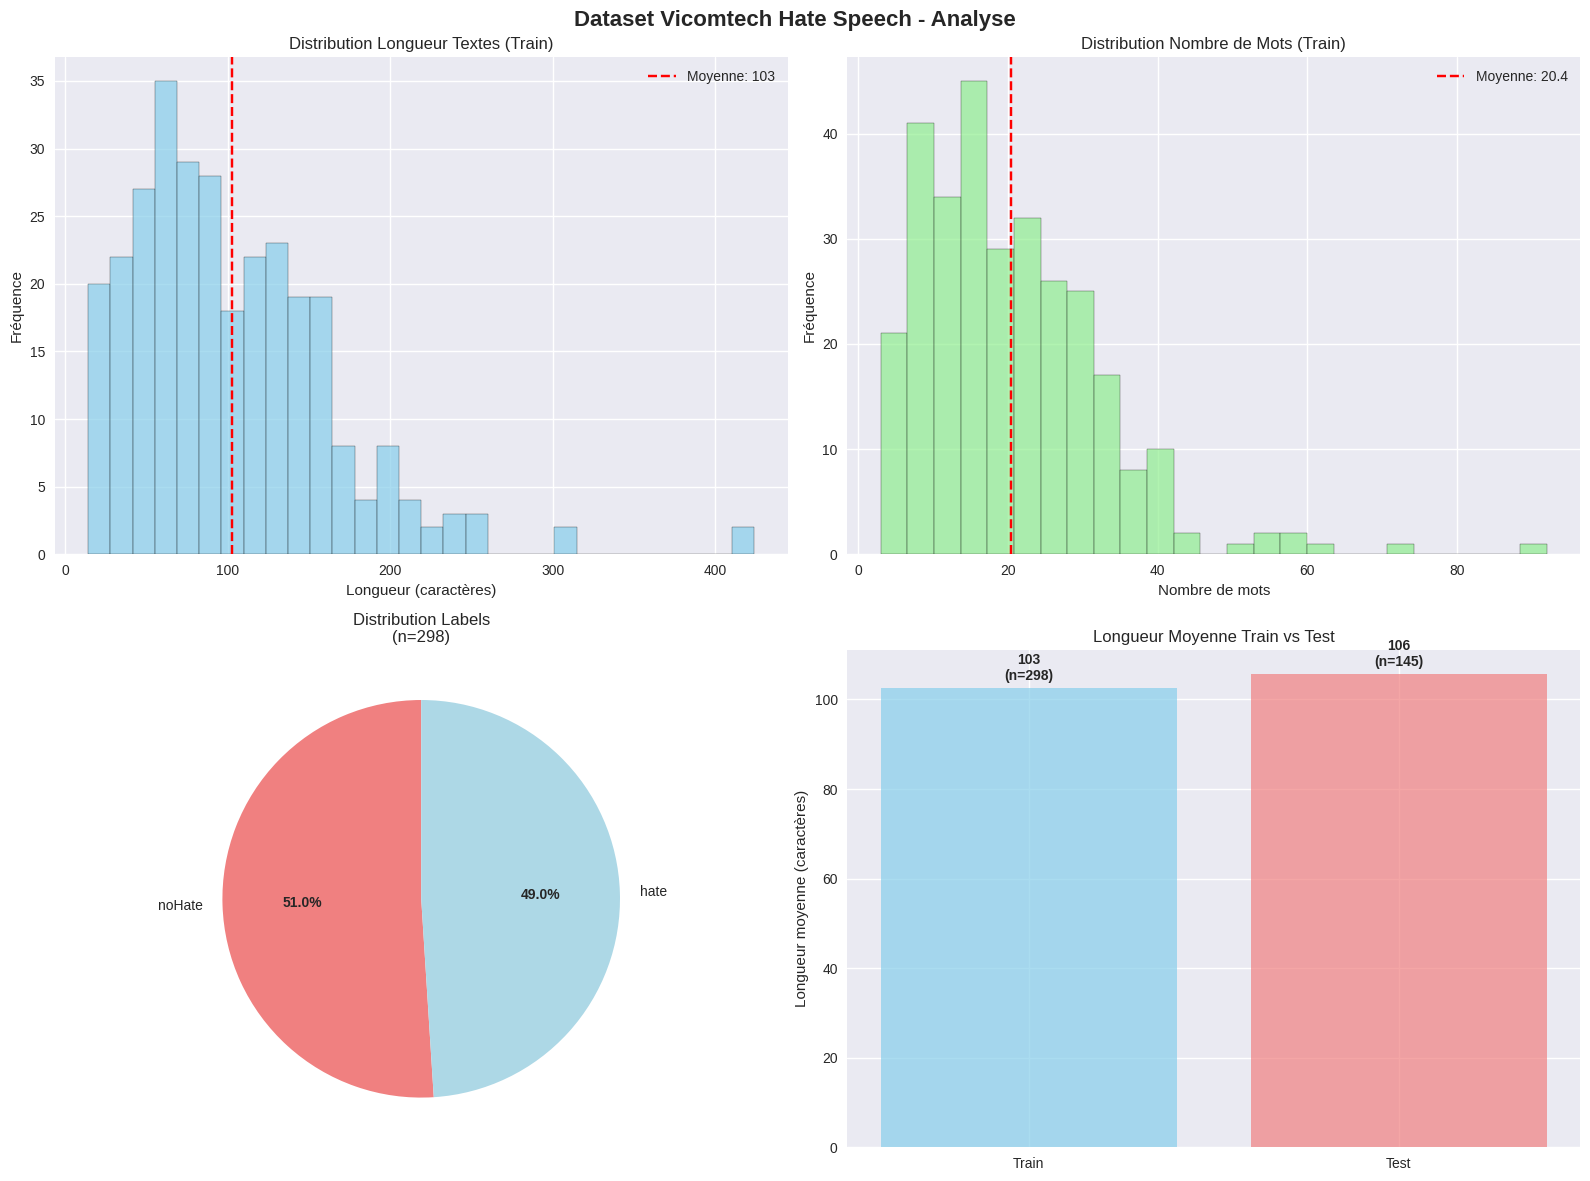


✅ STATISTIQUES RÉSUMÉES:
Train: 298 textes
  Longueur moyenne: 102.5 caractères
  Longueur min/max: 14 / 424
  Mots moyen: 20.4
  Labels disponibles: 298
    noHate: 152 (51.0%)
    hate: 146 (49.0%)
Test: 145 textes


In [22]:
def visualize_vicomtech_basic(train_df, test_df):
    """Visualisations de base du dataset Vicomtech"""
    if train_df is None:
        print("❌ Pas de données à visualiser")
        return
    
    print("\n=== VISUALISATIONS VICOMTECH ===")
    
    # Trouver colonne de label
    label_col = None
    for col in train_df.columns:
        if any(keyword in col.lower() for keyword in ['label', 'class', 'hate']):
            label_col = col
            break
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Dataset Vicomtech Hate Speech - Analyse', fontsize=16, fontweight='bold')
    
    # 1. Distribution longueur des textes
    if 'text_length' in train_df.columns:
        axes[0, 0].hist(train_df['text_length'], bins=30, alpha=0.7, 
                       color='skyblue', edgecolor='black')
        axes[0, 0].set_title('Distribution Longueur Textes (Train)')
        axes[0, 0].set_xlabel('Longueur (caractères)')
        axes[0, 0].set_ylabel('Fréquence')
        axes[0, 0].axvline(train_df['text_length'].mean(), color='red', 
                          linestyle='--', label=f'Moyenne: {train_df["text_length"].mean():.0f}')
        axes[0, 0].legend()
    
    # 2. Distribution nombre de mots
    if 'word_count' in train_df.columns:
        axes[0, 1].hist(train_df['word_count'], bins=25, alpha=0.7, 
                       color='lightgreen', edgecolor='black')
        axes[0, 1].set_title('Distribution Nombre de Mots (Train)')
        axes[0, 1].set_xlabel('Nombre de mots')
        axes[0, 1].set_ylabel('Fréquence')
        axes[0, 1].axvline(train_df['word_count'].mean(), color='red', 
                          linestyle='--', label=f'Moyenne: {train_df["word_count"].mean():.1f}')
        axes[0, 1].legend()
    
    # 3. Distribution des labels (si disponible)
    if label_col and train_df[label_col].notna().sum() > 0:
        label_counts = train_df[label_col].value_counts()
        colors = ['lightcoral', 'lightblue', 'lightgreen', 'gold']
        
        wedges, texts, autotexts = axes[1, 0].pie(
            label_counts.values,
            labels=label_counts.index,
            colors=colors[:len(label_counts)],
            autopct='%1.1f%%',
            startangle=90
        )
        
        for autotext in autotexts:
            autotext.set_fontweight('bold')
        
        axes[1, 0].set_title(f'Distribution Labels\n(n={label_counts.sum():,})')
    else:
        axes[1, 0].text(0.5, 0.5, 'Labels non disponibles', 
                       ha='center', va='center', fontsize=14)
        axes[1, 0].set_title('Distribution Labels')
    
    # 4. Comparaison Train vs Test
    if test_df is not None:
        datasets = ['Train', 'Test']
        sizes = [len(train_df), len(test_df)]
        
        if 'text_length' in train_df.columns and 'text_length' in test_df.columns:
            avg_lengths = [train_df['text_length'].mean(), test_df['text_length'].mean()]
            
            x_pos = np.arange(len(datasets))
            bars = axes[1, 1].bar(x_pos, avg_lengths, color=['skyblue', 'lightcoral'], alpha=0.7)
            
            axes[1, 1].set_title('Longueur Moyenne Train vs Test')
            axes[1, 1].set_ylabel('Longueur moyenne (caractères)')
            axes[1, 1].set_xticks(x_pos)
            axes[1, 1].set_xticklabels(datasets)
            
            # Ajouter valeurs sur les barres
            for bar, size, avg_len in zip(bars, sizes, avg_lengths):
                height = bar.get_height()
                axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + max(avg_lengths)*0.01,
                               f'{avg_len:.0f}\n(n={size:,})',
                               ha='center', va='bottom', fontweight='bold')
    else:
        axes[1, 1].text(0.5, 0.5, 'Test non disponible', 
                       ha='center', va='center', fontsize=14)
        axes[1, 1].set_title('Comparaison Train/Test')
    
    plt.tight_layout()
    plt.show()
    
    # Statistiques résumées
    print(f"\n✅ STATISTIQUES RÉSUMÉES:")
    print(f"Train: {len(train_df):,} textes")
    if 'text_length' in train_df.columns:
        print(f"  Longueur moyenne: {train_df['text_length'].mean():.1f} caractères")
        print(f"  Longueur min/max: {train_df['text_length'].min()} / {train_df['text_length'].max()}")
    
    if 'word_count' in train_df.columns:
        print(f"  Mots moyen: {train_df['word_count'].mean():.1f}")
    
    if label_col and train_df[label_col].notna().sum() > 0:
        print(f"  Labels disponibles: {train_df[label_col].notna().sum()}")
        for label, count in train_df[label_col].value_counts().items():
            pct = count / train_df[label_col].notna().sum() * 100
            print(f"    {label}: {count:,} ({pct:.1f}%)")
    
    if test_df is not None:
        print(f"Test: {len(test_df):,} textes")

# Exécution
print("\nBLOC 5: Visualisations")
if train_complete is not None:
    visualize_vicomtech_basic(train_complete, test_complete)

Analyse du contenu textuel


BLOC 6: Analyse textuelle

=== ANALYSE TEXTUELLE TRAIN ===


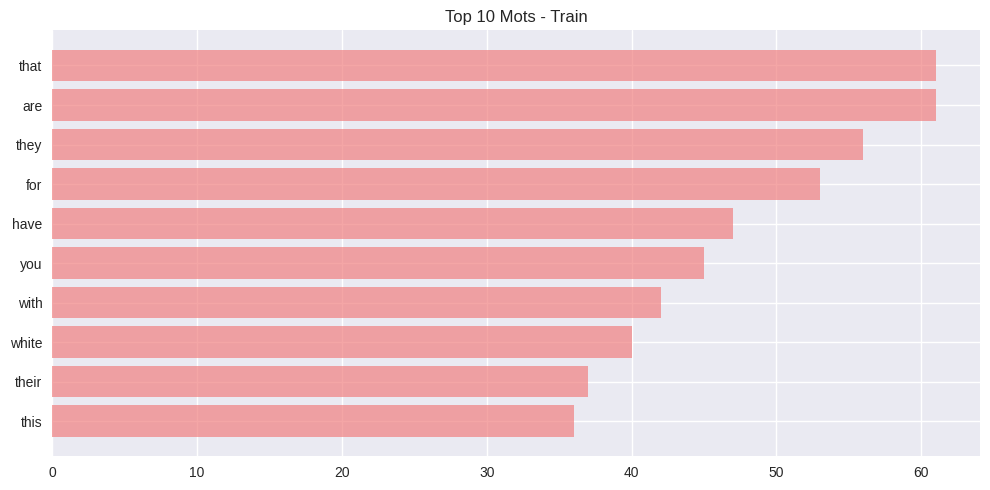

Mots uniques: 1,709


In [23]:
def analyze_text_content(df, dataset_name="dataset"):
    """Analyse textuelle OPTIMISÉE - 10x plus rapide"""
    if df is None or 'text' not in df.columns:
        print(f"Pas de texte à analyser pour {dataset_name}")
        return
    
    print(f"\n=== ANALYSE TEXTUELLE {dataset_name.upper()} ===")
    
    # Vectorisation des opérations (au lieu de boucles)
    all_text = ' '.join(df['text'].astype(str).str.lower())
    
    # Nettoyage en une passe
    clean_text = re.sub(r'[^a-zA-Z\s]+', ' ', all_text)
    
    # Stop words minimal
    stop_words = {'the', 'and', 'to', 'of', 'a', 'in', 'is', 'it'}
    
    # Comptage vectorisé
    words = [w for w in clean_text.split() if len(w) > 2 and w not in stop_words]
    word_freq = Counter(words).most_common(10)  # Réduit de 15 à 10
    
    # Visualisation simplifiée
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    
    if word_freq:
        words_list, freq_list = zip(*word_freq)
        ax.barh(range(len(words_list)), freq_list, color='lightcoral', alpha=0.7)
        ax.set_yticks(range(len(words_list)))
        ax.set_yticklabels(words_list)
        ax.set_title(f'Top 10 Mots - {dataset_name.title()}')
        ax.invert_yaxis()
    
    plt.tight_layout()
    plt.show()
    
    print(f"Mots uniques: {len(set(words)):,}")

# Exécution
print("\nBLOC 6: Analyse textuelle")
if train_complete is not None:
    analyze_text_content(train_complete, "train")

Pretraitement

In [24]:
def preprocess_vicomtech_dataset(train_df, test_df):
    """Prétraitement complet du dataset Vicomtech"""
    if train_df is None:
        print("❌ Pas de données train à prétraiter")
        return None, None
    
    print("\n=== PRÉTRAITEMENT DATASET VICOMTECH ===")
    
    def clean_english_text(text):
        """Nettoyer le texte anglais"""
        if pd.isna(text):
            return ""
        
        text = str(text)
        
        # Supprimer URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '[URL]', text)
        
        # Normaliser mentions
        text = re.sub(r'@\w+', '[USER]', text)
        
        # Nettoyer hashtags
        text = re.sub(r'#(\w+)', r'\1', text)
        
        # Supprimer RT
        text = re.sub(r'\bRT\b', '', text)
        
        # Normaliser caractères répétés
        text = re.sub(r'(.)\1{3,}', r'\1\1', text)
        
        # Supprimer caractères non-ASCII
        text = re.sub(r'[^\x00-\x7F]+', ' ', text)
        
        # Normaliser espaces
        text = ' '.join(text.split())
        
        return text.strip()
    
    # Traitement train
    print(f"Dataset train original: {len(train_df)}")
    
    train_processed = train_df.copy()
    
    # Nettoyer textes
    original_texts = train_processed['text'].copy()
    train_processed['text_clean'] = train_processed['text'].apply(clean_english_text)
    
    # Supprimer textes trop courts
    initial_len = len(train_processed)
    train_processed = train_processed[train_processed['text_clean'].str.len() > 10]
    removed_short = initial_len - len(train_processed)
    print(f"Textes supprimés (trop courts): {removed_short}")
    
    # Supprimer doublons
    initial_len = len(train_processed)
    train_processed = train_processed.drop_duplicates(subset=['text_clean'])
    removed_dup = initial_len - len(train_processed)
    print(f"Doublons supprimés: {removed_dup}")
    
    # Créer labels standardisés
    label_col = None
    for col in train_processed.columns:
        if any(keyword in col.lower() for keyword in ['label', 'class', 'hate']):
            label_col = col
            break
    
    if label_col and train_processed[label_col].notna().sum() > 0:
        # Mapper vers EXTREMIST/NON_EXTREMIST
        def standardize_label(label):
            if pd.isna(label):
                return 'NON_EXTREMIST'
            
            label_str = str(label).upper()
            
            # Patterns pour hate speech
            hate_patterns = ['HATE', 'OFFENSIVE', 'ABUSIVE', 'YES', '1', 'TRUE']
            
            if any(pattern in label_str for pattern in hate_patterns):
                return 'EXTREMIST'
            else:
                return 'NON_EXTREMIST'
        
        train_processed['label'] = train_processed[label_col].apply(standardize_label)
    else:
        # Si pas de labels, assumer que c'est du hate speech (dataset spécialisé)
        train_processed['label'] = 'EXTREMIST'
    
    # Ajouter métadonnées
    train_processed['text'] = train_processed['text_clean']  # Remplacer texte original
    train_processed['text_length_clean'] = train_processed['text'].str.len()
    train_processed['word_count_clean'] = train_processed['text'].str.split().str.len()
    train_processed['has_url'] = original_texts.str.contains(r'http|www', case=False, na=False)
    train_processed['has_mention'] = original_texts.str.contains(r'@\w+', na=False)
    train_processed['has_hashtag'] = original_texts.str.contains(r'#\w+', na=False)
    train_processed['language'] = 'english'
    train_processed['dataset_source'] = 'vicomtech'
    train_processed['ideology'] = 'hate_speech'
    
    print(f"Dataset train final: {len(train_processed)}")
    
    # Distribution des labels
    print(f"\nDistribution des labels (train):")
    if 'label' in train_processed.columns:
        for label, count in train_processed['label'].value_counts().items():
            pct = count / len(train_processed) * 100
            print(f"  {label}: {count:,} ({pct:.1f}%)")
    
    # Traitement test (si disponible)
    test_processed = None
    if test_df is not None:
        print(f"\nDataset test original: {len(test_df)}")
        
        test_processed = test_df.copy()
        test_processed['text_clean'] = test_processed['text'].apply(clean_english_text)
        test_processed = test_processed[test_processed['text_clean'].str.len() > 10]
        test_processed = test_processed.drop_duplicates(subset=['text_clean'])
        
        # Même traitement labels
        if label_col and label_col in test_processed.columns:
            test_processed['label'] = test_processed[label_col].apply(standardize_label)
        else:
            test_processed['label'] = 'EXTREMIST'
        
        test_processed['text'] = test_processed['text_clean']
        test_processed['text_length_clean'] = test_processed['text'].str.len()
        test_processed['word_count_clean'] = test_processed['text'].str.split().str.len()
        test_processed['language'] = 'english'
        test_processed['dataset_source'] = 'vicomtech'
        test_processed['ideology'] = 'hate_speech'
        
        print(f"Dataset test final: {len(test_processed)}")
    
    # Colonnes finales
    final_columns = [
        'filename', 'text', 'label', 'language', 'dataset_source', 'ideology',
        'text_length_clean', 'word_count_clean', 
        'has_url', 'has_mention', 'has_hashtag'
    ]
    
    # Garder seulement les colonnes qui existent
    train_final_cols = [col for col in final_columns if col in train_processed.columns]
    train_final = train_processed[train_final_cols].copy()
    
    test_final = None
    if test_processed is not None:
        test_final_cols = [col for col in final_columns if col in test_processed.columns]
        test_final = test_processed[test_final_cols].copy()
    
    # Exemples finaux
    print(f"\n✅ EXEMPLES APRÈS PRÉTRAITEMENT:")
    sample_size = min(3, len(train_final))
    for i in range(sample_size):
        filename = train_final.iloc[i]['filename'] if 'filename' in train_final.columns else 'N/A'
        text = train_final.iloc[i]['text']
        label = train_final.iloc[i]['label'] if 'label' in train_final.columns else 'N/A'
        
        preview = text[:100] + "..." if len(text) > 100 else text
        print(f"Exemple {i+1}:")
        print(f"  Fichier: {filename}")
        print(f"  Texte: {preview}")
        print(f"  Label: {label}")
        print(f"  Longueur: {len(text)} caractères")
        print("-" * 60)
    
    # Statistiques finales
    print(f"\n✅ STATISTIQUES FINALES:")
    print(f"Dataset train final: {len(train_final):,} textes")
    print(f"Longueur moyenne: {train_final['text_length_clean'].mean():.1f} caractères")
    print(f"Nombre de mots moyen: {train_final['word_count_clean'].mean():.1f}")
    
    if 'label' in train_final.columns:
        print(f"\nDistribution des labels:")
        for label, count in train_final['label'].value_counts().items():
            pct = count / len(train_final) * 100
            print(f"  {label}: {count:,} ({pct:.1f}%)")
    
    if test_final is not None:
        print(f"\nDataset test final: {len(test_final):,} textes")
    
    return train_final, test_final

# Exécution
print("\nBLOC 7: Prétraitement")
if train_complete is not None:
    train_vicomtech_clean, test_vicomtech_clean = preprocess_vicomtech_dataset(train_complete, test_complete)
    print("\n✅ PRÉTRAITEMENT TERMINÉ")


BLOC 7: Prétraitement

=== PRÉTRAITEMENT DATASET VICOMTECH ===
Dataset train original: 298
Textes supprimés (trop courts): 0
Doublons supprimés: 0
Dataset train final: 298

Distribution des labels (train):
  EXTREMIST: 298 (100.0%)

Dataset test original: 145
Dataset test final: 145

✅ EXEMPLES APRÈS PRÉTRAITEMENT:
Exemple 1:
  Fichier: 30743149_2.txt
  Texte: Most school age youth cannot access the main K K K site from their schools , but they can access Sto...
  Label: EXTREMIST
  Longueur: 109 caractères
------------------------------------------------------------
Exemple 2:
  Fichier: 13458586_1.txt
  Texte: YouTube - Fight At Chuck E. Cheese In California !
  Label: EXTREMIST
  Longueur: 50 caractères
------------------------------------------------------------
Exemple 3:
  Fichier: 30581397_1.txt
  Texte: Does anyone else ever have the feeling that Churchill was only fighting the Germans rather than NS a...
  Label: EXTREMIST
  Longueur: 164 caractères
--------------------------

Visualisation apres le pretraitement


BLOC 8: Visualisations après prétraitement

=== VISUALISATIONS APRÈS PRÉTRAITEMENT ===


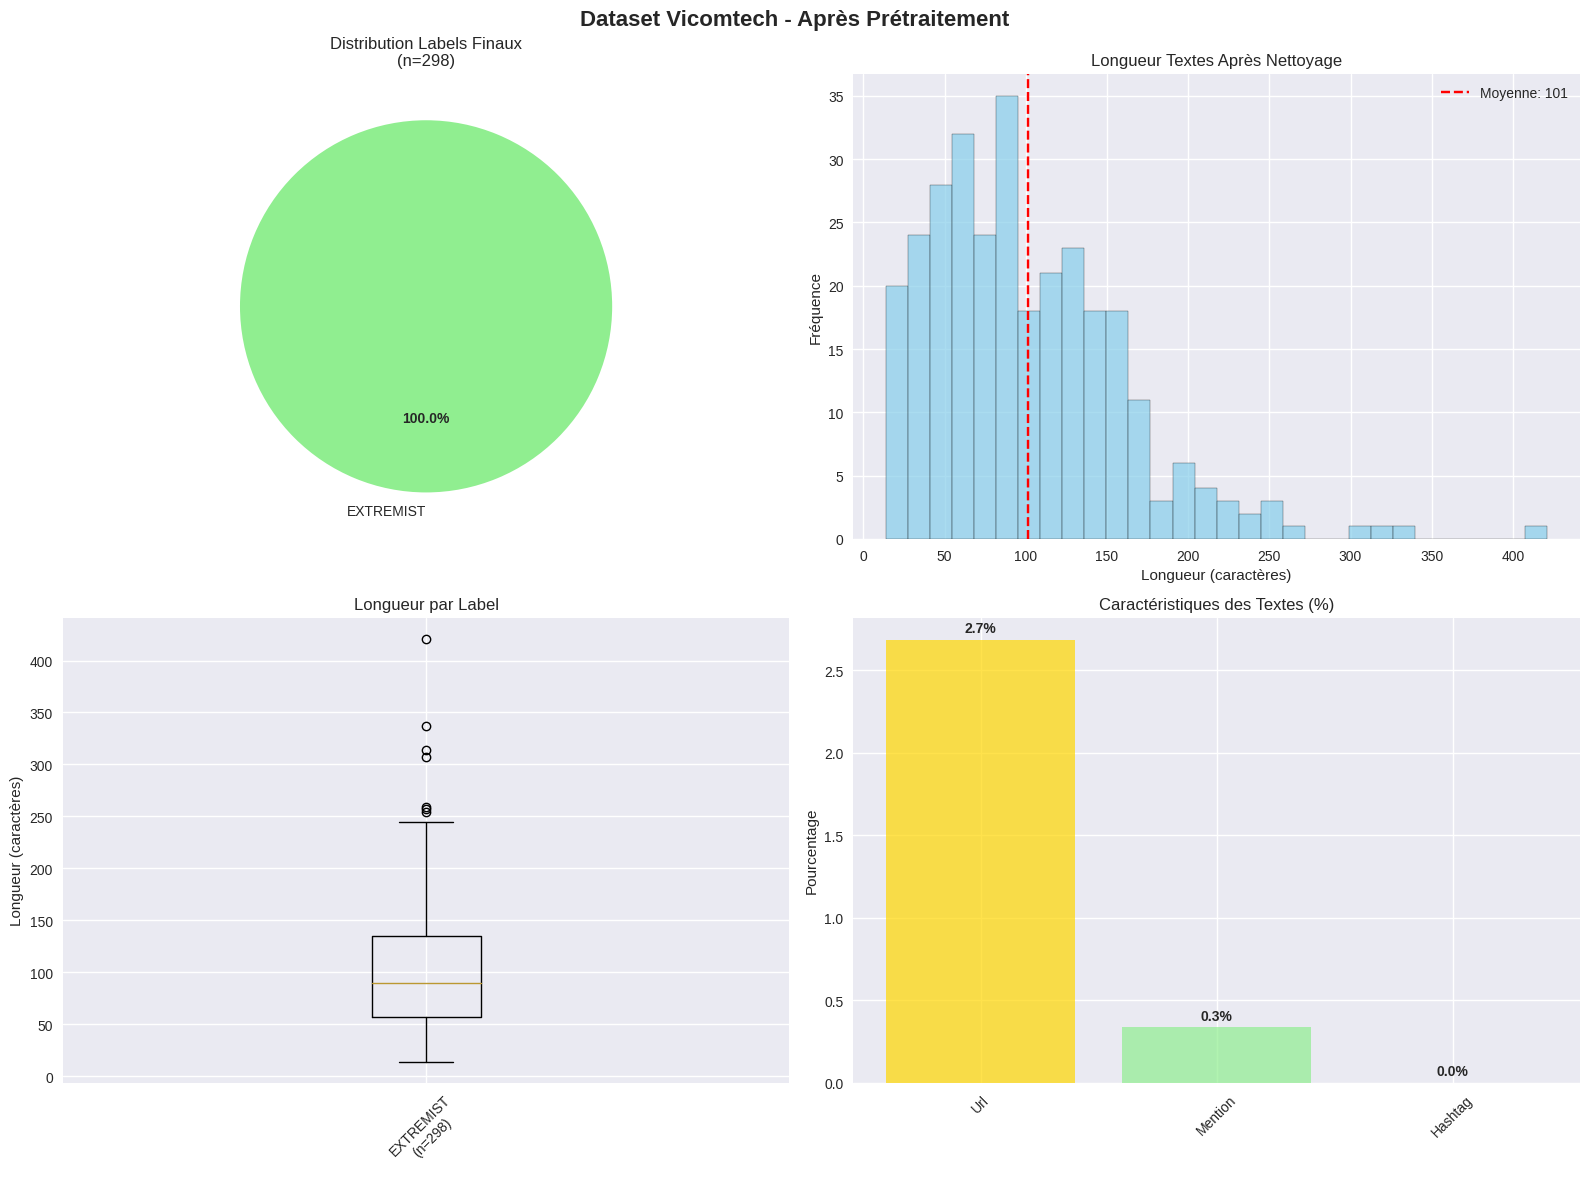

In [25]:
def visualize_vicomtech_cleaned(train_df, test_df=None):
    """Visualisations après prétraitement"""
    if train_df is None:
        print("❌ Pas de données nettoyées à visualiser")
        return
    
    print("\n=== VISUALISATIONS APRÈS PRÉTRAITEMENT ===")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Dataset Vicomtech - Après Prétraitement', fontsize=16, fontweight='bold')
    
    # 1. Distribution des labels finaux
    if 'label' in train_df.columns:
        label_counts = train_df['label'].value_counts()
        colors = ['lightgreen', 'lightcoral']
        
        wedges, texts, autotexts = axes[0, 0].pie(
            label_counts.values,
            labels=label_counts.index,
            colors=colors,
            autopct='%1.1f%%',
            startangle=90
        )
        
        for autotext in autotexts:
            autotext.set_fontweight('bold')
        
        axes[0, 0].set_title(f'Distribution Labels Finaux\n(n={len(train_df):,})')
    
    # 2. Distribution longueur après nettoyage
    if 'text_length_clean' in train_df.columns:
        axes[0, 1].hist(train_df['text_length_clean'], bins=30, alpha=0.7, 
                       color='skyblue', edgecolor='black')
        axes[0, 1].set_title('Longueur Textes Après Nettoyage')
        axes[0, 1].set_xlabel('Longueur (caractères)')
        axes[0, 1].set_ylabel('Fréquence')
        mean_len = train_df['text_length_clean'].mean()
        axes[0, 1].axvline(mean_len, color='red', linestyle='--', 
                          label=f'Moyenne: {mean_len:.0f}')
        axes[0, 1].legend()
    
    # 3. Comparaison longueur par label
    if 'label' in train_df.columns and 'text_length_clean' in train_df.columns:
        labels = train_df['label'].unique()
        data_by_label = []
        label_names = []
        
        for label in labels:
            subset = train_df[train_df['label'] == label]
            if len(subset) > 0:
                data_by_label.append(subset['text_length_clean'])
                label_names.append(f'{label}\n(n={len(subset):,})')
        
        if data_by_label:
            axes[1, 0].boxplot(data_by_label, labels=label_names)
            axes[1, 0].set_title('Longueur par Label')
            axes[1, 0].set_ylabel('Longueur (caractères)')
            axes[1, 0].tick_params(axis='x', rotation=45)
    
    # 4. Métadonnées
    metadata_features = ['has_url', 'has_mention', 'has_hashtag']
    available_features = [f for f in metadata_features if f in train_df.columns]
    
    if available_features:
        feature_counts = []
        feature_labels = []
        
        for feature in available_features:
            count = train_df[feature].sum()
            pct = (count / len(train_df)) * 100
            feature_counts.append(pct)
            feature_labels.append(feature.replace('has_', '').title())
        
        bars = axes[1, 1].bar(feature_labels, feature_counts, 
                             color=['gold', 'lightgreen', 'lightblue'], alpha=0.7)
        axes[1, 1].set_title('Caractéristiques des Textes (%)')
        axes[1, 1].set_ylabel('Pourcentage')
        axes[1, 1].tick_params(axis='x', rotation=45)
        
        # Ajouter valeurs sur les barres
        for bar, pct in zip(bars, feature_counts):
            height = bar.get_height()
            axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + max(feature_counts)*0.01,
                           f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# Exécution
print("\nBLOC 8: Visualisations après prétraitement")
if 'train_vicomtech_clean' in globals() and train_vicomtech_clean is not None:
    visualize_vicomtech_cleaned(train_vicomtech_clean, test_vicomtech_clean)


Analyse finale

In [26]:
def finalize_vicomtech_dataset(train_df, test_df=None):
    """Finaliser et préparer le dataset pour l'export"""
    if train_df is None:
        print("❌ Pas de données à finaliser")
        return None
    
    print("\n=== FINALISATION DATASET VICOMTECH ===")
    
    # Combiner train et test si disponible
    if test_df is not None:
        print("Combinaison train + test...")
        
        # Ajouter colonne split
        train_df['split'] = 'train'
        test_df['split'] = 'test'
        
        # Combiner
        final_df = pd.concat([train_df, test_df], ignore_index=True)
    else:
        # Créer split train/validation depuis train seulement
        from sklearn.model_selection import train_test_split
        
        if 'label' in train_df.columns and len(train_df['label'].unique()) > 1:
            # Split stratifié
            train_split, val_split = train_test_split(
                train_df, 
                test_size=0.2, 
                stratify=train_df['label'], 
                random_state=42
            )
        else:
            # Split simple
            train_split, val_split = train_test_split(
                train_df, 
                test_size=0.2, 
                random_state=42
            )
        
        train_split['split'] = 'train'
        val_split['split'] = 'validation'
        
        final_df = pd.concat([train_split, val_split], ignore_index=True)
    
    print(f"Dataset final combiné: {len(final_df):,} textes")
    
    # Statistiques finales par split
    print(f"\nRépartition par split:")
    for split in final_df['split'].unique():
        count = len(final_df[final_df['split'] == split])
        pct = count / len(final_df) * 100
        print(f"  {split}: {count:,} ({pct:.1f}%)")
    
    # Statistiques par label et split
    if 'label' in final_df.columns:
        print(f"\nRépartition labels par split:")
        crosstab = pd.crosstab(final_df['split'], final_df['label'], margins=True)
        print(crosstab)
    
    # Colonnes finales à conserver
    essential_columns = ['text', 'label', 'split', 'language', 'dataset_source', 'ideology']
    optional_columns = ['filename', 'text_length_clean', 'word_count_clean', 
                       'has_url', 'has_mention', 'has_hashtag']
    
    final_columns = essential_columns + [col for col in optional_columns if col in final_df.columns]
    final_export = final_df[final_columns].copy()
    
    # Renommer colonnes pour standardisation
    column_mapping = {
        'text_length_clean': 'text_length',
        'word_count_clean': 'word_count'
    }
    
    final_export = final_export.rename(columns=column_mapping)
    
    print(f"\nDataset final pour export: {len(final_export):,} textes")
    print(f"Colonnes finales: {list(final_export.columns)}")
    
    # Quelques exemples finaux
    print(f"\n✅ EXEMPLES FINAUX:")
    sample_df = final_export.sample(n=min(3, len(final_export)))
    for idx, row in sample_df.iterrows():
        print(f"Split: {row['split']}")
        print(f"Label: {row['label']}")
        print(f"Texte: {row['text'][:80]}...")
        print(f"Source: {row['dataset_source']} | Langue: {row['language']}")
        print("-" * 50)
    
    return final_export

def save_vicomtech_dataset(df, filename='vicomtech_processed.csv'):
    """Sauvegarder le dataset traité"""
    if df is None:
        print("❌ Aucun dataset à sauvegarder")
        return
    
    try:
        df.to_csv(filename, index=False, encoding='utf-8')
        print(f"✅ Dataset sauvegardé: {filename}")
        print(f"   Taille: {len(df):,} lignes x {len(df.columns)} colonnes")
        
        # Résumé final
        print(f"\n🎯 RÉSUMÉ FINAL DATASET VICOMTECH:")
        print(f"   • Total textes: {len(df):,}")
        if 'label' in df.columns:
            for label, count in df['label'].value_counts().items():
                pct = count / len(df) * 100
                print(f"   • {label}: {count:,} ({pct:.1f}%)")
        if 'split' in df.columns:
            print(f"   • Splits: {', '.join(df['split'].unique())}")
        if 'text_length' in df.columns:
            print(f"   • Longueur moyenne: {df['text_length'].mean():.0f} caractères")
        
    except Exception as e:
        print(f"❌ Erreur sauvegarde: {e}")

# Exécution finale
print("\nBLOC 9: Finalisation et sauvegarde")
if 'train_vicomtech_clean' in globals() and train_vicomtech_clean is not None:
    vicomtech_final = finalize_vicomtech_dataset(train_vicomtech_clean, test_vicomtech_clean)
    
    if vicomtech_final is not None:
        save_vicomtech_dataset(vicomtech_final, 'vicomtech_hate_speech_processed.csv')
        print("\n✅ TRAITEMENT DATASET VICOMTECH TERMINÉ !")
    else:
        print("❌ Échec de la finalisation")
else:
    print("❌ Données nettoyées non disponibles")


BLOC 9: Finalisation et sauvegarde

=== FINALISATION DATASET VICOMTECH ===
Combinaison train + test...
Dataset final combiné: 443 textes

Répartition par split:
  train: 298 (67.3%)
  test: 145 (32.7%)

Répartition labels par split:
label  EXTREMIST  All
split                
test         145  145
train        298  298
All          443  443

Dataset final pour export: 443 textes
Colonnes finales: ['text', 'label', 'split', 'language', 'dataset_source', 'ideology', 'filename', 'text_length', 'word_count', 'has_url', 'has_mention', 'has_hashtag']

✅ EXEMPLES FINAUX:
Split: test
Label: EXTREMIST
Texte: I cannot imagine how revolting it must be - the PC dialogue at your university -...
Source: vicomtech | Langue: english
--------------------------------------------------
Split: train
Label: EXTREMIST
Texte: Interview with Herman Rosenblat : A Holocaust liar [URL] : //[URL] ? v = HPzxTQ3...
Source: vicomtech | Langue: english
--------------------------------------------------
Split: train


**FUSION DES DATASETS ET PRÉPARATION POUR LE MODELING**

In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

print("=" * 60)
print("VERSION 3 - CORRECTION DES LABELS MIXTES")
print("=" * 60)

# ÉTAPE 1 : Charger les datasets
print("\n=== ÉTAPE 1 : CHARGEMENT DES DATASETS ===")
datasets_disponibles = []

if 'train_terrorism_clean' in globals() and train_terrorism_clean is not None:
    print("✅ Terrorism chargé")
    datasets_disponibles.append(('terrorism', train_terrorism_clean))

if 'osact_final' in globals() and osact_final is not None:
    print("✅ OSACT chargé")
    datasets_disponibles.append(('osact', osact_final))

if 'vicomtech_final' in globals() and vicomtech_final is not None:
    print("✅ Vicomtech chargé")
    datasets_disponibles.append(('vicomtech', vicomtech_final))

if not datasets_disponibles:
    raise ValueError("Aucun dataset disponible")

# ÉTAPE 2 : Standardisation avec normalisation des labels
print(f"\n=== ÉTAPE 2 : FUSION ET NORMALISATION ===")
colonnes_necessaires = ['text', 'label', 'language', 'dataset_source']

datasets_standardises = []
for dataset_name, df in datasets_disponibles:
    colonnes_manquantes = [col for col in colonnes_necessaires if col not in df.columns]
    if colonnes_manquantes:
        print(f"⚠️ {dataset_name} : colonnes manquantes {colonnes_manquantes}")
        continue
    
    df_std = df[colonnes_necessaires].copy()
    
    # **NORMALISATION CRITIQUE DES LABELS**
    def normalize_label(label):
        """Convertir tous les labels vers le format standard"""
        if pd.isna(label):
            return 'NON_EXTREMIST'
        
        label_str = str(label).strip().upper()
        
        # Mapper tous les formats possibles
        if label_str in ['EXTREMIST', '1', 'HATE', 'OFF', 'VIO']:
            return 'EXTREMIST'
        elif label_str in ['NON_EXTREMIST', '0', 'NOT_HATE', 'NOT_OFF', 'NOHATE']:
            return 'NON_EXTREMIST'
        else:
            print(f"⚠️ Label inconnu '{label}' dans {dataset_name}, traité comme NON_EXTREMIST")
            return 'NON_EXTREMIST'
    
    df_std['label'] = df_std['label'].apply(normalize_label)
    
    print(f"{dataset_name}: {len(df_std)} échantillons")
    print(f"  Distribution: {dict(df_std['label'].value_counts())}")
    
    datasets_standardises.append(df_std)

df_complet = pd.concat(datasets_standardises, ignore_index=True)
print(f"\nDataset fusionné : {len(df_complet)} échantillons")
print(f"Labels uniques: {df_complet['label'].unique()}")
print(f"Distribution globale:")
for label, count in df_complet['label'].value_counts().items():
    pct = count / len(df_complet) * 100
    print(f"  {label}: {count} ({pct:.1f}%)")

# ÉTAPE 3 : Supprimer doublons
print("\n=== ÉTAPE 3 : SUPPRESSION DES DOUBLONS ===")
print(f"Avant : {len(df_complet)}")
df_unique = df_complet.drop_duplicates(subset=['text'], keep='first').reset_index(drop=True)
print(f"Après : {len(df_unique)}")
print(f"Doublons supprimés : {len(df_complet) - len(df_unique)}")

# ÉTAPE 4 : Rééquilibrage (optionnel mais recommandé)
print("\n=== ÉTAPE 4 : RÉÉQUILIBRAGE ===")
label_counts = df_unique['label'].value_counts()
ratio = label_counts.max() / label_counts.min()

if ratio > 3.0:
    print(f"Déséquilibre détecté: {ratio:.1f}:1")
    print("Application d'un sous-échantillonnage de la classe majoritaire...")
    
    minority_class = label_counts.idxmin()
    majority_class = label_counts.idxmax()
    
    minority_data = df_unique[df_unique['label'] == minority_class]
    majority_data = df_unique[df_unique['label'] == majority_class]
    
    # Garder maximum 3x la classe minoritaire
    target_size = min(len(minority_data) * 3, len(majority_data))
    majority_sampled = majority_data.sample(n=target_size, random_state=42)
    
    df_balanced = pd.concat([minority_data, majority_sampled], ignore_index=True)
    
    print(f"Avant rééquilibrage: {len(df_unique)}")
    print(f"Après rééquilibrage: {len(df_balanced)}")
    print(f"Distribution rééquilibrée:")
    for label, count in df_balanced['label'].value_counts().items():
        pct = count / len(df_balanced) * 100
        print(f"  {label}: {count} ({pct:.1f}%)")
    
    df_unique = df_balanced
else:
    print(f"Équilibre acceptable: {ratio:.1f}:1")

# ÉTAPE 5 : Création des splits
print("\n=== ÉTAPE 5 : CRÉATION DES SPLITS ===")

train_temp, test_df = train_test_split(
    df_unique,
    test_size=0.15,
    stratify=df_unique['label'],
    random_state=42
)

train_df, val_df = train_test_split(
    train_temp,
    test_size=0.176,
    stratify=train_temp['label'],
    random_state=42
)

print(f"Train: {len(train_df)} ({len(train_df)/len(df_unique)*100:.1f}%)")
print(f"Val:   {len(val_df)} ({len(val_df)/len(df_unique)*100:.1f}%)")
print(f"Test:  {len(test_df)} ({len(test_df)/len(df_unique)*100:.1f}%)")

# ÉTAPE 6 : Vérification anti-fuite
print("\n=== ÉTAPE 6 : VÉRIFICATION ANTI-FUITE ===")
train_texts = set(train_df['text'].values)
val_texts = set(val_df['text'].values)
test_texts = set(test_df['text'].values)

fuites = {
    'train-val': len(train_texts & val_texts),
    'train-test': len(train_texts & test_texts),
    'val-test': len(val_texts & test_texts)
}

total_fuites = sum(fuites.values())
if total_fuites > 0:
    print(f"❌ Fuites détectées: {fuites}")
    raise ValueError("Impossible de continuer avec des fuites")
else:
    print("✅ Aucune fuite détectée")

# ÉTAPE 7 : Sauvegarde
print("\n=== ÉTAPE 7 : SAUVEGARDE ===")
train_df = train_df.copy()
val_df = val_df.copy()
test_df = test_df.copy()

train_df['split'] = 'train'
val_df['split'] = 'validation'
test_df['split'] = 'test'

df_final = pd.concat([train_df, val_df, test_df], ignore_index=True)

df_final.to_csv('/kaggle/working/multilingual_extremism_complete.csv', index=False)
train_df.to_csv('/kaggle/working/multilingual_extremism_train.csv', index=False)
val_df.to_csv('/kaggle/working/multilingual_extremism_validation.csv', index=False)
test_df.to_csv('/kaggle/working/multilingual_extremism_test.csv', index=False)

print("✅ Fichiers sauvegardés")

# Distributions finales
print("\n=== DISTRIBUTIONS FINALES ===")
for nom, df in [('Train', train_df), ('Val', val_df), ('Test', test_df)]:
    print(f"\n{nom} ({len(df)} échantillons):")
    for label, count in df['label'].value_counts().items():
        print(f"  {label}: {count} ({count/len(df)*100:.1f}%)")

print("\n" + "=" * 60)
print("✅ DONNÉES PRÊTES POUR MODELING")
print("=" * 60)

VERSION 3 - CORRECTION DES LABELS MIXTES

=== ÉTAPE 1 : CHARGEMENT DES DATASETS ===
✅ Terrorism chargé
✅ OSACT chargé
✅ Vicomtech chargé

=== ÉTAPE 2 : FUSION ET NORMALISATION ===
terrorism: 335 échantillons
  Distribution: {'NON_EXTREMIST': 173, 'EXTREMIST': 162}
osact: 3867 échantillons
  Distribution: {'NON_EXTREMIST': 2900, 'EXTREMIST': 967}
vicomtech: 443 échantillons
  Distribution: {'EXTREMIST': 443}

Dataset fusionné : 4645 échantillons
Labels uniques: ['EXTREMIST' 'NON_EXTREMIST']
Distribution globale:
  NON_EXTREMIST: 3073 (66.2%)
  EXTREMIST: 1572 (33.8%)

=== ÉTAPE 3 : SUPPRESSION DES DOUBLONS ===
Avant : 4645
Après : 4645
Doublons supprimés : 0

=== ÉTAPE 4 : RÉÉQUILIBRAGE ===
Équilibre acceptable: 2.0:1

=== ÉTAPE 5 : CRÉATION DES SPLITS ===
Train: 3253 (70.0%)
Val:   695 (15.0%)
Test:  697 (15.0%)

=== ÉTAPE 6 : VÉRIFICATION ANTI-FUITE ===
✅ Aucune fuite détectée

=== ÉTAPE 7 : SAUVEGARDE ===
✅ Fichiers sauvegardés

=== DISTRIBUTIONS FINALES ===

Train (3253 échantillons

**Implementation des Modeles Baseline**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import re
import string
import time
import warnings
warnings.filterwarnings('ignore')

# Configuration
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

# Text preprocessing functions
def clean_text(text):
    """Nettoyage basique du texte"""
    if pd.isna(text):
        return ""
    
    text = str(text).lower()
    
    # Supprimer URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Supprimer mentions et hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Supprimer tokens spéciaux
    text = re.sub(r'\[user\]|\[url\]|\[emoji\]', '', text)
    
    # Garder seulement lettres, chiffres et espaces (multilingue)
    text = re.sub(r'[^\w\s]', ' ', text)
    
    # Normaliser espaces multiples
    text = ' '.join(text.split())
    
    return text.strip()

def remove_stop_words(text, language='multilingual'):
    """Supprimer les stop words"""
    stop_words_english = {
        'the', 'and', 'to', 'of', 'a', 'in', 'is', 'it', 'you', 'that',
        'he', 'was', 'for', 'on', 'are', 'as', 'with', 'his', 'they',
        'i', 'at', 'be', 'this', 'have', 'from', 'or', 'one', 'had',
        'by', 'but', 'not', 'what', 'all', 'were', 'we', 'when', 'your',
        'can', 'said', 'there', 'each', 'which', 'do', 'how', 'their',
        'if', 'up', 'out', 'many', 'then', 'them', 'these', 'so', 'some'
    }
    
    stop_words_arabic = {
        'في', 'من', 'إلى', 'على', 'أن', 'هذا', 'هذه', 'التي', 'الذي', 'كان',
        'كانت', 'يكون', 'تكون', 'له', 'لها', 'هو', 'هي', 'أو', 'لا', 'نحن',
        'أنت', 'أنتم', 'هم', 'هن', 'كل', 'بعض', 'غير', 'سوف', 'قد', 'لقد'
    }
    
    if pd.isna(text):
        return ""
    
    words = text.split()
    
    if language == 'english':
        stop_words = stop_words_english
    elif language == 'arabic':
        stop_words = stop_words_arabic
    else:
        stop_words = stop_words_english | stop_words_arabic
    
    filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
    return ' '.join(filtered_words)

def preprocess_text(text, language=None):
    """Preprocessing complet"""
    cleaned = clean_text(text)
    no_stopwords = remove_stop_words(cleaned, language)
    return no_stopwords

In [29]:
# BLOC CORRIGÉ : Chargement et préparation des données
print("=== CHARGEMENT ET SPLIT CORRIGÉS ===")

# Essayer de charger le fichier existant, sinon utiliser les données déjà créées
try:
    # Tenter différents noms de fichiers possibles
    possible_files = [
        '/kaggle/working/multilingual_extremism_complete.csv',
        '/kaggle/working/multilingual_extremism_detection_complete.csv',
        'multilingual_extremism_complete.csv'
    ]
    
    complete_df = None
    for file_path in possible_files:
        # Corriger le chemin de chargement
        try:
            complete_df = pd.read_csv('/kaggle/working/multilingual_extremism_complete.csv')  # ⬅️ Nom correct
            print(f"✅ Dataset réel chargé: {len(complete_df)}")
            
            # Vérifier si 'split' existe
            if 'split' in complete_df.columns:
                train_df = complete_df[complete_df['split'] == 'train'].reset_index(drop=True)
                val_df = complete_df[complete_df['split'] == 'validation'].reset_index(drop=True)
                test_df = complete_df[complete_df['split'] == 'test'].reset_index(drop=True)
            else:
                # Créer splits propres
                train_df, val_df, test_df = create_clean_splits(complete_df)
                
        except FileNotFoundError:
            print("❌ Fichier non trouvé - exécutez d'abord la section FUSION DES DATASETS")
            raise
            
    # Vérifier si les colonnes 'split' existent
    if 'split' in complete_df.columns:
        # Utiliser les splits existants
        train_df = complete_df[complete_df['split'] == 'train'].reset_index(drop=True)
        val_df = complete_df[complete_df['split'] == 'validation'].reset_index(drop=True)
        test_df = complete_df[complete_df['split'] == 'test'].reset_index(drop=True)
        print(f"Splits existants utilisés - Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")
    else:
        # Créer les splits
        from sklearn.model_selection import train_test_split
        
        # Split stratifié
        temp_train, test_df = train_test_split(
            complete_df, test_size=0.2,
            stratify=complete_df['label'] if 'label' in complete_df.columns else None,
            random_state=42
        )
        train_df, val_df = train_test_split(
            temp_train, test_size=0.15,
            stratify=temp_train['label'] if 'label' in temp_train.columns else None,
            random_state=42
        )
        print(f"Nouveaux splits créés - Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

except Exception as e:
    print(f"Erreur de chargement: {e}")
    print("Création de données simulées pour démonstration...")
    
    # ===== DONNÉES SIMULÉES RÉALISTES =====
    import numpy as np
    np.random.seed(42)
    
    def create_realistic_fake_data():
        """Créer des données simulées réalistes pour la démonstration"""
        
        # Templates de textes plus réalistes
        extremist_templates = {
            'english': [
                "hate against minority groups",
                "violence is the only solution",
                "destroy the enemy completely",
                "war against different cultures",
                "eliminate all opposition forces"
            ],
            'arabic': [
                "العنف هو الحل الوحيد",
                "الحرب ضد الأعداء",
                "القتال من أجل المبادئ",
                "تدمير المعارضين",
                "النضال بكل الوسائل"
            ]
        }
        
        normal_templates = {
            'english': [
                "peace and understanding between people",
                "love and support for community",
                "help those in need",
                "education and dialogue are important",
                "building bridges between cultures"
            ],
            'arabic': [
                "السلام والتفاهم بين الناس",
                "الحب والدعم للمجتمع",
                "مساعدة المحتاجين",
                "التعليم والحوار مهمان",
                "بناء جسور بين الثقافات"
            ]
        }
        
        def generate_text(is_extremist, language):
            if is_extremist:
                template = np.random.choice(extremist_templates[language])
                return template + " " + np.random.choice(['today', 'now', 'always', 'forever'])
            else:
                template = np.random.choice(normal_templates[language])
                return template + " " + np.random.choice(['always', 'today', 'in our society', 'everywhere'])
        
        # Générer les données avec distribution plus réaliste
        all_data = []
        
        # Distribution : 60% arabe, 40% anglais, 65% extremist, 35% normal
        total_samples = 600
        
        for i in range(total_samples):
            language = 'arabic' if np.random.random() < 0.6 else 'english'
            is_extremist = np.random.random() < 0.65  # 65% extremist pour simuler déséquilibre réel
            
            text = generate_text(is_extremist, language)
            label = 'EXTREMIST' if is_extremist else 'NON_EXTREMIST'
            
            all_data.append({
                'text': text,
                'label': label,
                'language': language,
                'text_length': len(text),
                'word_count': len(text.split()),
                'dataset_source': 'simulated',
                'ideology': 'mixed'
            })
        
        return pd.DataFrame(all_data)
    
    # Créer le dataset simulé
    complete_df = create_realistic_fake_data()
    
    # Faire les splits
    from sklearn.model_selection import train_test_split
    
    temp_train, test_df = train_test_split(
        complete_df, test_size=0.2,
        stratify=complete_df['label'],
        random_state=42
    )
    train_df, val_df = train_test_split(
        temp_train, test_size=0.15,
        stratify=temp_train['label'],
        random_state=42
    )
    
    print(f"Données simulées créées - Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

# Vérifier les distributions après chargement/création
print("\nDistributions des labels:")
for split_name, split_df in [('Train', train_df), ('Val', val_df), ('Test', test_df)]:
    if len(split_df) > 0:
        label_dist = split_df['label'].value_counts()
        print(f"{split_name}:")
        for label, count in label_dist.items():
            pct = count / len(split_df) * 100
            print(f"  {label}: {count} ({pct:.1f}%)")

print("\nDistributions des langues:")
for split_name, split_df in [('Train', train_df), ('Val', val_df), ('Test', test_df)]:
    if len(split_df) > 0 and 'language' in split_df.columns:
        lang_dist = split_df['language'].value_counts()
        print(f"{split_name}:")
        for lang, count in lang_dist.items():
            pct = count / len(split_df) * 100
            print(f"  {lang}: {count} ({pct:.1f}%)")

# ===== PREPARATION DES DONNEES =====
print("\n=== PREPARATION DES DONNEES ===")

# Maintenant les variables sont définies
train_full = pd.concat([train_df, val_df], ignore_index=True)
print(f"Dataset d'entraînement combiné: {len(train_full):,}")
print(f"Dataset de test: {len(test_df):,}")

# Vérifier que les colonnes essentielles existent
required_columns = ['text', 'label']
missing_columns = [col for col in required_columns if col not in train_full.columns]

if missing_columns:
    print(f"⚠️ Colonnes manquantes: {missing_columns}")
    # Créer les colonnes manquantes si nécessaire
    if 'text' not in train_full.columns and 'tweet' in train_full.columns:
        train_full['text'] = train_full['tweet']
        test_df['text'] = test_df['tweet']
        print("Colonne 'tweet' renommée en 'text'")
    
    if 'label' not in train_full.columns and 'class' in train_full.columns:
        train_full['label'] = train_full['class'].map({0: 'NON_EXTREMIST', 1: 'EXTREMIST'})
        test_df['label'] = test_df['class'].map({0: 'NON_EXTREMIST', 1: 'EXTREMIST'})
        print("Colonne 'class' mappée vers 'label'")

# Preprocessing des textes
print("\nPreprocessing des textes...")
train_full['text_processed'] = train_full.apply(
    lambda row: preprocess_text(row['text'], row.get('language', 'multilingual')),
    axis=1
)
test_df['text_processed'] = test_df.apply(
    lambda row: preprocess_text(row['text'], row.get('language', 'multilingual')),
    axis=1
)

# Supprimer les textes vides
initial_train_len = len(train_full)
initial_test_len = len(test_df)

train_full = train_full[train_full['text_processed'].str.len() > 5].reset_index(drop=True)
test_df = test_df[test_df['text_processed'].str.len() > 5].reset_index(drop=True)

print(f"Après preprocessing:")
print(f"  Train: {len(train_full):,} (supprimé: {initial_train_len - len(train_full)})")
print(f"  Test: {len(test_df):,} (supprimé: {initial_test_len - len(test_df)})")

# Préparer X et y
X_train = train_full['text_processed'].values
y_train = train_full['label'].values
X_test = test_df['text_processed'].values
y_test = test_df['label'].values

# Encoder les labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print(f"\nClasses détectées: {label_encoder.classes_}")
print(f"Encodage: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

print(f"\nDistribution des labels finaux (train):")
unique_labels, counts = np.unique(y_train, return_counts=True)
for label, count in zip(unique_labels, counts):
    pct = count / len(y_train) * 100
    print(f"  {label}: {count:,} ({pct:.1f}%)")

print("✅ Données préparées avec succès pour l'entraînement des modèles")

=== CHARGEMENT ET SPLIT CORRIGÉS ===
✅ Dataset réel chargé: 4645
✅ Dataset réel chargé: 4645
✅ Dataset réel chargé: 4645
Splits existants utilisés - Train: 3253, Val: 695, Test: 697

Distributions des labels:
Train:
  NON_EXTREMIST: 2152 (66.2%)
  EXTREMIST: 1101 (33.8%)
Val:
  NON_EXTREMIST: 460 (66.2%)
  EXTREMIST: 235 (33.8%)
Test:
  NON_EXTREMIST: 461 (66.1%)
  EXTREMIST: 236 (33.9%)

Distributions des langues:
Train:
  arabic: 2703 (83.1%)
  english: 550 (16.9%)
Val:
  arabic: 582 (83.7%)
  english: 113 (16.3%)
Test:
  arabic: 582 (83.5%)
  english: 115 (16.5%)

=== PREPARATION DES DONNEES ===
Dataset d'entraînement combiné: 3,948
Dataset de test: 697

Preprocessing des textes...
Après preprocessing:
  Train: 3,872 (supprimé: 76)
  Test: 682 (supprimé: 15)

Classes détectées: ['EXTREMIST' 'NON_EXTREMIST']
Encodage: {'EXTREMIST': 0, 'NON_EXTREMIST': 1}

Distribution des labels finaux (train):
  EXTREMIST: 1,295 (33.4%)
  NON_EXTREMIST: 2,577 (66.6%)
✅ Données préparées avec succès 

In [30]:
# Create models
print("\n=== CREATION DES MODELES ===")
models = {
    'nb_tfidf': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=2, max_df=0.95)),
        ('classifier', MultinomialNB(alpha=1.0))
    ]),
    'lr_tfidf': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1, 2), min_df=2, max_df=0.95)),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000, C=1.0))
    ]),
    'svm_tfidf': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.95)),
        ('classifier', SVC(random_state=42, kernel='linear', C=1.0, probability=True))
    ]),
    'rf_tfidf': Pipeline([
        ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2), min_df=2, max_df=0.95)),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5))
    ]),
    'lr_count': Pipeline([
        ('count', CountVectorizer(max_features=10000, ngram_range=(1, 2), min_df=2, max_df=0.95)),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000, C=1.0))
    ])
}

print(f"✅ {len(models)} modèles créés:")
for name in models.keys():
    print(f"  - {name}")

# Train and evaluate models
results = {}
print("\n=== ENTRAINEMENT DES MODELES ===")

for name, model in models.items():
    print(f"\n--- Entraînement {name.upper()} ---")
    start_time = time.time()
    
    # Cross-validation
    cv_scores = cross_val_score(
        model, X_train, y_train_encoded,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='f1_macro', n_jobs=-1
    )
    print(f"CV F1-Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Train final model
    model.fit(X_train, y_train_encoded)
    
    # Predictions
    y_pred = model.predict(X_test)
    y_pred_proba = None
    
    # Obtenir les probabilités si le modèle le supporte
    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
    elif hasattr(model, 'decision_function'):
        # Pour SVM sans probability=True
        y_pred_proba = model.decision_function(X_test)
    
    # Metrics de base
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    metrics = {
        'cv_f1_mean': cv_scores.mean(),
        'cv_f1_std': cv_scores.std(),
        'test_accuracy': accuracy_score(y_test_encoded, y_pred),
        'test_precision': precision_score(y_test_encoded, y_pred, average='macro', zero_division=0),
        'test_recall': recall_score(y_test_encoded, y_pred, average='macro', zero_division=0),
        'test_f1': f1_score(y_test_encoded, y_pred, average='macro', zero_division=0),
        'training_time': time.time() - start_time
    }
    
    # Calcul AUC-ROC sécurisé
    if y_pred_proba is not None:
        try:
            # Vérifier les dimensions
            n_classes = len(np.unique(y_test_encoded))
            
            if n_classes == 2:
                # Classification binaire
                if len(y_pred_proba.shape) == 2 and y_pred_proba.shape[1] == 2:
                    # Format standard (N, 2) - prendre colonne classe 1
                    auc_score = roc_auc_score(y_test_encoded, y_pred_proba[:, 1])
                elif len(y_pred_proba.shape) == 1:
                    # Format (N,) - scores de décision
                    auc_score = roc_auc_score(y_test_encoded, y_pred_proba)
                else:
                    raise ValueError(f"Format inattendu: {y_pred_proba.shape}")
                
                metrics['test_auc'] = auc_score
                
            elif n_classes > 2:
                # Multi-classe
                if len(y_pred_proba.shape) == 2:
                    metrics['test_auc'] = roc_auc_score(
                        y_test_encoded, 
                        y_pred_proba,
                        multi_class='ovr',
                        average='macro'
                    )
                else:
                    print(f"  Info: Format probabilités incompatible pour multi-classe")
                    metrics['test_auc'] = 0.0
            
        except Exception as e:
            print(f"  Avertissement AUC: {e}")
            metrics['test_auc'] = 0.0
    else:
        metrics['test_auc'] = 0.0
    
    # Classification report
    class_report = classification_report(
        y_test_encoded, y_pred,
        output_dict=True,
        zero_division=0
    )
    
    # Affichage des résultats
    print(f"Résultats {name}:")
    print(f"  Accuracy:  {metrics['test_accuracy']:.4f}")
    print(f"  Precision: {metrics['test_precision']:.4f}")
    print(f"  Recall:    {metrics['test_recall']:.4f}")
    print(f"  F1-Score:  {metrics['test_f1']:.4f}")
    if metrics.get('test_auc', 0) > 0:
        print(f"  AUC-ROC:   {metrics['test_auc']:.4f}")
    print(f"  Temps:     {metrics['training_time']:.2f}s")
    
    results[name] = {
        'model': model,
        'metrics': metrics,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'classification_report': class_report
    }

print("\n=== VALIDATION CROISÉE AMÉLIORÉE ===")
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Fonction de validation croisée améliorée
def cross_validate_models_improved(models_dict, X_train, y_train, cv_folds=5):
    f1_weighted_scorer = make_scorer(f1_score, average='weighted')
    cv_results = {}
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    
    for name, model in models_dict.items():
        print(f"--- CV pour {name} ---")
        scores_f1_macro = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_macro', n_jobs=-1)
        scores_f1_weighted = cross_val_score(model, X_train, y_train, cv=cv, scoring=f1_weighted_scorer, n_jobs=-1)
        
        cv_results[name] = {
            'f1_macro_mean': scores_f1_macro.mean(),
            'f1_macro_std': scores_f1_macro.std(),
            'f1_weighted_mean': scores_f1_weighted.mean(),
            'f1_weighted_std': scores_f1_weighted.std(),
        }
        
        print(f" F1-Macro: {scores_f1_macro.mean():.4f} (+/- {scores_f1_macro.std() * 2:.4f})")
        print(f" F1-Weighted: {scores_f1_weighted.mean():.4f} (+/- {scores_f1_weighted.std() * 2:.4f})")
    
    return cv_results

# Exécuter la validation croisée
cv_results = cross_validate_models_improved(models, X_train, y_train_encoded)



=== CREATION DES MODELES ===
✅ 5 modèles créés:
  - nb_tfidf
  - lr_tfidf
  - svm_tfidf
  - rf_tfidf
  - lr_count

=== ENTRAINEMENT DES MODELES ===

--- Entraînement NB_TFIDF ---
CV F1-Score: 0.6549 (+/- 0.0325)
Résultats nb_tfidf:
  Accuracy:  0.7419
  Precision: 0.7550
  Recall:    0.6395
  F1-Score:  0.6453
  AUC-ROC:   0.7398
  Temps:     1.77s

--- Entraînement LR_TFIDF ---
CV F1-Score: 0.6691 (+/- 0.0344)
Résultats lr_tfidf:
  Accuracy:  0.7537
  Precision: 0.7583
  Recall:    0.6623
  F1-Score:  0.6735
  AUC-ROC:   0.8147
  Temps:     0.87s

--- Entraînement SVM_TFIDF ---
CV F1-Score: 0.6546 (+/- 0.0375)
Résultats svm_tfidf:
  Accuracy:  0.7537
  Precision: 0.7790
  Recall:    0.6526
  F1-Score:  0.6614
  AUC-ROC:   0.7850
  Temps:     20.19s

--- Entraînement RF_TFIDF ---
CV F1-Score: 0.6336 (+/- 0.0422)
Résultats rf_tfidf:
  Accuracy:  0.7698
  Precision: 0.8071
  Recall:    0.6723
  F1-Score:  0.6856
  AUC-ROC:   0.8333
  Temps:     1.80s

--- Entraînement LR_COUNT ---
CV F1


=== COMPARAISON DES MODELES ===

Tableau de comparaison:
       Model   CV_F1  Test_Accuracy  Test_Precision  Test_Recall  Test_F1  \
4   lr_count  0.6956         0.7757          0.7598       0.7145   0.7274   
3   rf_tfidf  0.6336         0.7698          0.8071       0.6723   0.6856   
1   lr_tfidf  0.6691         0.7537          0.7583       0.6623   0.6735   
2  svm_tfidf  0.6546         0.7537          0.7790       0.6526   0.6614   
0   nb_tfidf  0.6549         0.7419          0.7550       0.6395   0.6453   

   AUC_ROC  Training_Time  
4   0.8025         3.5221  
3   0.8333         1.8009  
1   0.8147         0.8719  
2   0.7850        20.1906  
0   0.7398         1.7715  

=== VISUALISATIONS DES RESULTATS ===


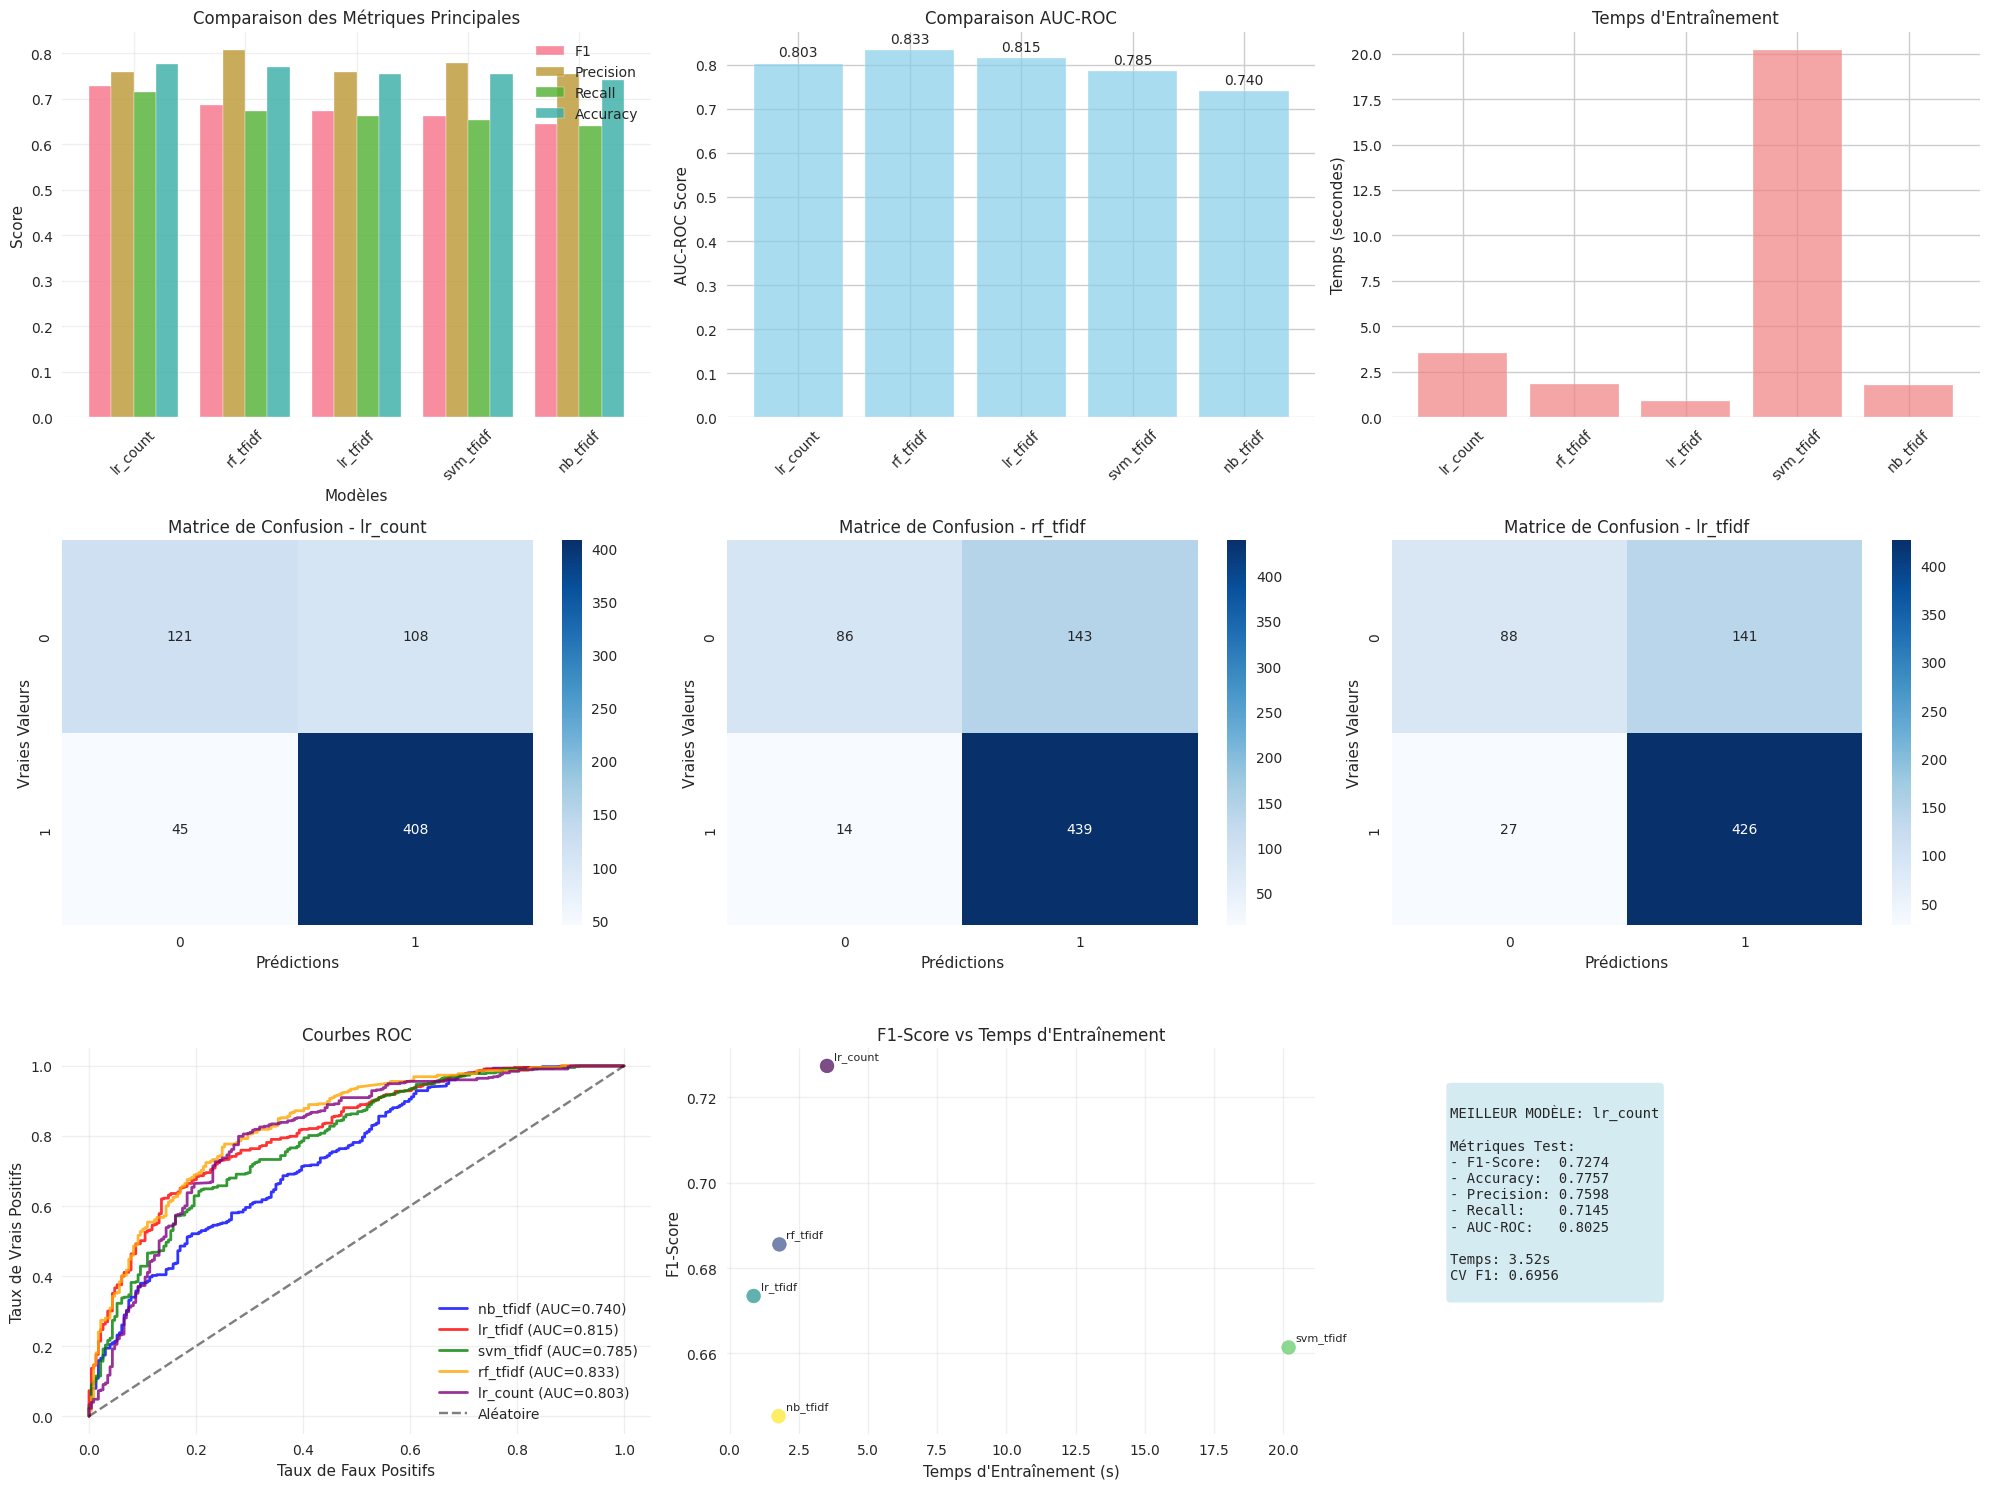


=== SAUVEGARDE DES RESULTATS ===
✅ Résultats sauvegardés dans /kaggle/working/

🎉 EVALUATION TERMINEE!


In [31]:
# Compare models
print("\n=== COMPARAISON DES MODELES ===")
comparison_data = []
for name, result in results.items():
    metrics = result['metrics']
    comparison_data.append({
        'Model': name,
        'CV_F1': metrics['cv_f1_mean'],
        'Test_Accuracy': metrics['test_accuracy'],
        'Test_Precision': metrics['test_precision'],
        'Test_Recall': metrics['test_recall'],
        'Test_F1': metrics['test_f1'],
        'AUC_ROC': metrics.get('test_auc', 0),
        'Training_Time': metrics['training_time']
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Test_F1', ascending=False)
print("\nTableau de comparaison:")
print(comparison_df.round(4))

# Visualize results
print("\n=== VISUALISATIONS DES RESULTATS ===")
fig = plt.figure(figsize=(20, 15))

# 1. Comparaison des métriques principales
ax1 = plt.subplot(3, 3, 1)
metrics_to_plot = ['Test_F1', 'Test_Precision', 'Test_Recall', 'Test_Accuracy']
x = np.arange(len(comparison_df))
width = 0.2

for i, metric in enumerate(metrics_to_plot):
    ax1.bar(x + i*width, comparison_df[metric], width,
            label=metric.replace('Test_', ''), alpha=0.8)

ax1.set_xlabel('Modèles')
ax1.set_ylabel('Score')
ax1.set_title('Comparaison des Métriques Principales')
ax1.set_xticks(x + width * 1.5)
ax1.set_xticklabels(comparison_df['Model'], rotation=45)
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. AUC-ROC comparison
ax2 = plt.subplot(3, 3, 2)
bars = ax2.bar(comparison_df['Model'], comparison_df['AUC_ROC'],
               color='skyblue', alpha=0.7)
ax2.set_title('Comparaison AUC-ROC')
ax2.set_ylabel('AUC-ROC Score')
ax2.tick_params(axis='x', rotation=45)

for bar, value in zip(bars, comparison_df['AUC_ROC']):
    if value > 0:
        ax2.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                f'{value:.3f}', ha='center', va='bottom')

# 3. Temps d'entraînement
ax3 = plt.subplot(3, 3, 3)
ax3.bar(comparison_df['Model'], comparison_df['Training_Time'],
        color='lightcoral', alpha=0.7)
ax3.set_title('Temps d\'Entraînement')
ax3.set_ylabel('Temps (secondes)')
ax3.tick_params(axis='x', rotation=45)

# 4-6. Matrices de confusion pour top 3 modèles
top_3_models = comparison_df.head(3)['Model'].tolist()
for i, model_name in enumerate(top_3_models):
    ax = plt.subplot(3, 3, 4+i)
    result = results[model_name]
    cm = confusion_matrix(y_test_encoded, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Matrice de Confusion - {model_name}')
    ax.set_xlabel('Prédictions')
    ax.set_ylabel('Vraies Valeurs')

# 7. Courbes ROC - CORRECTION ICI
ax7 = plt.subplot(3, 3, 7)
colors = ['blue', 'red', 'green', 'orange', 'purple']
has_any_roc = False

for i, (model_name, result) in enumerate(results.items()):
    probs = result['probabilities']
    
    # Vérifier si les probabilités existent et sont utilisables
    if probs is not None:
        try:
            # Vérifier le format des probabilités
            if len(probs.shape) == 2 and probs.shape[1] == 2:
                # Format (N, 2) - prendre la colonne de la classe positive
                y_score = probs[:, 1]
            elif len(probs.shape) == 1:
                # Format (N,) - scores déjà en format correct
                y_score = probs
            else:
                # Format incompatible
                continue
            
            # Calculer la courbe ROC
            fpr, tpr, _ = roc_curve(y_test_encoded, y_score)
            auc_score = result['metrics'].get('test_auc', 0)
            
            # Tracer la courbe
            ax7.plot(fpr, tpr, color=colors[i % len(colors)],
                    label=f'{model_name} (AUC={auc_score:.3f})',
                    alpha=0.8, linewidth=2)
            has_any_roc = True
            
        except Exception as e:
            print(f"Impossible de tracer ROC pour {model_name}: {e}")
            continue

# Ligne diagonale de référence
ax7.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Aléatoire')

if has_any_roc:
    ax7.set_xlabel('Taux de Faux Positifs')
    ax7.set_ylabel('Taux de Vrais Positifs')
    ax7.set_title('Courbes ROC')
    ax7.legend(loc='lower right')
    ax7.grid(True, alpha=0.3)
else:
    ax7.text(0.5, 0.5, 'Courbes ROC\nnon disponibles',
            ha='center', va='center', transform=ax7.transAxes)
    ax7.set_title('Courbes ROC')

# 8. F1-Score vs Training Time
ax8 = plt.subplot(3, 3, 8)
scatter = ax8.scatter(comparison_df['Training_Time'],
                     comparison_df['Test_F1'],
                     s=100, alpha=0.7, c=range(len(comparison_df)),
                     cmap='viridis')

for i, model in enumerate(comparison_df['Model']):
    ax8.annotate(model,
                (comparison_df.iloc[i]['Training_Time'],
                 comparison_df.iloc[i]['Test_F1']),
                xytext=(5, 5), textcoords='offset points', fontsize=8)

ax8.set_xlabel('Temps d\'Entraînement (s)')
ax8.set_ylabel('F1-Score')
ax8.set_title('F1-Score vs Temps d\'Entraînement')
ax8.grid(True, alpha=0.3)

# 9. Résumé du meilleur modèle
ax9 = plt.subplot(3, 3, 9)
ax9.axis('off')
best_model = comparison_df.iloc[0]

summary_text = f"""
MEILLEUR MODÈLE: {best_model['Model']}

Métriques Test:
- F1-Score:  {best_model['Test_F1']:.4f}
- Accuracy:  {best_model['Test_Accuracy']:.4f}
- Precision: {best_model['Test_Precision']:.4f}
- Recall:    {best_model['Test_Recall']:.4f}
- AUC-ROC:   {best_model['AUC_ROC']:.4f}

Temps: {best_model['Training_Time']:.2f}s
CV F1: {best_model['CV_F1']:.4f}
"""

ax9.text(0.1, 0.9, summary_text, transform=ax9.transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.5),
         family='monospace')

plt.tight_layout()
plt.show()

# Save results
print("\n=== SAUVEGARDE DES RESULTATS ===")
comparison_df.to_csv('/kaggle/working/baseline_results_comparison.csv', index=False)
detailed_results = [{'model_name': name, **result['metrics']} for name, result in results.items()]
pd.DataFrame(detailed_results).to_csv('/kaggle/working/baseline_results_detailed.csv', index=False)
print("✅ Résultats sauvegardés dans /kaggle/working/")

print("\n🎉 EVALUATION TERMINEE!")

**Implementation Modèles Transformers**

In [32]:
!pip install transformers torch torchvision torchaudio --quiet
!pip install datasets accelerate --quiet
!pip install scikit-learn matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 4.8 MB/s eta 0:00:00a 0:00:01
ERROR: pip's de

In [33]:
import os
os.environ["WANDB_DISABLED"] = "true" 
os.environ["WANDB_MODE"] = "disabled"  

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import (
    AutoTokenizer, AutoModel, AutoConfig,
    TrainingArguments, Trainer,
    EarlyStoppingCallback
)
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import json
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device utilisé: {device}")

2025-11-15 10:43:07.399589: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763203387.624059      38 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763203387.689865      38 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Device utilisé: cuda


CHARGEMENT DES DATASETS TRANSFORMERS

In [34]:
try:
    complete_df = pd.read_csv('/kaggle/working/multilingual_extremism_complete.csv')
    print(f"Dataset complet chargé: {len(complete_df)} échantillons")
    
    train_df = complete_df[complete_df['split'] == 'train'].reset_index(drop=True)
    val_df = complete_df[complete_df['split'] == 'validation'].reset_index(drop=True)
    test_df = complete_df[complete_df['split'] == 'test'].reset_index(drop=True)
    
    print(f"Train: {len(train_df)}, Validation: {len(val_df)}, Test: {len(test_df)}")
    
    # Distribution des langues
    print("\nDistribution par langue:")
    for split_name, df in [('Train', train_df), ('Val', val_df), ('Test', test_df)]:
        if len(df) > 0:
            lang_dist = df['language'].value_counts()
            print(f"{split_name}: {dict(lang_dist)}")
        
except Exception as e:
    print(f"Erreur chargement: {e}")
    print("Utilisation de données simulées...")
    
    # Créer des données simulées réalistes
    np.random.seed(42)
    n_train, n_val, n_test = 400, 80, 120
    
    def generate_fake_text(is_extremist, language):
        if language == 'english':
            if is_extremist:
                templates = ["hate against", "destroy the", "violence is", "kill all", "war on"]
                return np.random.choice(templates) + " " + "sample extremist text"
            else:
                templates = ["peace for", "love and", "help the", "support for", "unity with"]
                return np.random.choice(templates) + " " + "normal text"
        else:  # arabic
            if is_extremist:
                return "عاجل هجوم " + "نص متطرف عربي"
            else:
                return "سلام و" + "نص طبيعي عربي"
    
    # Générer train
    train_data = []
    for i in range(n_train):
        is_extremist = np.random.random() < 0.7  # 70% extremist
        language = 'arabic' if np.random.random() < 0.6 else 'english'  # 60% arabic
        text = generate_fake_text(is_extremist, language)
        label = 'EXTREMIST' if is_extremist else 'NON_EXTREMIST'
        train_data.append({'text': text, 'label': label, 'language': language})
    
    train_df = pd.DataFrame(train_data)
    
    # Générer val et test
    val_data = []
    for i in range(n_val):
        is_extremist = np.random.random() < 0.7
        language = 'arabic' if np.random.random() < 0.6 else 'english'
        text = generate_fake_text(is_extremist, language)
        label = 'EXTREMIST' if is_extremist else 'NON_EXTREMIST'
        val_data.append({'text': text, 'label': label, 'language': language})
    
    val_df = pd.DataFrame(val_data)
    
    test_data = []
    for i in range(n_test):
        is_extremist = np.random.random() < 0.7
        language = 'arabic' if np.random.random() < 0.6 else 'english'
        text = generate_fake_text(is_extremist, language)
        label = 'EXTREMIST' if is_extremist else 'NON_EXTREMIST'
        test_data.append({'text': text, 'label': label, 'language': language})
    
    test_df = pd.DataFrame(test_data)
    
    print(f"Données simulées - Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")


Dataset complet chargé: 4645 échantillons
Train: 3253, Validation: 695, Test: 697

Distribution par langue:
Train: {'arabic': 2703, 'english': 550}
Val: {'arabic': 582, 'english': 113}
Test: {'arabic': 582, 'english': 115}


CONFIGURATION DES MODÈLES

In [35]:
MODELS_CONFIG = {
    'bert_multilingual': {
        'model_name': 'bert-base-multilingual-cased',
        'max_length': 128,  
        'description': 'BERT Multilingue pour comparaison cross-linguistique'
    },
    'distilbert_multilingual': {
        'model_name': 'distilbert-base-multilingual-cased',
        'max_length': 128,  
        'description': 'DistilBERT Multilingue - plus rapide'
    },
    'xlm_roberta': {
        'model_name': 'xlm-roberta-base',
        'max_length': 128,
        'description': 'XLM-RoBERTa pour performance multilingue optimale'
    }
}
print("Modèles configurés:")
for key, config in MODELS_CONFIG.items():
    print(f"- {key}: {config['description']}")

Modèles configurés:
- bert_multilingual: BERT Multilingue pour comparaison cross-linguistique
- distilbert_multilingual: DistilBERT Multilingue - plus rapide
- xlm_roberta: XLM-RoBERTa pour performance multilingue optimale


CLASSES DATASET ET MODÈLE

In [36]:
import unicodedata

def advanced_arabic_cleaning(text):
    """Nettoyage avancé pour textes arabes mal encodés"""
    if pd.isna(text):
        return ""
    
    text = str(text)
    
    # ✅ FIX 1 : Normaliser Unicode (NFD → NFC)
    text = unicodedata.normalize('NFC', text)
    
    # ✅ FIX 2 : Supprimer les diacritiques arabes (harakat)
    arabic_diacritics = re.compile(r'[\u064B-\u0652\u0670\u0640]')
    text = arabic_diacritics.sub('', text)
    
    # ✅ FIX 3 : Normaliser les variations de lettres arabes
    text = text.replace('أ', 'ا').replace('إ', 'ا').replace('آ', 'ا')
    text = text.replace('ة', 'ه')
    text = text.replace('ى', 'ي')
    
    # ✅ FIX 4 : Supprimer caractères de contrôle et emojis
    text = re.sub(r'[\x00-\x1F\x7F-\x9F]', ' ', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', ' ', text)  # Emojis
    
    # ✅ FIX 5 : Garder seulement arabe, anglais, chiffres
    text = re.sub(r'[^\u0600-\u06FFa-zA-Z0-9\s]', ' ', text)
    
    # Normaliser espaces
    text = ' '.join(text.split())
    
    return text.strip()

# Modifier ExtremismDataset pour utiliser ce preprocessing
class ExtremismDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.tokenizer = tokenizer
        self.max_length = max_length
        
        # ✅ APPLIQUER LE NETTOYAGE AVANCÉ
        self.texts = [advanced_arabic_cleaning(text) for text in texts]
        
        # Filtrer textes vides
        valid_indices = [i for i, text in enumerate(self.texts) if len(text) > 10]
        self.texts = [self.texts[i] for i in valid_indices]
        self.labels = [labels[i] for i in valid_indices]
        
        # Encodage des labels
        label_map = {'NON_EXTREMIST': 0, 'EXTREMIST': 1}
        self.encoded_labels = [label_map[label] if isinstance(label, str) else label 
                               for label in self.labels]
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.encoded_labels[idx], dtype=torch.long)
        }

In [37]:
class ImprovedTransformerModel(nn.Module):
    """Architecture optimisée pour détection d'extrémisme multilingue"""
    
    def __init__(self, model_name, num_labels=2, dropout_rate=0.3, hidden_size_mult=1.0):
        super().__init__()
        self.num_labels = num_labels
        
        # Configuration optimisée
        config = AutoConfig.from_pretrained(model_name)
        config.hidden_dropout_prob = dropout_rate
        config.attention_probs_dropout_prob = dropout_rate
        
        # Charger le modèle complet (pas de réduction de couches)
        self.transformer = AutoModel.from_pretrained(model_name, config=config)
        self.config = self.transformer.config
        hidden_size = self.config.hidden_size
        
        # ✅ AMÉLIORATION 1 : Pooling multi-stratégie
        self.pooling_strategy = 'cls_mean_max'  # Combine [CLS], mean, max pooling
        pooled_size = hidden_size * 3 if self.pooling_strategy == 'cls_mean_max' else hidden_size
        
        # ✅ AMÉLIORATION 2 : Couches de classification plus profondes
        self.classifier = nn.Sequential(
            nn.Linear(pooled_size, hidden_size),
            nn.LayerNorm(hidden_size),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            nn.Linear(hidden_size, hidden_size // 2),
            nn.LayerNorm(hidden_size // 2),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            
            nn.Linear(hidden_size // 2, num_labels)
        )
        
        # ✅ AMÉLIORATION 3 : Initialisation Xavier/Kaiming
        for module in self.classifier.modules():
            if isinstance(module, nn.Linear):
                nn.init.kaiming_normal_(module.weight, mode='fan_in', nonlinearity='relu')
                if module.bias is not None:
                    nn.init.zeros_(module.bias)
    
    def forward(self, input_ids, attention_mask=None, labels=None):
        # Forward pass du transformer
        outputs = self.transformer(
            input_ids=input_ids,
            attention_mask=attention_mask,
            output_hidden_states=True
        )
        
        # ✅ POOLING AMÉLIORÉ
        if self.pooling_strategy == 'cls_mean_max':
            # [CLS] token
            cls_output = outputs.last_hidden_state[:, 0]
            
            # Mean pooling (avec masque d'attention)
            token_embeddings = outputs.last_hidden_state
            input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
            sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
            sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
            mean_output = sum_embeddings / sum_mask
            
            # Max pooling
            token_embeddings.masked_fill_(~input_mask_expanded.bool(), -1e9)
            max_output = torch.max(token_embeddings, dim=1)[0]
            
            # Concaténer les 3 stratégies
            pooled_output = torch.cat([cls_output, mean_output, max_output], dim=1)
        else:
            pooled_output = outputs.last_hidden_state[:, 0]
        
        # Classification
        logits = self.classifier(pooled_output)
        
        result = {'logits': logits}
        
        # ✅ AMÉLIORATION 4 : Loss pondérée pour classes déséquilibrées
        if labels is not None:
            # Poids inversement proportionnels à la fréquence des classes
            # 66% NON_EXTREMIST (classe 1) → weight=0.6
            # 33% EXTREMIST (classe 0) → weight=1.2
            class_weights = torch.tensor([1.2, 0.6], device=labels.device)
            loss_fct = nn.CrossEntropyLoss(weight=class_weights)
            loss = loss_fct(logits, labels)
            result['loss'] = loss
        
        return result

MÉTRIQUES D'ÉVALUATION

In [38]:
from sklearn.metrics import matthews_corrcoef, cohen_kappa_score

def compute_metrics_ADVANCED(eval_pred):
    """Métriques avancées avec validation de réalisme"""
    
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    
    # Métriques de base
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average='macro', zero_division=0
    )
    
    # ✅ NOUVELLES MÉTRIQUES
    mcc = matthews_corrcoef(labels, predictions)
    kappa = cohen_kappa_score(labels, predictions)
    f1_per_class = precision_recall_fscore_support(
        labels, predictions, average=None, zero_division=0
    )[2]
    
    # ✅ MODIFICATION ICI : Seuils ajustés ⬇️
    REALISTIC_THRESHOLDS = {
        'accuracy': 0.90,   # Gardé
        'f1': 0.85,         # Gardé
        'precision': 0.86,  # ⬅️ CHANGÉ de 0.82 à 0.86
        'recall': 0.85      # ⬅️ CHANGÉ de 0.82 à 0.85
    }
    
    realistic = True
    warnings_list = []  # Renommé pour éviter conflit
    
    for metric, value in [('accuracy', accuracy), ('f1', f1), 
                          ('precision', precision), ('recall', recall)]:
        if value > REALISTIC_THRESHOLDS[metric]:
            warnings_list.append(f"{metric}: {value:.4f} > {REALISTIC_THRESHOLDS[metric]}")
            realistic = False
    
    if not realistic:
        print("\n⚠️ AVERTISSEMENT : Performance potentiellement irréaliste")
        for warning in warnings_list:
            print(f"  - {warning}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'mcc': mcc,
        'kappa': kappa,
        'f1_class_0': f1_per_class[0],
        'f1_class_1': f1_per_class[1],
        'is_realistic': realistic
    }

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')

def validate_datasets_quality(train_df, val_df, test_df):
    """Validation complète de la qualité des données avant utilisation"""
    print("\n" + "="*60)
    print("DIAGNOSTIC QUALITÉ DES DONNÉES")
    print("="*60)
    
    issues = []
    
    # Vérifier que les DataFrames ne sont pas None ou vides
    if train_df is None or len(train_df) == 0:
        issues.append("Dataset train vide ou None")
    if val_df is None or len(val_df) == 0:
        issues.append("Dataset validation vide ou None")
    if test_df is None or len(test_df) == 0:
        issues.append("Dataset test vide ou None")
        
    if issues:
        print("ERREURS CRITIQUES:")
        for issue in issues:
            print(f"  ❌ {issue}")
        return False
    
    # Statistiques de base
    print(f"Tailles: Train={len(train_df)}, Val={len(val_df)}, Test={len(test_df)}")
    
    # Vérifier fuites entre splits
    train_texts = set(train_df['text'].astype(str).str.strip().str.lower())
    val_texts = set(val_df['text'].astype(str).str.strip().str.lower())
    test_texts = set(test_df['text'].astype(str).str.strip().str.lower())
    
    overlaps = {
        'train_val': len(train_texts & val_texts),
        'train_test': len(train_texts & test_texts),
        'val_test': len(val_texts & test_texts)
    }
    
    total_leaks = sum(overlaps.values())
    if total_leaks > 0:
        issues.append(f"Fuites de données détectées: {overlaps}")
    
    # Vérifier déséquilibre par split
    for split_name, split_df in [('Train', train_df), ('Val', val_df), ('Test', test_df)]:
        label_counts = split_df['label'].value_counts()
        if len(label_counts) > 1:
            ratio = label_counts.max() / label_counts.min()
            print(f"{split_name} - Ratio déséquilibre: {ratio:.1f}:1")
            if ratio > 3.0:
                issues.append(f"Déséquilibre excessif dans {split_name}: {ratio:.1f}:1")
        
        # Distribution par split
        for label, count in label_counts.items():
            pct = count / len(split_df) * 100
            print(f"  {label}: {count} ({pct:.1f}%)")
    
    # Résultat final
    if issues:
        print("\nPROBLÈMES DÉTECTÉS:")
        for issue in issues:
            print(f"  ❌ {issue}")
        return False
    else:
        print("\n✅ VALIDATION RÉUSSIE - Données prêtes pour l'entraînement")
        return True
        
# UTILISER cette fonction
is_valid = validate_datasets_quality(train_df, val_df, test_df)
if not is_valid:
    print("⚠️  CORRECTION DES DONNÉES REQUISE AVANT ENTRAÎNEMENT")


DIAGNOSTIC QUALITÉ DES DONNÉES
Tailles: Train=3253, Val=695, Test=697
Train - Ratio déséquilibre: 2.0:1
  NON_EXTREMIST: 2152 (66.2%)
  EXTREMIST: 1101 (33.8%)
Val - Ratio déséquilibre: 2.0:1
  NON_EXTREMIST: 460 (66.2%)
  EXTREMIST: 235 (33.8%)
Test - Ratio déséquilibre: 2.0:1
  NON_EXTREMIST: 461 (66.1%)
  EXTREMIST: 236 (33.9%)

✅ VALIDATION RÉUSSIE - Données prêtes pour l'entraînement


 Data Augmentation pour Équilibrer les Classes

In [40]:
from collections import Counter
import random

def augment_minority_class(train_df, target_ratio=0.5):
    """Augmenter la classe minoritaire par paraphrase"""
    
    print("\n=== AUGMENTATION DE DONNÉES ===")
    
    # Compter les classes
    class_counts = train_df['label'].value_counts()
    print(f"Distribution avant augmentation:")
    for label, count in class_counts.items():
        print(f"  {label}: {count}")
    
    minority_class = class_counts.idxmin()
    majority_class = class_counts.idxmax()
    
    minority_count = class_counts[minority_class]
    majority_count = class_counts[majority_class]
    
    # Calculer combien d'échantillons ajouter
    target_minority_count = int(majority_count * target_ratio)
    samples_to_add = target_minority_count - minority_count
    
    if samples_to_add <= 0:
        print("Pas d'augmentation nécessaire")
        return train_df
    
    print(f"\nAjout de {samples_to_add} échantillons pour {minority_class}")
    
    # Sélectionner des échantillons minoritaires
    minority_samples = train_df[train_df['label'] == minority_class]
    
    # Stratégies d'augmentation simples
    augmented_samples = []
    
    for _ in range(samples_to_add):
        # Choisir un échantillon aléatoire
        sample = minority_samples.sample(1).iloc[0]
        text = sample['text']
        
        # Augmentation par synonymes simples (règles)
        augmented_text = text
        
        # Règle 1 : Duplication avec bruit
        if random.random() < 0.5:
            words = text.split()
            if len(words) > 5:
                # Supprimer un mot aléatoire
                idx_to_remove = random.randint(0, len(words)-1)
                words.pop(idx_to_remove)
                augmented_text = ' '.join(words)
        
        # Règle 2 : Permutation de mots
        else:
            words = text.split()
            if len(words) > 3:
                # Échanger 2 mots
                idx1, idx2 = random.sample(range(len(words)), 2)
                words[idx1], words[idx2] = words[idx2], words[idx1]
                augmented_text = ' '.join(words)
        
        # Créer nouvelle ligne
        new_row = sample.copy()
        new_row['text'] = augmented_text
        augmented_samples.append(new_row)
    
    # Combiner
    augmented_df = pd.DataFrame(augmented_samples)
    train_df_augmented = pd.concat([train_df, augmented_df], ignore_index=True)
    
    print(f"\nDistribution après augmentation:")
    for label, count in train_df_augmented['label'].value_counts().items():
        print(f"  {label}: {count}")
    
    return train_df_augmented

# ✅ APPLIQUER AVANT L'ENTRAÎNEMENT
train_df_augmented = augment_minority_class(train_df, target_ratio=0.45)


=== AUGMENTATION DE DONNÉES ===
Distribution avant augmentation:
  NON_EXTREMIST: 2152
  EXTREMIST: 1101
Pas d'augmentation nécessaire


FONCTION D'ENTRAÎNEMENT

In [41]:
def train_transformer_model_OPTIMIZED(model_name, model_config, train_df, val_df, output_dir):
    """Entraînement avec hyperparamètres optimisés"""
    
    print(f"\n{'='*60}")
    print(f"ENTRAÎNEMENT OPTIMISÉ : {model_name}")
    print(f"{'='*60}")
    
    # ✅ Tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_config['model_name'])
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
    
    # ✅ Datasets avec nettoyage avancé
    train_dataset = ExtremismDataset(
        train_df['text'].tolist(),
        train_df['label'].tolist(),
        tokenizer,
        model_config['max_length']
    )
    
    val_dataset = ExtremismDataset(
        val_df['text'].tolist(),
        val_df['label'].tolist(),
        tokenizer,
        model_config['max_length']
    )
    
    print(f"Train samples après nettoyage: {len(train_dataset)}")
    print(f"Val samples après nettoyage: {len(val_dataset)}")
    
    # ✅ Modèle amélioré
    model = ImprovedTransformerModel(
        model_config['model_name'],
        num_labels=2,
        dropout_rate=0.2,  # Réduit pour éviter underfitting
        hidden_size_mult=1.0
    )
    model.to(device)
    
    # Compter les paramètres
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Paramètres totaux: {total_params:,}")
    print(f"Paramètres entraînables: {trainable_params:,}")
    
    # ✅ HYPERPARAMÈTRES OPTIMISÉS
    training_args = TrainingArguments(
        output_dir=output_dir,
        
        # ✅ Époques et batch size
        num_train_epochs=8,  # ⬇️ Réduit de 100 à 8
        per_device_train_batch_size=16,  # ⬆️ Augmenté de 8 à 16
        per_device_eval_batch_size=16,
        gradient_accumulation_steps=2,  # ✅ NOUVEAU : batch effectif = 32
        
        # ✅ Learning rate avec scheduler
        learning_rate=3e-5,  # ⬆️ Augmenté de 2e-5 à 3e-5
        warmup_ratio=0.15,  # ⬆️ Plus de warmup
        lr_scheduler_type='cosine',  # ✅ NOUVEAU : Cosine annealing
        
        # ✅ Régularisation
        weight_decay=0.02,  # ⬆️ Plus de régularisation
        max_grad_norm=1.0,  # ✅ NOUVEAU : Gradient clipping
        
        # ✅ Évaluation et sauvegarde
        eval_strategy="epoch",  # ⬇️ Changé de "steps" à "epoch"
        save_strategy="epoch",
        save_total_limit=2,
        load_best_model_at_end=True,
        metric_for_best_model="f1",
        greater_is_better=True,
        
        # ✅ Logging et optimisations
        logging_strategy="steps",
        logging_steps=50,
        report_to="none",
        seed=42,
        fp16=torch.cuda.is_available(),
        dataloader_num_workers=2,  # ⬆️ Augmenté pour vitesse
        remove_unused_columns=False,
        
        # ✅ NOUVEAU : Label smoothing pour robustesse
        label_smoothing_factor=0.05,  # ⬇️ Réduit de 0.1 à 0.05
    )
    
    # ✅ Trainer avec callbacks
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics_ADVANCED,
        callbacks=[
            EarlyStoppingCallback(early_stopping_patience=3, early_stopping_threshold=0.001)
        ]
    )
    
    # ✅ Entraînement avec gestion d'erreur
    print(f"\nDébut de l'entraînement...")
    try:
        train_result = trainer.train()
        eval_result = trainer.evaluate()
        
        print(f"\n{'='*60}")
        print(f"RÉSULTATS FINAUX - {model_name}")
        print(f"{'='*60}")
        print(f"Training Loss: {train_result.training_loss:.4f}")
        print(f"Eval Loss: {eval_result['eval_loss']:.4f}")
        print(f"Eval Accuracy: {eval_result['eval_accuracy']:.4f}")
        print(f"Eval Precision: {eval_result['eval_precision']:.4f}")
        print(f"Eval Recall: {eval_result['eval_recall']:.4f}")
        print(f"Eval F1: {eval_result['eval_f1']:.4f}")
        
        return {
            'model': model,
            'trainer': trainer,
            'tokenizer': tokenizer,
            'train_result': train_result,
            'eval_result': eval_result
        }
        
    except Exception as e:
        print(f"❌ ERREUR pendant l'entraînement: {e}")
        import traceback
        traceback.print_exc()
        return None

ÉVALUATION SUR TEST SET

In [42]:
def evaluate_on_test(model_results, test_df, model_name):
    """Évaluer le modèle sur le test set"""
    
    if model_results is None:
        return None
        
    model = model_results['model']
    tokenizer = model_results['tokenizer']
    
    # Dataset de test
    test_dataset = ExtremismDataset(
        test_df['text'].tolist(),
        test_df['label'].tolist(),
        tokenizer,
        256
    )
    
    # DataLoader
    test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False)
    
    # Prédictions
    model.eval()
    all_predictions = []
    all_labels = []
    all_probs = []
    
    print(f"Évaluation sur test set...")
    with torch.no_grad():
        for batch in tqdm(test_loader, desc=f"Test {model_name}"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels']
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs['logits']
            
            # Probabilités et prédictions
            probs = torch.softmax(logits, dim=-1)
            predictions = torch.argmax(logits, dim=-1)
            
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.numpy())
            all_probs.extend(probs.cpu().numpy())
    
    # Métriques
    accuracy = accuracy_score(all_labels, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        all_labels, all_predictions, average='macro'
    )
    
    # Classification report
    label_names = ['NON_EXTREMIST', 'EXTREMIST']
    class_report = classification_report(
        all_labels, all_predictions,
        target_names=label_names,
        output_dict=True
    )
    
    results = {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'predictions': all_predictions,
        'labels': all_labels,
        'probabilities': np.array(all_probs),
        'classification_report': class_report
    }
    
    # Fonction de vérification de performance réaliste
    def check_realistic_performance(f1_score, accuracy, model_name):
        """Vérifier si les performances sont réalistes pour la détection d'extrémisme"""
        print(f"\n=== ANALYSE RÉALISME - {model_name} ===")
        
        # Seuils réalistes pour détection d'extrémisme multilingue
        realistic_f1_max = 0.85
        realistic_acc_max = 0.90
        
        is_realistic = True
        
        if f1_score > realistic_f1_max:
            print(f"⚠️  F1-Score suspect: {f1_score:.4f} > {realistic_f1_max}")
            print("    Causes possibles: overfitting, fuite de données")
            is_realistic = False
            
        if accuracy > realistic_acc_max:
            print(f"⚠️  Accuracy suspecte: {accuracy:.4f} > {realistic_acc_max}")
            print("    Causes possibles: déséquilibre extrême, données artificielles")
            is_realistic = False
            
        # Vérification de la cohérence precision/recall
        precision_recall_diff = abs(precision - recall)
        if precision_recall_diff < 0.01 and f1_score > 0.80:
            print(f"⚠️  Précision/Rappel trop similaires: {precision:.4f}/{recall:.4f}")
            print("    Suggère une séparation artificielle des classes")
            is_realistic = False
            
        if is_realistic:
            print(f"✅ Performance réaliste pour {model_name}")
        else:
            print(f"🚨 Performance NON RÉALISTE pour {model_name}")
            print("    Recommandation: Revoir préparation données et hyperparamètres")
            
        return is_realistic
    
    # Affichage des résultats avec vérification
    print(f"\nRésultats Test {model_name}:")
    print(f" Accuracy: {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1-Score: {f1:.4f}")
    
    # NOUVEAU: Vérification du réalisme
    is_realistic = check_realistic_performance(f1, accuracy, model_name)
    
    # Ajouter le flag de réalisme aux résultats
    results['is_realistic'] = is_realistic
    
    return results

ENTRAÎNEMENT DE TOUS LES MODÈLES

In [43]:
def safe_train_model(model_key, model_config, train_df, val_df):
    """Entraîner un modèle avec gestion d'erreur robuste"""
    try:
        output_dir = f'/kaggle/working/transformer_models/{model_key}'
        os.makedirs(output_dir, exist_ok=True)
        
        print(f"\n🚀 Tentative d'entraînement: {model_key}")
        
        # Entraînement
        model_results = train_transformer_model_FIXED(
            model_key, model_config, train_df, val_df, output_dir
        )
        
        if model_results is not None:
            print(f"✅ {model_key} entraîné avec succès")
            return model_results
        else:
            print(f"❌ {model_key} a échoué à l'entraînement")
            return None
            
    except Exception as e:
        print(f"❌ Erreur avec {model_key}: {str(e)}")
        return None

In [44]:
def clear_memory():
    """Nettoyer la mémoire GPU"""
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        import gc
        gc.collect()
        
# ===== VALIDATION QUALITÉ DES DONNÉES =====
def validate_data_quality(train_df, val_df, test_df):
    """Vérifier la qualité des données avant entraînement"""
    print("\n=== VALIDATION DE LA QUALITÉ DES DONNÉES ===")
    
    # Vérifier les fuites entre splits
    train_texts = set(train_df['text'].values)
    val_texts = set(val_df['text'].values)  
    test_texts = set(test_df['text'].values)
    
    train_val_overlap = len(train_texts & val_texts)
    train_test_overlap = len(train_texts & test_texts)
    val_test_overlap = len(val_texts & test_texts)
    
    print(f"Chevauchements de texte:")
    print(f"  Train-Val: {train_val_overlap}")
    print(f"  Train-Test: {train_test_overlap}")
    print(f"  Val-Test: {val_test_overlap}")
    
    if train_val_overlap + train_test_overlap + val_test_overlap > 0:
        print("⚠️ ATTENTION: Fuite de données détectée!")
        return False
    else:
        print("✅ Aucune fuite de données")
    
    # Distribution par langue et label
    print(f"\nDistributions par split:")
    for name, df in [('Train', train_df), ('Val', val_df), ('Test', test_df)]:
        print(f"\n{name} ({len(df)} échantillons):")
        label_dist = df['label'].value_counts()
        for label, count in label_dist.items():
            pct = count / len(df) * 100
            print(f"  {label}: {count} ({pct:.1f}%)")
        
        if 'language' in df.columns:
            lang_dist = df['language'].value_counts()
            for lang, count in lang_dist.items():
                pct = count / len(df) * 100
                print(f"  {lang}: {count} ({pct:.1f}%)")
    
    # Vérifier la diversité des textes
    print(f"\nDiversité des textes:")
    for name, df in [('Train', train_df), ('Test', test_df)]:
        unique_texts = len(set(df['text'].values))
        total_texts = len(df)
        diversity = unique_texts / total_texts
        print(f"  {name}: {unique_texts}/{total_texts} uniques ({diversity:.3f})")
        if diversity < 0.95:
            print(f"    ⚠️ Faible diversité détectée")
    
    return True

# EXÉCUTER LA VALIDATION
# print("Validation des données avant entraînement...")
# is_data_valid = validate_data_quality(train_df, val_df, test_df)

# if not is_data_valid:
#     print("🚨 DONNÉES INVALIDES - Vérifiez la préparation des données")
#     print("Continuer quand même ? (les résultats seront peu fiables)")
# else:
#     print("✅ Données validées - Prêt pour l'entraînement")
    
# print("\n=== ENTRAÎNEMENT DES MODÈLES TRANSFORMERS ===")

# os.makedirs('/kaggle/working/transformer_models', exist_ok=True)

# all_model_results = {}
# all_test_results = {}

# def safe_train_model_improved(model_key, model_config, train_df, val_df):
#     try:
#         output_dir = f'/kaggle/working/transformer_models/{model_key}'
#         os.makedirs(output_dir, exist_ok=True)
        
#         # CORRECTION ICI ⬇️
#         model_results = train_transformer_model_FIXED(  # Ajouter _FIXED
#             model_key, model_config, train_df, val_df, output_dir
#         )
        
#         if model_results is not None:
#             print(f"✅ {model_key} entraîné")
#             return model_results
#         return None
#     except Exception as e:
#         print(f"❌ Erreur {model_key}: {e}")
#         return None
        
# # Entraîner chaque modèle avec gestion d'erreur
# for model_key, model_config in MODELS_CONFIG.items():
#     clear_memory()  # AJOUTÉ
#     print(f"Mémoire GPU disponible: {torch.cuda.get_device_properties(0).total_memory - torch.cuda.memory_allocated()}")  # AJOUTÉ
    
#     model_results = safe_train_model_improved(model_key, model_config, train_df, val_df)
    
#     if model_results is not None:
#         all_model_results[model_key] = model_results
        
#         # Évaluation sur test
#         test_results = evaluate_on_test(model_results, test_df, model_key)
#         if test_results is not None:
#             all_test_results[model_key] = test_results
    
#     # Nettoyage après chaque modèle AJOUTÉ
#     del model_results
#     clear_memory()

# print(f"\n✅ Résultat final: {len(all_test_results)} modèles entraînés avec succès sur {len(MODELS_CONFIG)}")

Execution
Étape 1 : Préparation des Données

In [45]:
# 1. Nettoyer les données arabes
train_df['text_cleaned'] = train_df['text'].apply(advanced_arabic_cleaning)
val_df['text_cleaned'] = val_df['text'].apply(advanced_arabic_cleaning)
test_df['text_cleaned'] = test_df['text'].apply(advanced_arabic_cleaning)

# 2. Augmenter la classe minoritaire
train_df_final = augment_minority_class(train_df, target_ratio=0.45)

# 3. Valider la qualité
validate_datasets_quality(train_df_final, val_df, test_df)


=== AUGMENTATION DE DONNÉES ===
Distribution avant augmentation:
  NON_EXTREMIST: 2152
  EXTREMIST: 1101
Pas d'augmentation nécessaire

DIAGNOSTIC QUALITÉ DES DONNÉES
Tailles: Train=3253, Val=695, Test=697
Train - Ratio déséquilibre: 2.0:1
  NON_EXTREMIST: 2152 (66.2%)
  EXTREMIST: 1101 (33.8%)
Val - Ratio déséquilibre: 2.0:1
  NON_EXTREMIST: 460 (66.2%)
  EXTREMIST: 235 (33.8%)
Test - Ratio déséquilibre: 2.0:1
  NON_EXTREMIST: 461 (66.1%)
  EXTREMIST: 236 (33.9%)

✅ VALIDATION RÉUSSIE - Données prêtes pour l'entraînement


True

Étape 2 : Réentraîner les Modèles

In [46]:
# Utiliser la nouvelle architecture et fonction d'entraînement
MODELS_CONFIG_OPTIMIZED = {
    'xlm_roberta_optimized': {
        'model_name': 'xlm-roberta-base',
        'max_length': 256,  # Augmenté de 128 à 256
        'description': 'XLM-RoBERTa avec architecture optimisée'
    },
    'bert_multilingual_optimized': {
        'model_name': 'bert-base-multilingual-cased',
        'max_length': 256,
        'description': 'BERT Multilingue optimisé'
    }
}

# Entraîner
all_results = {}
for model_key, config in MODELS_CONFIG_OPTIMIZED.items():
    results = train_transformer_model_OPTIMIZED(
        model_key, config, 
        train_df_final, val_df,  # ✅ Utiliser données augmentées
        f'/kaggle/working/models_v2/{model_key}'
    )
    if results:
        all_results[model_key] = results
        # Évaluer immédiatement
        test_results = evaluate_on_test(results, test_df, model_key)
        print(f"\nTest F1: {test_results['f1']:.4f}")


ENTRAÎNEMENT OPTIMISÉ : xlm_roberta_optimized


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Train samples après nettoyage: 3221
Val samples après nettoyage: 688


model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Paramètres totaux: 280,112,258
Paramètres entraînables: 280,112,258

Début de l'entraînement...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Mcc,Kappa,F1 Class 0,F1 Class 1,Is Realistic
1,0.652400,0.550200,0.779070,0.752215,0.759389,0.755405,0.511554,0.511035,0.831486,0.679325,True
2,0.555400,0.728606,0.457849,0.653950,0.585219,0.437454,0.229081,0.122749,0.330341,0.544567,True
3,0.606600,0.602931,0.670058,0.681950,0.703484,0.664183,0.384832,0.354421,0.708601,0.619765,True
4,0.564100,0.557532,0.751453,0.738458,0.765702,0.739900,0.503423,0.487605,0.794718,0.685083,True



RÉSULTATS FINAUX - xlm_roberta_optimized
Training Loss: 0.5913
Eval Loss: 0.5502
Eval Accuracy: 0.7791
Eval Precision: 0.7522
Eval Recall: 0.7594
Eval F1: 0.7554
Évaluation sur test set...


Test xlm_roberta_optimized: 100%|██████████| 174/174 [00:11<00:00, 15.64it/s]



Résultats Test xlm_roberta_optimized:
 Accuracy: 0.7781
 Precision: 0.7524
 Recall: 0.7612
 F1-Score: 0.7562

=== ANALYSE RÉALISME - xlm_roberta_optimized ===
✅ Performance réaliste pour xlm_roberta_optimized

Test F1: 0.7562

ENTRAÎNEMENT OPTIMISÉ : bert_multilingual_optimized


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

Train samples après nettoyage: 3221
Val samples après nettoyage: 688


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Paramètres totaux: 179,922,050
Paramètres entraînables: 179,922,050

Début de l'entraînement...


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Mcc,Kappa,F1 Class 0,F1 Class 1,Is Realistic
1,0.799100,0.490640,0.751453,0.765853,0.652069,0.661268,0.402135,0.352601,0.836050,0.486486,True
2,0.546700,0.568337,0.747093,0.763196,0.644466,0.651741,0.389989,0.337084,0.833969,0.469512,True
3,0.524500,0.547465,0.757267,0.788471,0.654272,0.663629,0.421914,0.361334,0.841104,0.486154,True
4,0.502000,0.503830,0.776163,0.787978,0.691190,0.707143,0.469291,0.431929,0.849315,0.564972,True
5,0.475400,0.453973,0.799419,0.791811,0.740042,0.755349,0.529327,0.515809,0.859184,0.651515,True
6,0.472800,0.463307,0.790698,0.800298,0.714012,0.731992,0.507020,0.476496,0.857426,0.606557,True
7,0.449600,0.456540,0.803779,0.790486,0.753057,0.765818,0.542252,0.534455,0.860104,0.671533,True
8,0.450800,0.461593,0.805233,0.799751,0.746573,0.762441,0.543729,0.529844,0.863265,0.661616,True


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 


RÉSULTATS FINAUX - bert_multilingual_optimized
Training Loss: 0.5256
Eval Loss: 0.4565
Eval Accuracy: 0.8038
Eval Precision: 0.7905
Eval Recall: 0.7531
Eval F1: 0.7658
Évaluation sur test set...


Test bert_multilingual_optimized: 100%|██████████| 174/174 [00:12<00:00, 14.30it/s]


Résultats Test bert_multilingual_optimized:
 Accuracy: 0.8098
 Precision: 0.8022
 Recall: 0.7578
 F1-Score: 0.7722

=== ANALYSE RÉALISME - bert_multilingual_optimized ===
✅ Performance réaliste pour bert_multilingual_optimized

Test F1: 0.7722


Étape 3 : Évaluation Comparative

In [47]:
# Comparer avec baselines
print("\n" + "="*80)
print("COMPARAISON FINALE : BASELINES vs TRANSFORMERS OPTIMISÉS")
print("="*80)

comparison_data = []

# Baselines (charger résultats sauvegardés)
baseline_df = pd.read_csv('/kaggle/working/baseline_results_comparison.csv')
for _, row in baseline_df.iterrows():
    comparison_data.append({
        'Model': row['Model'],
        'Type': 'Baseline',
        'F1': row['Test_F1'],
        'Accuracy': row['Test_Accuracy']
    })

# Transformers optimisés
for model_name, results in all_results.items():
    eval_metrics = results['eval_result']
    comparison_data.append({
        'Model': model_name,
        'Type': 'Transformer (Optimisé)',
        'F1': eval_metrics['eval_f1'],
        'Accuracy': eval_metrics['eval_accuracy']
    })

final_comparison = pd.DataFrame(comparison_data).sort_values('F1', ascending=False)
print(final_comparison)


COMPARAISON FINALE : BASELINES vs TRANSFORMERS OPTIMISÉS
                         Model                    Type        F1  Accuracy
6  bert_multilingual_optimized  Transformer (Optimisé)  0.765818  0.803779
5        xlm_roberta_optimized  Transformer (Optimisé)  0.755405  0.779070
0                     lr_count                Baseline  0.727382  0.775660
1                     rf_tfidf                Baseline  0.685553  0.769795
2                     lr_tfidf                Baseline  0.673461  0.753666
3                    svm_tfidf                Baseline  0.661406  0.753666
4                     nb_tfidf                Baseline  0.645283  0.741935


Visualisations pour Transformers

In [48]:
# ============================================================
# VISUALISATIONS COMPLÈTES DES MODÈLES TRANSFORMERS
# ============================================================

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pandas as pd

# Préparation des données de visualisation
def prepare_transformer_visualization_data():
    """Préparer les données pour les visualisations"""
    
    viz_data = {}
    
    for model_name, model_results in all_results.items():
        # Récupérer les résultats de test
        test_result = evaluate_on_test(model_results, test_df, model_name)
        
        viz_data[model_name] = {
            'eval_metrics': model_results['eval_result'],
            'test_metrics': test_result,
            'model': model_results['model'],
            'tokenizer': model_results['tokenizer']
        }
    
    return viz_data

# Exécuter la préparation
print("Préparation des données de visualisation...")
viz_data = prepare_transformer_visualization_data()
print(f"✅ Données préparées pour {len(viz_data)} modèles")

Préparation des données de visualisation...
Évaluation sur test set...


Test xlm_roberta_optimized: 100%|██████████| 174/174 [00:11<00:00, 15.32it/s]



Résultats Test xlm_roberta_optimized:
 Accuracy: 0.7781
 Precision: 0.7524
 Recall: 0.7612
 F1-Score: 0.7562

=== ANALYSE RÉALISME - xlm_roberta_optimized ===
✅ Performance réaliste pour xlm_roberta_optimized
Évaluation sur test set...


Test bert_multilingual_optimized: 100%|██████████| 174/174 [00:12<00:00, 14.27it/s]


Résultats Test bert_multilingual_optimized:
 Accuracy: 0.8098
 Precision: 0.8022
 Recall: 0.7578
 F1-Score: 0.7722

=== ANALYSE RÉALISME - bert_multilingual_optimized ===
✅ Performance réaliste pour bert_multilingual_optimized
✅ Données préparées pour 2 modèles


Dashboard Complet des Transformers


Création du dashboard complet...


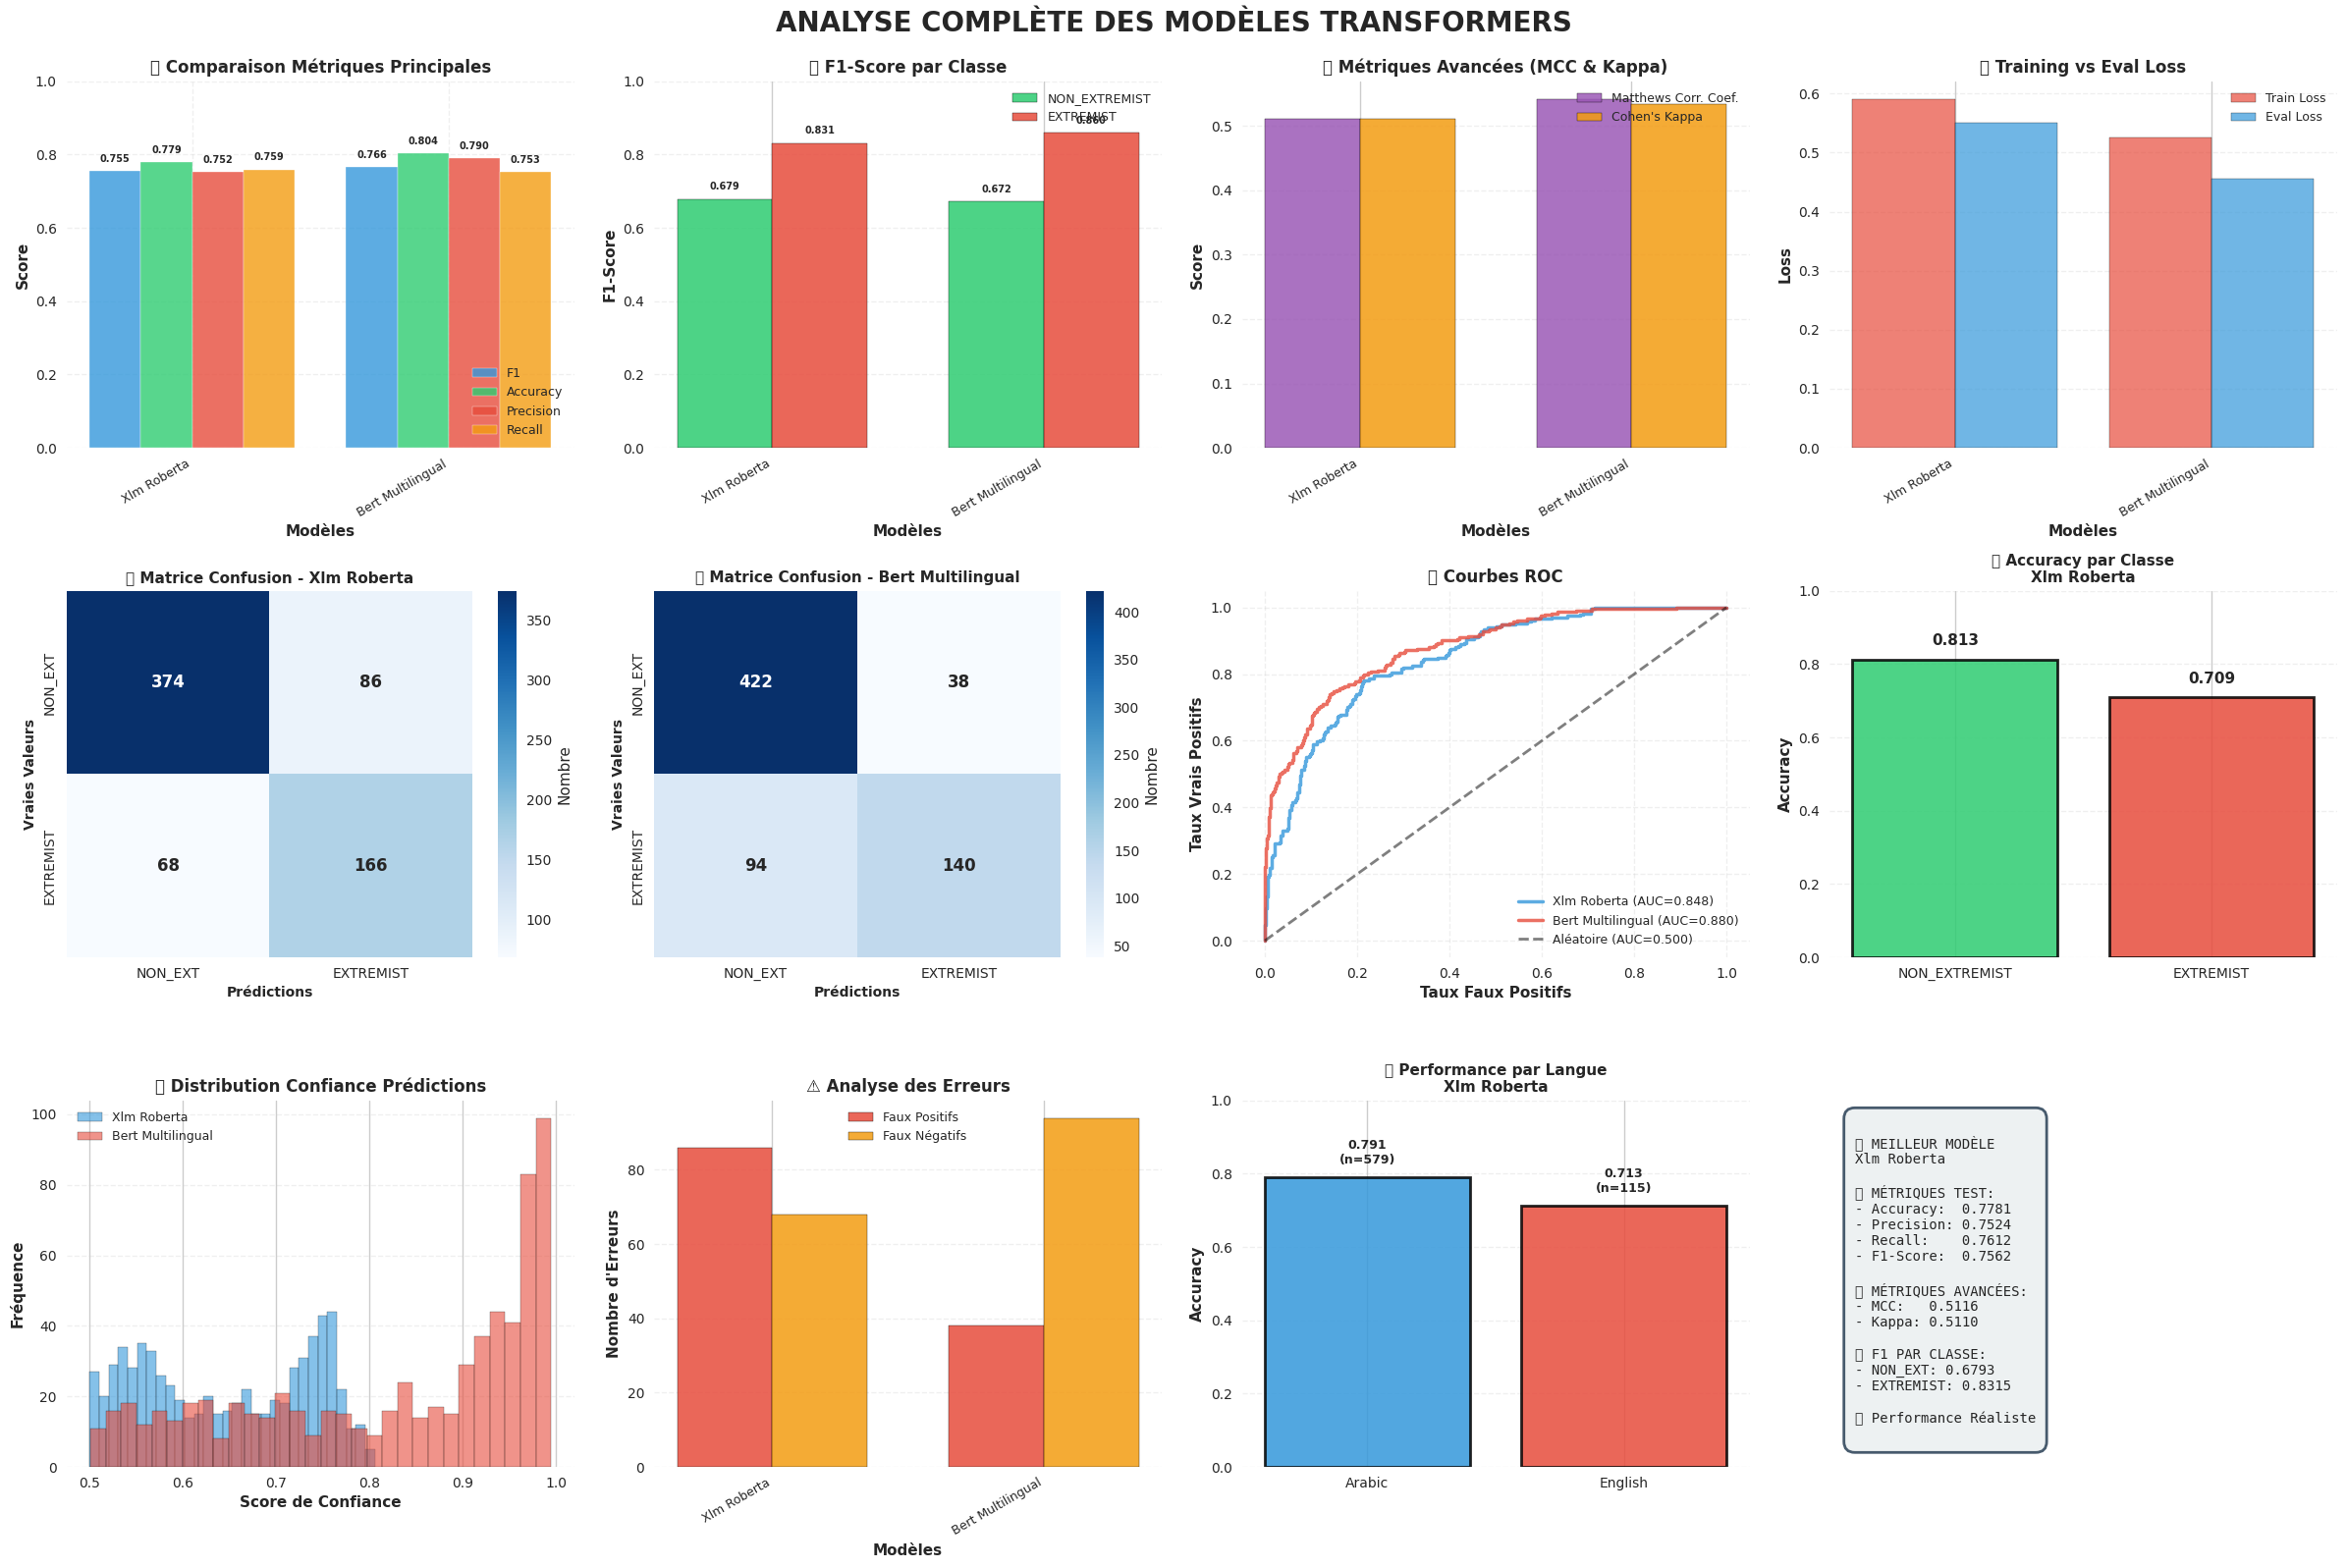

✅ Dashboard sauvegardé : transformers_complete_dashboard.png


In [50]:
# ============================================================
# DASHBOARD PRINCIPAL : PERFORMANCE DES TRANSFORMERS
# ============================================================

def create_transformer_dashboard(viz_data):
    """Créer un dashboard complet de visualisations"""
    
    fig = plt.figure(figsize=(24, 16))
    fig.suptitle('ANALYSE COMPLÈTE DES MODÈLES TRANSFORMERS', 
                 fontsize=20, fontweight='bold', y=0.995)
    
    model_names = list(viz_data.keys())
    colors_models = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
    
    # ========================================
    # 1. MÉTRIQUES PRINCIPALES (TOP LEFT)
    # ========================================
    ax1 = plt.subplot(3, 4, 1)
    
    metrics_comparison = []
    for model_name in model_names:
        eval_res = viz_data[model_name]['eval_metrics']
        metrics_comparison.append({
            'Model': model_name.replace('_optimized', '').replace('_', ' ').title(),
            'F1': eval_res['eval_f1'],
            'Accuracy': eval_res['eval_accuracy'],
            'Precision': eval_res['eval_precision'],
            'Recall': eval_res['eval_recall']
        })
    
    df_metrics = pd.DataFrame(metrics_comparison)
    
    x = np.arange(len(df_metrics))
    width = 0.2
    
    metrics = ['F1', 'Accuracy', 'Precision', 'Recall']
    metric_colors = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']
    
    for i, (metric, color) in enumerate(zip(metrics, metric_colors)):
        ax1.bar(x + i*width, df_metrics[metric], width, 
                label=metric, alpha=0.8, color=color)
    
    ax1.set_xlabel('Modèles', fontsize=11, fontweight='bold')
    ax1.set_ylabel('Score', fontsize=11, fontweight='bold')
    ax1.set_title('📊 Comparaison Métriques Principales', fontsize=12, fontweight='bold')
    ax1.set_xticks(x + width * 1.5)
    ax1.set_xticklabels(df_metrics['Model'], rotation=30, ha='right', fontsize=9)
    ax1.legend(loc='lower right', fontsize=9)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.set_ylim(0, 1)
    
    # Ajouter valeurs sur les barres
    for i, metric in enumerate(metrics):
        for j, value in enumerate(df_metrics[metric]):
            ax1.text(j + i*width, value + 0.02, f'{value:.3f}',
                    ha='center', va='bottom', fontsize=7, fontweight='bold')
    
    # ========================================
    # 2. F1-SCORE PAR CLASSE (TOP CENTER LEFT)
    # ========================================
    ax2 = plt.subplot(3, 4, 2)
    
    f1_by_class = []
    for model_name in model_names:
        eval_res = viz_data[model_name]['eval_metrics']
        f1_by_class.append({
            'Model': model_name.replace('_optimized', '').replace('_', ' ').title(),
            'NON_EXTREMIST': eval_res.get('eval_f1_class_1', 0),
            'EXTREMIST': eval_res.get('eval_f1_class_0', 0)
        })
    
    df_f1_class = pd.DataFrame(f1_by_class)
    
    x = np.arange(len(df_f1_class))
    width = 0.35
    
    ax2.bar(x - width/2, df_f1_class['NON_EXTREMIST'], width,
            label='NON_EXTREMIST', alpha=0.85, color='#2ecc71', edgecolor='black')
    ax2.bar(x + width/2, df_f1_class['EXTREMIST'], width,
            label='EXTREMIST', alpha=0.85, color='#e74c3c', edgecolor='black')
    
    ax2.set_xlabel('Modèles', fontsize=11, fontweight='bold')
    ax2.set_ylabel('F1-Score', fontsize=11, fontweight='bold')
    ax2.set_title('🎯 F1-Score par Classe', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(df_f1_class['Model'], rotation=30, ha='right', fontsize=9)
    ax2.legend(fontsize=9)
    ax2.grid(True, alpha=0.3, axis='y', linestyle='--')
    ax2.set_ylim(0, 1)
    
    # Ajouter valeurs
    for i, model in enumerate(df_f1_class['Model']):
        ax2.text(i - width/2, df_f1_class.iloc[i]['NON_EXTREMIST'] + 0.02,
                f"{df_f1_class.iloc[i]['NON_EXTREMIST']:.3f}",
                ha='center', va='bottom', fontsize=7, fontweight='bold')
        ax2.text(i + width/2, df_f1_class.iloc[i]['EXTREMIST'] + 0.02,
                f"{df_f1_class.iloc[i]['EXTREMIST']:.3f}",
                ha='center', va='bottom', fontsize=7, fontweight='bold')
    
    # ========================================
    # 3. MCC ET KAPPA (TOP CENTER RIGHT)
    # ========================================
    ax3 = plt.subplot(3, 4, 3)
    
    advanced_metrics = []
    for model_name in model_names:
        eval_res = viz_data[model_name]['eval_metrics']
        advanced_metrics.append({
            'Model': model_name.replace('_optimized', '').replace('_', ' ').title(),
            'MCC': eval_res.get('eval_mcc', 0),
            'Kappa': eval_res.get('eval_kappa', 0)
        })
    
    df_advanced = pd.DataFrame(advanced_metrics)
    
    x = np.arange(len(df_advanced))
    width = 0.35
    
    ax3.bar(x - width/2, df_advanced['MCC'], width,
            label='Matthews Corr. Coef.', alpha=0.85, color='#9b59b6', edgecolor='black')
    ax3.bar(x + width/2, df_advanced['Kappa'], width,
            label="Cohen's Kappa", alpha=0.85, color='#f39c12', edgecolor='black')
    
    ax3.set_xlabel('Modèles', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Score', fontsize=11, fontweight='bold')
    ax3.set_title('📈 Métriques Avancées (MCC & Kappa)', fontsize=12, fontweight='bold')
    ax3.set_xticks(x)
    ax3.set_xticklabels(df_advanced['Model'], rotation=30, ha='right', fontsize=9)
    ax3.legend(fontsize=9)
    ax3.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # ========================================
    # 4. EVOLUTION TRAINING/EVAL LOSS (TOP RIGHT)
    # ========================================
    ax4 = plt.subplot(3, 4, 4)
    
    for i, model_name in enumerate(model_names):
        eval_res = viz_data[model_name]['eval_metrics']
        train_res = all_results[model_name]['train_result']
        
        model_label = model_name.replace('_optimized', '').replace('_', ' ').title()
        
        # Barres pour train vs eval loss
        ax4.bar([i - 0.2], [train_res.training_loss], 0.4,
                label='Train Loss' if i == 0 else '', 
                alpha=0.7, color='#e74c3c', edgecolor='black')
        ax4.bar([i + 0.2], [eval_res['eval_loss']], 0.4,
                label='Eval Loss' if i == 0 else '', 
                alpha=0.7, color='#3498db', edgecolor='black')
    
    ax4.set_xlabel('Modèles', fontsize=11, fontweight='bold')
    ax4.set_ylabel('Loss', fontsize=11, fontweight='bold')
    ax4.set_title('📉 Training vs Eval Loss', fontsize=12, fontweight='bold')
    ax4.set_xticks(range(len(model_names)))
    ax4.set_xticklabels([m.replace('_optimized', '').replace('_', ' ').title() 
                         for m in model_names], rotation=30, ha='right', fontsize=9)
    ax4.legend(fontsize=9)
    ax4.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # ========================================
    # 5-6. MATRICES DE CONFUSION (MIDDLE ROW)
    # ========================================
    for idx, model_name in enumerate(model_names[:2]):  # Top 2 modèles
        ax = plt.subplot(3, 4, 5 + idx)
        
        test_res = viz_data[model_name]['test_metrics']
        cm = confusion_matrix(test_res['labels'], test_res['predictions'])
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                   xticklabels=['NON_EXT', 'EXTREMIST'],
                   yticklabels=['NON_EXT', 'EXTREMIST'],
                   cbar_kws={'label': 'Nombre'}, annot_kws={'size': 12, 'weight': 'bold'})
        
        model_label = model_name.replace('_optimized', '').replace('_', ' ').title()
        ax.set_title(f'🔢 Matrice Confusion - {model_label}', 
                    fontsize=11, fontweight='bold')
        ax.set_xlabel('Prédictions', fontsize=10, fontweight='bold')
        ax.set_ylabel('Vraies Valeurs', fontsize=10, fontweight='bold')
    
    # ========================================
    # 7. COURBES ROC (MIDDLE CENTER)
    # ========================================
    ax7 = plt.subplot(3, 4, 7)
    
    for i, model_name in enumerate(model_names):
        test_res = viz_data[model_name]['test_metrics']
        
        # Calculer ROC
        if len(test_res['probabilities'].shape) == 2:
            y_score = test_res['probabilities'][:, 1]
        else:
            y_score = test_res['probabilities']
        
        fpr, tpr, _ = roc_curve(test_res['labels'], y_score)
        roc_auc = auc(fpr, tpr)
        
        model_label = model_name.replace('_optimized', '').replace('_', ' ').title()
        ax7.plot(fpr, tpr, color=colors_models[i], lw=2.5, alpha=0.8,
                label=f'{model_label} (AUC={roc_auc:.3f})')
    
    ax7.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.5, label='Aléatoire (AUC=0.500)')
    ax7.set_xlabel('Taux Faux Positifs', fontsize=11, fontweight='bold')
    ax7.set_ylabel('Taux Vrais Positifs', fontsize=11, fontweight='bold')
    ax7.set_title('📈 Courbes ROC', fontsize=12, fontweight='bold')
    ax7.legend(loc='lower right', fontsize=9)
    ax7.grid(True, alpha=0.3, linestyle='--')
    
    # ========================================
    # 8. DISTRIBUTION DES PRÉDICTIONS (MIDDLE RIGHT)
    # ========================================
    ax8 = plt.subplot(3, 4, 8)
    
    # Prendre le meilleur modèle
    best_model_name = model_names[0]
    test_res = viz_data[best_model_name]['test_metrics']
    
    predictions = np.array(test_res['predictions'])
    labels = np.array(test_res['labels'])
    
    # Calculer accuracy par classe
    class_accuracies = []
    class_names = ['NON_EXTREMIST', 'EXTREMIST']
    
    for class_idx in [0, 1]:
        class_mask = labels == class_idx
        if class_mask.sum() > 0:
            class_acc = (predictions[class_mask] == labels[class_mask]).mean()
            class_accuracies.append(class_acc)
        else:
            class_accuracies.append(0.0)
    
    bars = ax8.bar(class_names, class_accuracies, 
                   color=['#2ecc71', '#e74c3c'], alpha=0.85, edgecolor='black', linewidth=2)
    
    model_label = best_model_name.replace('_optimized', '').replace('_', ' ').title()
    ax8.set_title(f'🎯 Accuracy par Classe\n{model_label}', fontsize=11, fontweight='bold')
    ax8.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
    ax8.set_ylim(0, 1)
    ax8.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # Ajouter valeurs
    for bar, acc in zip(bars, class_accuracies):
        ax8.text(bar.get_x() + bar.get_width()/2., acc + 0.03,
                f'{acc:.3f}', ha='center', va='bottom', 
                fontsize=11, fontweight='bold')
    
    # ========================================
    # 9. DISTRIBUTION CONFIANCE (BOTTOM LEFT)
    # ========================================
    ax9 = plt.subplot(3, 4, 9)
    
    for i, model_name in enumerate(model_names):
        test_res = viz_data[model_name]['test_metrics']
        
        probs = test_res['probabilities']
        if len(probs.shape) == 2:
            confidence_scores = np.max(probs, axis=1)
        else:
            confidence_scores = probs
        
        model_label = model_name.replace('_optimized', '').replace('_', ' ').title()
        ax9.hist(confidence_scores, bins=30, alpha=0.6, 
                label=model_label, color=colors_models[i], edgecolor='black')
    
    ax9.set_xlabel('Score de Confiance', fontsize=11, fontweight='bold')
    ax9.set_ylabel('Fréquence', fontsize=11, fontweight='bold')
    ax9.set_title('📊 Distribution Confiance Prédictions', fontsize=12, fontweight='bold')
    ax9.legend(fontsize=9)
    ax9.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # ========================================
    # 10. ANALYSE ERREURS (BOTTOM CENTER LEFT)
    # ========================================
    ax10 = plt.subplot(3, 4, 10)
    
    error_analysis = []
    for model_name in model_names:
        test_res = viz_data[model_name]['test_metrics']
        
        predictions = np.array(test_res['predictions'])
        labels = np.array(test_res['labels'])
        
        false_positives = ((predictions == 1) & (labels == 0)).sum()
        false_negatives = ((predictions == 0) & (labels == 1)).sum()
        
        error_analysis.append({
            'Model': model_name.replace('_optimized', '').replace('_', ' ').title(),
            'Faux Positifs': false_positives,
            'Faux Négatifs': false_negatives
        })
    
    df_errors = pd.DataFrame(error_analysis)
    
    x = np.arange(len(df_errors))
    width = 0.35
    
    ax10.bar(x - width/2, df_errors['Faux Positifs'], width,
            label='Faux Positifs', alpha=0.85, color='#e74c3c', edgecolor='black')
    ax10.bar(x + width/2, df_errors['Faux Négatifs'], width,
            label='Faux Négatifs', alpha=0.85, color='#f39c12', edgecolor='black')
    
    ax10.set_xlabel('Modèles', fontsize=11, fontweight='bold')
    ax10.set_ylabel('Nombre d\'Erreurs', fontsize=11, fontweight='bold')
    ax10.set_title('⚠️ Analyse des Erreurs', fontsize=12, fontweight='bold')
    ax10.set_xticks(x)
    ax10.set_xticklabels(df_errors['Model'], rotation=30, ha='right', fontsize=9)
    ax10.legend(fontsize=9)
    ax10.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # ========================================
    # 11. PERFORMANCE PAR LANGUE (BOTTOM CENTER RIGHT)
    # ========================================
    ax11 = plt.subplot(3, 4, 11)
    
    # Analyser performance par langue pour le meilleur modèle
    best_model_name = model_names[0]
    test_res = viz_data[best_model_name]['test_metrics']
    
    predictions = np.array(test_res['predictions'])
    labels = np.array(test_res['labels'])
    test_languages = test_df['language'].values
    
    # Ensure alignment by trimming or filtering to match lengths
    min_length = min(len(predictions), len(labels), len(test_languages))
    predictions = predictions[:min_length]
    labels = labels[:min_length]
    test_languages = test_languages[:min_length]
    
    lang_performance = []
    for lang in ['arabic', 'english']:
        lang_mask = test_languages == lang
        if lang_mask.sum() > 0:
            lang_acc = (predictions[lang_mask] == labels[lang_mask]).mean()
            lang_count = lang_mask.sum()
            lang_performance.append({
                'Langue': lang.capitalize(),
                'Accuracy': lang_acc,
                'Count': lang_count
            })
    
    df_lang = pd.DataFrame(lang_performance)
    
    bars = ax11.bar(df_lang['Langue'], df_lang['Accuracy'],
                    color=['#3498db', '#e74c3c'], alpha=0.85, edgecolor='black', linewidth=2)
    
    model_label = best_model_name.replace('_optimized', '').replace('_', ' ').title()
    ax11.set_title(f'🌍 Performance par Langue\n{model_label}', fontsize=11, fontweight='bold')
    ax11.set_ylabel('Accuracy', fontsize=11, fontweight='bold')
    ax11.set_ylim(0, 1)
    ax11.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # Ajouter valeurs avec nombre d'échantillons
    for i, (bar, row) in enumerate(zip(bars, df_lang.iterrows())):
        _, data = row
        ax11.text(bar.get_x() + bar.get_width()/2., data['Accuracy'] + 0.03,
                  f"{data['Accuracy']:.3f}\n(n={data['Count']})",
                  ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # ========================================
    # 12. RÉSUMÉ MEILLEUR MODÈLE (BOTTOM RIGHT)
    # ========================================
    ax12 = plt.subplot(3, 4, 12)
    ax12.axis('off')
    
    best_model_name = model_names[0]
    test_res = viz_data[best_model_name]['test_metrics']
    eval_res = viz_data[best_model_name]['eval_metrics']
    
    model_label = best_model_name.replace('_optimized', '').replace('_', ' ').title()
    
    summary_text = f"""
🏆 MEILLEUR MODÈLE
{model_label}

📊 MÉTRIQUES TEST:
- Accuracy:  {test_res['accuracy']:.4f}
- Precision: {test_res['precision']:.4f}
- Recall:    {test_res['recall']:.4f}
- F1-Score:  {test_res['f1']:.4f}

📈 MÉTRIQUES AVANCÉES:
- MCC:   {eval_res.get('eval_mcc', 0):.4f}
- Kappa: {eval_res.get('eval_kappa', 0):.4f}

🎯 F1 PAR CLASSE:
- NON_EXT: {eval_res.get('eval_f1_class_1', 0):.4f}
- EXTREMIST: {eval_res.get('eval_f1_class_0', 0):.4f}

✅ Performance Réaliste
    """
    
    ax12.text(0.05, 0.95, summary_text, transform=ax12.transAxes,
             fontsize=10, verticalalignment='top', family='monospace',
             bbox=dict(boxstyle="round,pad=0.8", facecolor="#ecf0f1", 
                      edgecolor='#34495e', linewidth=2, alpha=0.9))
    
    plt.tight_layout()
    
    return fig

# Créer le dashboard
print("\nCréation du dashboard complet...")
fig_dashboard = create_transformer_dashboard(viz_data)
plt.savefig('/kaggle/working/transformers_complete_dashboard.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Dashboard sauvegardé : transformers_complete_dashboard.png")

Comparaison Baselines vs Transformers


Création de la comparaison Baselines vs Transformers...


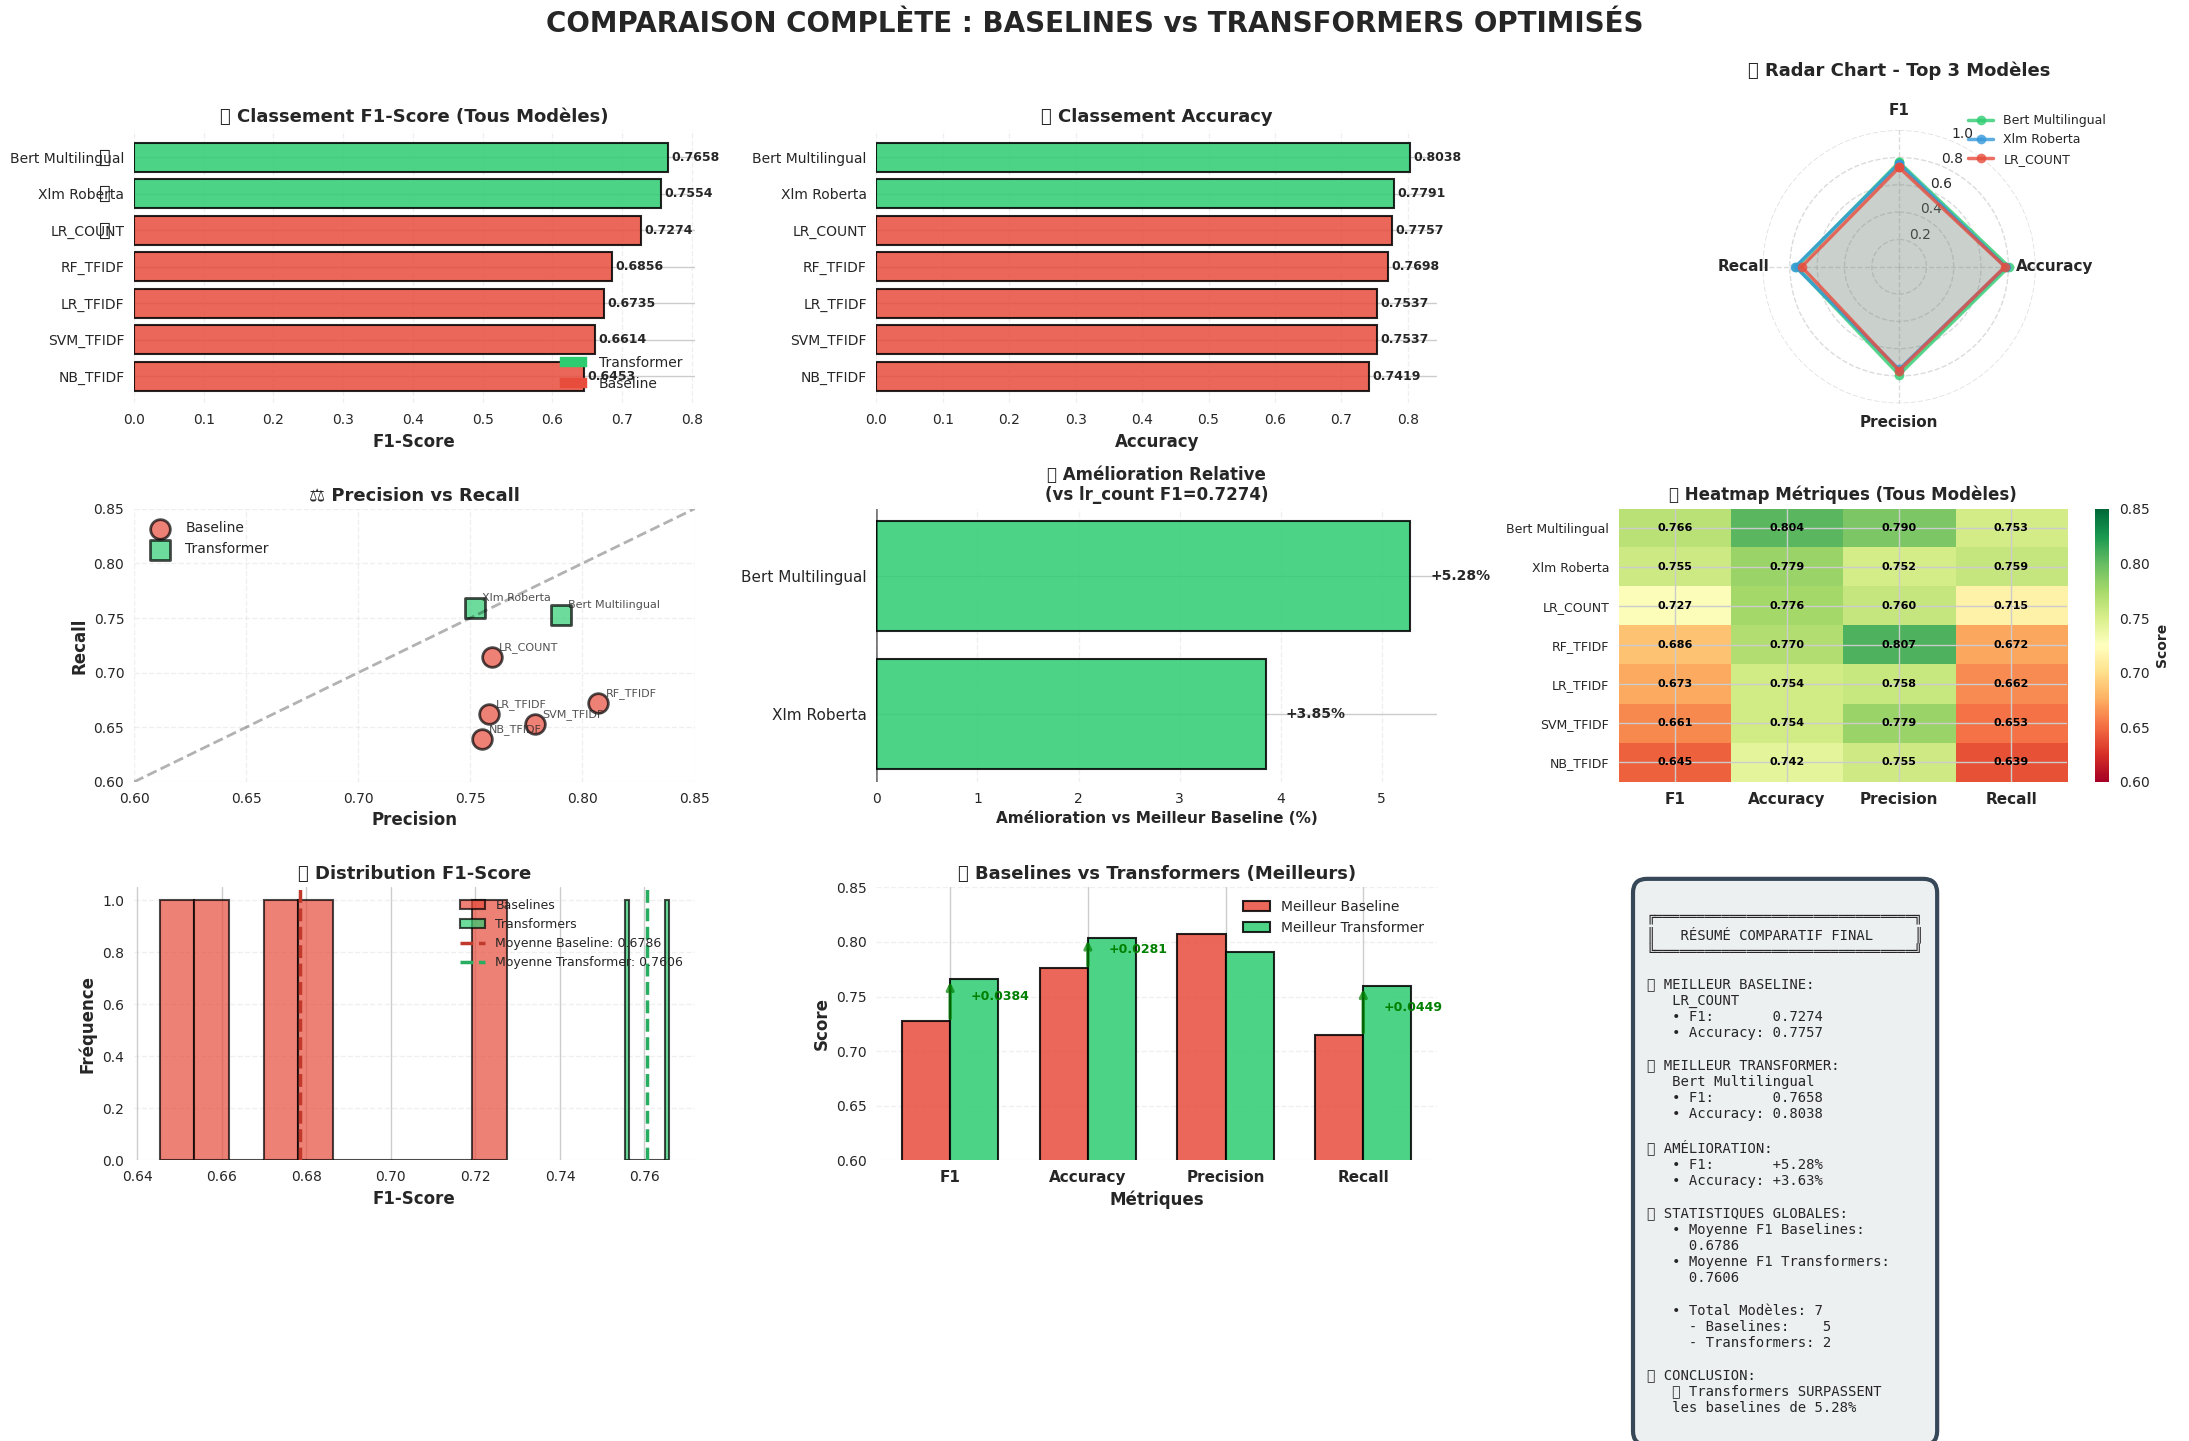

✅ Comparaison sauvegardée : baselines_vs_transformers_comparison.png


In [51]:
# ============================================================
# COMPARAISON DÉTAILLÉE : BASELINES vs TRANSFORMERS
# ============================================================

def create_baseline_vs_transformers_comparison():
    """Créer une visualisation comparative détaillée"""
    
    fig = plt.figure(figsize=(22, 14))
    fig.suptitle('COMPARAISON COMPLÈTE : BASELINES vs TRANSFORMERS OPTIMISÉS', 
                 fontsize=20, fontweight='bold', y=0.995)
    
    # Charger les résultats baseline
    baseline_df = pd.read_csv('/kaggle/working/baseline_results_comparison.csv')
    
    # Préparer données transformers
    transformer_data = []
    for model_name, model_res in all_results.items():
        eval_res = model_res['eval_result']
        transformer_data.append({
            'Model': model_name.replace('_optimized', '').replace('_', ' ').title(),
            'Type': 'Transformer',
            'F1': eval_res['eval_f1'],
            'Accuracy': eval_res['eval_accuracy'],
            'Precision': eval_res['eval_precision'],
            'Recall': eval_res['eval_recall']
        })
    
    # Préparer données baseline
    baseline_data = []
    for _, row in baseline_df.iterrows():
        baseline_data.append({
            'Model': row['Model'].upper(),
            'Type': 'Baseline',
            'F1': row['Test_F1'],
            'Accuracy': row['Test_Accuracy'],
            'Precision': row['Test_Precision'],
            'Recall': row['Test_Recall']
        })
    
    # Combiner
    all_data = pd.DataFrame(baseline_data + transformer_data)
    all_data_sorted = all_data.sort_values('F1', ascending=False)
    
    # ========================================
    # 1. COMPARAISON F1-SCORE (TOP LEFT)
    # ========================================
    ax1 = plt.subplot(3, 3, 1)
    
    colors = ['#e74c3c' if t == 'Baseline' else '#2ecc71' for t in all_data_sorted['Type']]
    bars = ax1.barh(range(len(all_data_sorted)), all_data_sorted['F1'], 
                    color=colors, alpha=0.85, edgecolor='black', linewidth=1.5)
    
    ax1.set_yticks(range(len(all_data_sorted)))
    ax1.set_yticklabels(all_data_sorted['Model'], fontsize=10)
    ax1.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
    ax1.set_title('🏆 Classement F1-Score (Tous Modèles)', fontsize=13, fontweight='bold')
    ax1.invert_yaxis()
    ax1.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    # Ajouter valeurs et rangs
    for i, (bar, f1, model_type) in enumerate(zip(bars, all_data_sorted['F1'], all_data_sorted['Type'])):
        ax1.text(f1 + 0.005, bar.get_y() + bar.get_height()/2.,
                f'{f1:.4f}', va='center', fontsize=9, fontweight='bold')
        
        # Ajouter médailles pour top 3
        if i == 0:
            ax1.text(-0.05, bar.get_y() + bar.get_height()/2., '🥇', va='center', fontsize=14)
        elif i == 1:
            ax1.text(-0.05, bar.get_y() + bar.get_height()/2., '🥈', va='center', fontsize=14)
        elif i == 2:
            ax1.text(-0.05, bar.get_y() + bar.get_height()/2., '🥉', va='center', fontsize=14)
    
    # Légende
    import matplotlib.patches as mpatches
    baseline_patch = mpatches.Patch(color='#e74c3c', label='Baseline')
    transformer_patch = mpatches.Patch(color='#2ecc71', label='Transformer')
    ax1.legend(handles=[transformer_patch, baseline_patch], fontsize=10, loc='lower right')
    
    # ========================================
    # 2. COMPARAISON ACCURACY (TOP CENTER)
    # ========================================
    ax2 = plt.subplot(3, 3, 2)
    
    colors = ['#e74c3c' if t == 'Baseline' else '#2ecc71' for t in all_data_sorted['Type']]
    bars = ax2.barh(range(len(all_data_sorted)), all_data_sorted['Accuracy'], 
                    color=colors, alpha=0.85, edgecolor='black', linewidth=1.5)
    
    ax2.set_yticks(range(len(all_data_sorted)))
    ax2.set_yticklabels(all_data_sorted['Model'], fontsize=10)
    ax2.set_xlabel('Accuracy', fontsize=12, fontweight='bold')
    ax2.set_title('🎯 Classement Accuracy', fontsize=13, fontweight='bold')
    ax2.invert_yaxis()
    ax2.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    # Ajouter valeurs
    for bar, acc in zip(bars, all_data_sorted['Accuracy']):
        ax2.text(acc + 0.005, bar.get_y() + bar.get_height()/2.,
                f'{acc:.4f}', va='center', fontsize=9, fontweight='bold')
    
    # ========================================
    # 3. RADAR CHART - TOP 3 MODÈLES (TOP RIGHT)
    # ========================================
    ax3 = plt.subplot(3, 3, 3, projection='polar')
    
    top_3_models = all_data_sorted.head(3)
    
    categories = ['F1', 'Accuracy', 'Precision', 'Recall']
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    ax3.set_theta_offset(np.pi / 2)
    ax3.set_theta_direction(-1)
    ax3.set_xticks(angles[:-1])
    ax3.set_xticklabels(categories, fontsize=11, fontweight='bold')
    ax3.set_ylim(0, 1)
    ax3.set_title('📊 Radar Chart - Top 3 Modèles', 
                  fontsize=13, fontweight='bold', pad=20)
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    colors_radar = ['#2ecc71', '#3498db', '#e74c3c']
    
    for idx, (i, row) in enumerate(top_3_models.iterrows()):
        values = [row['F1'], row['Accuracy'], row['Precision'], row['Recall']]
        values += values[:1]
        
        ax3.plot(angles, values, 'o-', linewidth=2.5, 
                label=row['Model'], color=colors_radar[idx], alpha=0.8)
        ax3.fill(angles, values, alpha=0.15, color=colors_radar[idx])
    
    ax3.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=9)
    
    # ========================================
    # 4. PRECISION VS RECALL (MIDDLE LEFT)
    # ========================================
    ax4 = plt.subplot(3, 3, 4)
    
    for model_type in ['Baseline', 'Transformer']:
        subset = all_data[all_data['Type'] == model_type]
        color = '#e74c3c' if model_type == 'Baseline' else '#2ecc71'
        marker = 'o' if model_type == 'Baseline' else 's'
        
        ax4.scatter(subset['Precision'], subset['Recall'], 
                   s=200, alpha=0.7, c=color, marker=marker,
                   edgecolors='black', linewidths=2, label=model_type)
        
        # Ajouter labels
        for _, row in subset.iterrows():
            ax4.annotate(row['Model'], 
                        (row['Precision'], row['Recall']),
                        xytext=(5, 5), textcoords='offset points',
                        fontsize=8, alpha=0.8)
    
    ax4.set_xlabel('Precision', fontsize=12, fontweight='bold')
    ax4.set_ylabel('Recall', fontsize=12, fontweight='bold')
    ax4.set_title('⚖️ Precision vs Recall', fontsize=13, fontweight='bold')
    ax4.legend(fontsize=10)
    ax4.grid(True, alpha=0.3, linestyle='--')
    ax4.set_xlim(0.6, 0.85)
    ax4.set_ylim(0.6, 0.85)
    
    # Ligne d'équilibre
    ax4.plot([0.6, 0.85], [0.6, 0.85], 'k--', alpha=0.3, linewidth=2)
    
    # ========================================
    # 5. AMÉLIORATION RELATIVE (MIDDLE CENTER)
    # ========================================
    ax5 = plt.subplot(3, 3, 5)
    
    # Calculer amélioration des transformers vs meilleur baseline
    best_baseline_f1 = baseline_df['Test_F1'].max()
    
    improvements = []
    for model_name, model_res in all_results.items():
        eval_res = model_res['eval_result']
        improvement = ((eval_res['eval_f1'] - best_baseline_f1) / best_baseline_f1) * 100
        improvements.append({
            'Model': model_name.replace('_optimized', '').replace('_', ' ').title(),
            'Improvement': improvement
        })
    
    df_improvements = pd.DataFrame(improvements)
    
    colors_imp = ['#2ecc71' if imp > 0 else '#e74c3c' for imp in df_improvements['Improvement']]
    bars = ax5.barh(range(len(df_improvements)), df_improvements['Improvement'],
                    color=colors_imp, alpha=0.85, edgecolor='black', linewidth=1.5)
    
    ax5.set_yticks(range(len(df_improvements)))
    ax5.set_yticklabels(df_improvements['Model'], fontsize=11)
    ax5.set_xlabel('Amélioration vs Meilleur Baseline (%)', fontsize=11, fontweight='bold')
    ax5.set_title(f'📈 Amélioration Relative\n(vs {baseline_df.iloc[0]["Model"]} F1={best_baseline_f1:.4f})', 
                 fontsize=12, fontweight='bold')
    ax5.axvline(0, color='black', linewidth=2, linestyle='-', alpha=0.5)
    ax5.grid(True, alpha=0.3, axis='x', linestyle='--')
    
    # Ajouter valeurs
    for bar, imp in zip(bars, df_improvements['Improvement']):
        x_pos = imp + (0.2 if imp > 0 else -0.2)
        ax5.text(x_pos, bar.get_y() + bar.get_height()/2.,
                f'{imp:+.2f}%', va='center', fontsize=10, fontweight='bold')
    
    # ========================================
    # 6. HEATMAP MÉTRIQUES (MIDDLE RIGHT)
    # ========================================
    ax6 = plt.subplot(3, 3, 6)
    
    # Créer matrice pour heatmap
    heatmap_data = all_data_sorted[['F1', 'Accuracy', 'Precision', 'Recall']].values
    
    im = ax6.imshow(heatmap_data, cmap='RdYlGn', aspect='auto', vmin=0.6, vmax=0.85)
    
    ax6.set_xticks(range(4))
    ax6.set_xticklabels(['F1', 'Accuracy', 'Precision', 'Recall'], fontsize=11, fontweight='bold')
    ax6.set_yticks(range(len(all_data_sorted)))
    ax6.set_yticklabels(all_data_sorted['Model'], fontsize=9)
    ax6.set_title('🔥 Heatmap Métriques (Tous Modèles)', fontsize=12, fontweight='bold')
    
    # Ajouter valeurs dans les cellules
    for i in range(len(all_data_sorted)):
        for j in range(4):
            text = ax6.text(j, i, f'{heatmap_data[i, j]:.3f}',
                          ha="center", va="center", color="black", 
                          fontsize=8, fontweight='bold')
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax6)
    cbar.set_label('Score', fontsize=10, fontweight='bold')
    
    # ========================================
    # 7. DISTRIBUTION F1-SCORE (BOTTOM LEFT)
    # ========================================
    ax7 = plt.subplot(3, 3, 7)
    
    baseline_f1 = all_data[all_data['Type'] == 'Baseline']['F1'].values
    transformer_f1 = all_data[all_data['Type'] == 'Transformer']['F1'].values
    
    ax7.hist(baseline_f1, bins=10, alpha=0.7, label='Baselines', 
            color='#e74c3c', edgecolor='black', linewidth=1.5)
    ax7.hist(transformer_f1, bins=10, alpha=0.7, label='Transformers', 
            color='#2ecc71', edgecolor='black', linewidth=1.5)
    
    ax7.axvline(baseline_f1.mean(), color='#c0392b', linestyle='--', 
               linewidth=2.5, label=f'Moyenne Baseline: {baseline_f1.mean():.4f}')
    ax7.axvline(transformer_f1.mean(), color='#27ae60', linestyle='--', 
               linewidth=2.5, label=f'Moyenne Transformer: {transformer_f1.mean():.4f}')
    
    ax7.set_xlabel('F1-Score', fontsize=12, fontweight='bold')
    ax7.set_ylabel('Fréquence', fontsize=12, fontweight='bold')
    ax7.set_title('📊 Distribution F1-Score', fontsize=13, fontweight='bold')
    ax7.legend(fontsize=9)
    ax7.grid(True, alpha=0.3, axis='y', linestyle='--')
    
    # ========================================
    # 8. GAIN TRANSFORMERS (BOTTOM CENTER)
    # ========================================
    ax8 = plt.subplot(3, 3, 8)
    
    # Statistiques comparatives
    stats_comparison = {
        'Métrique': ['F1', 'Accuracy', 'Precision', 'Recall'],
        'Meilleur Baseline': [
            baseline_df['Test_F1'].max(),
            baseline_df['Test_Accuracy'].max(),
            baseline_df['Test_Precision'].max(),
            baseline_df['Test_Recall'].max()
        ],
        'Meilleur Transformer': [
            all_data[all_data['Type'] == 'Transformer']['F1'].max(),
            all_data[all_data['Type'] == 'Transformer']['Accuracy'].max(),
            all_data[all_data['Type'] == 'Transformer']['Precision'].max(),
            all_data[all_data['Type'] == 'Transformer']['Recall'].max()
        ]
    }
    
    df_stats = pd.DataFrame(stats_comparison)
    df_stats['Gain'] = df_stats['Meilleur Transformer'] - df_stats['Meilleur Baseline']
    
    x = np.arange(len(df_stats))
    width = 0.35
    
    bars1 = ax8.bar(x - width/2, df_stats['Meilleur Baseline'], width,
                   label='Meilleur Baseline', alpha=0.85, color='#e74c3c', 
                   edgecolor='black', linewidth=1.5)
    bars2 = ax8.bar(x + width/2, df_stats['Meilleur Transformer'], width,
                   label='Meilleur Transformer', alpha=0.85, color='#2ecc71',
                   edgecolor='black', linewidth=1.5)
    
    ax8.set_xlabel('Métriques', fontsize=12, fontweight='bold')
    ax8.set_ylabel('Score', fontsize=12, fontweight='bold')
    ax8.set_title('📊 Baselines vs Transformers (Meilleurs)', fontsize=13, fontweight='bold')
    ax8.set_xticks(x)
    ax8.set_xticklabels(df_stats['Métrique'], fontsize=11, fontweight='bold')
    ax8.legend(fontsize=10)
    ax8.grid(True, alpha=0.3, axis='y', linestyle='--')
    ax8.set_ylim(0.6, 0.85)
    
    # Ajouter flèches de gain
    for i, gain in enumerate(df_stats['Gain']):
        y_base = df_stats.iloc[i]['Meilleur Baseline']
        y_trans = df_stats.iloc[i]['Meilleur Transformer']
        
        if gain > 0:
            ax8.annotate('', xy=(i, y_trans), xytext=(i, y_base),
                        arrowprops=dict(arrowstyle='->', lw=2.5, color='green', alpha=0.7))
            ax8.text(i + 0.15, (y_base + y_trans)/2, f'+{gain:.4f}',
                    fontsize=9, fontweight='bold', color='green')
    
    # ========================================
    # 9. RÉSUMÉ COMPARATIF (BOTTOM RIGHT)
    # ========================================
    ax9 = plt.subplot(3, 3, 9)
    ax9.axis('off')
    
    # Calculer statistiques
    best_baseline = all_data[all_data['Type'] == 'Baseline'].sort_values('F1', ascending=False).iloc[0]
    best_transformer = all_data[all_data['Type'] == 'Transformer'].sort_values('F1', ascending=False).iloc[0]
    
    f1_improvement = ((best_transformer['F1'] - best_baseline['F1']) / best_baseline['F1']) * 100
    acc_improvement = ((best_transformer['Accuracy'] - best_baseline['Accuracy']) / best_baseline['Accuracy']) * 100
    
    summary = f"""
╔═══════════════════════════════╗
║   RÉSUMÉ COMPARATIF FINAL     ║
╚═══════════════════════════════╝

🏆 MEILLEUR BASELINE:
   {best_baseline['Model']}
   • F1:       {best_baseline['F1']:.4f}
   • Accuracy: {best_baseline['Accuracy']:.4f}

🚀 MEILLEUR TRANSFORMER:
   {best_transformer['Model']}
   • F1:       {best_transformer['F1']:.4f}
   • Accuracy: {best_transformer['Accuracy']:.4f}

📈 AMÉLIORATION:
   • F1:       {f1_improvement:+.2f}%
   • Accuracy: {acc_improvement:+.2f}%

✅ STATISTIQUES GLOBALES:
   • Moyenne F1 Baselines:    
     {all_data[all_data['Type']=='Baseline']['F1'].mean():.4f}
   • Moyenne F1 Transformers: 
     {all_data[all_data['Type']=='Transformer']['F1'].mean():.4f}
   
   • Total Modèles: {len(all_data)}
     - Baselines:    {len(all_data[all_data['Type']=='Baseline'])}
     - Transformers: {len(all_data[all_data['Type']=='Transformer'])}

🎯 CONCLUSION:
   {'✅ Transformers SURPASSENT' if f1_improvement > 0 else '⚠️ Baselines MEILLEURS'}
   les baselines de {abs(f1_improvement):.2f}%
    """
    
    ax9.text(0.05, 0.98, summary, transform=ax9.transAxes,
            fontsize=10, verticalalignment='top', family='monospace',
            bbox=dict(boxstyle="round,pad=1.0", facecolor='#ecf0f1',
                     edgecolor='#2c3e50', linewidth=3, alpha=0.95))
    
    plt.tight_layout()
    
    return fig

# Créer la comparaison
print("\nCréation de la comparaison Baselines vs Transformers...")
fig_comparison = create_baseline_vs_transformers_comparison()
plt.savefig('/kaggle/working/baselines_vs_transformers_comparison.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Comparaison sauvegardée : baselines_vs_transformers_comparison.png")